In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('application_data.csv')  # Replace with the actual path to your dataset

In [64]:
df.shape

(307511, 81)

In [5]:
# Identify missing data
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data_percentage = (missing_data / df.shape[0]) * 100

In [7]:
# Display missing data
print("Missing Data (Columns with Missing Values):")
print(missing_data)
print("\nPercentage of Missing Data per Column:")
print(missing_data_percentage)

Missing Data (Columns with Missing Values):
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64

Percentage of Missing Data per Column:
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OWN_CAR_AGE                   65.990810
OCCUPATION_TYPE               31.345545
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 67, dtype: float64


In [11]:
# Visualize missing data
#plt.figure(figsize=(12, 6))
#sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
#plt.title('Missing Data Heatmap')
#plt.show()

In [19]:
# Drop columns with more than 50% missing values
threshold = 0.5
df = df[df.columns[df.isnull().mean() < threshold]]

In [23]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_5716\3189065506.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_5716\3189065506.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [27]:
#plt.figure(figsize=(20, 60))
#for i, column in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    #plt.subplot(31, 4, i)
    #sns.boxplot(df[column])
    #plt.title(f'Boxplot of {column}')
#plt.tight_layout()
#plt.show()


In [25]:
for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f'Outliers in {column}:')
    print(outliers)
    print(f'Total Outliers in {column}: {outliers.shape[0]}')


Outliers in SK_ID_CURR:
Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, YEARS_BEGINEXPLUATATION_AVG, FLOORSMAX_AVG, YEARS_BEGINEXPLUATATION_MODE, FLOORSMAX_MODE, YEARS_BEGINEXPLUATATION_MEDI, FLOORSMAX_MEDI, TOTALAREA_MODE, EMERGENCYSTATE_MODE, OBS

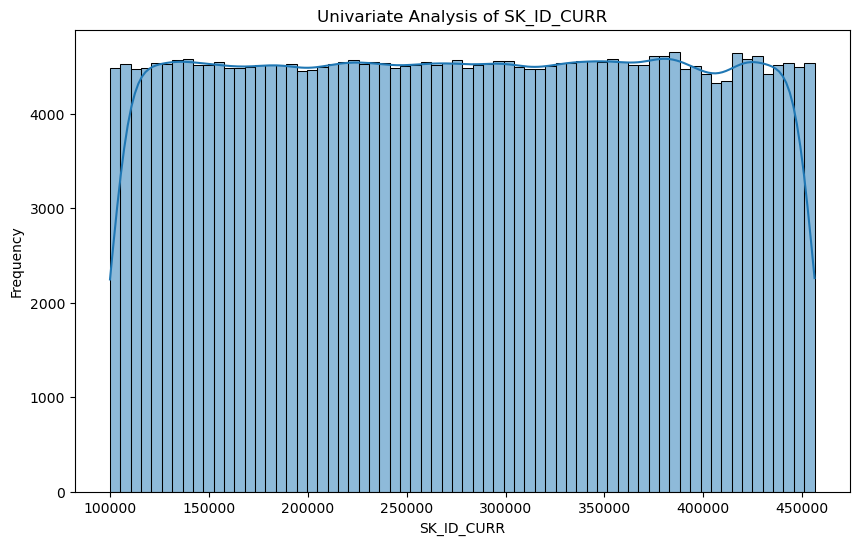

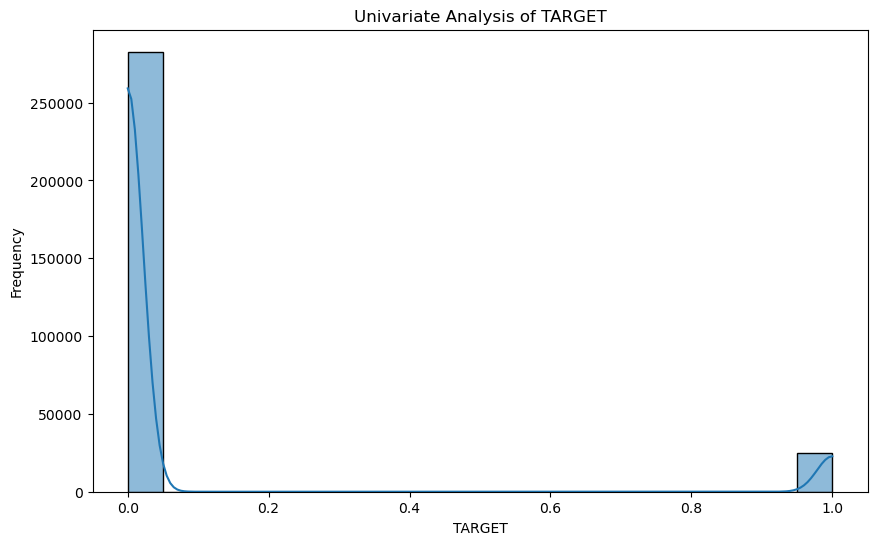

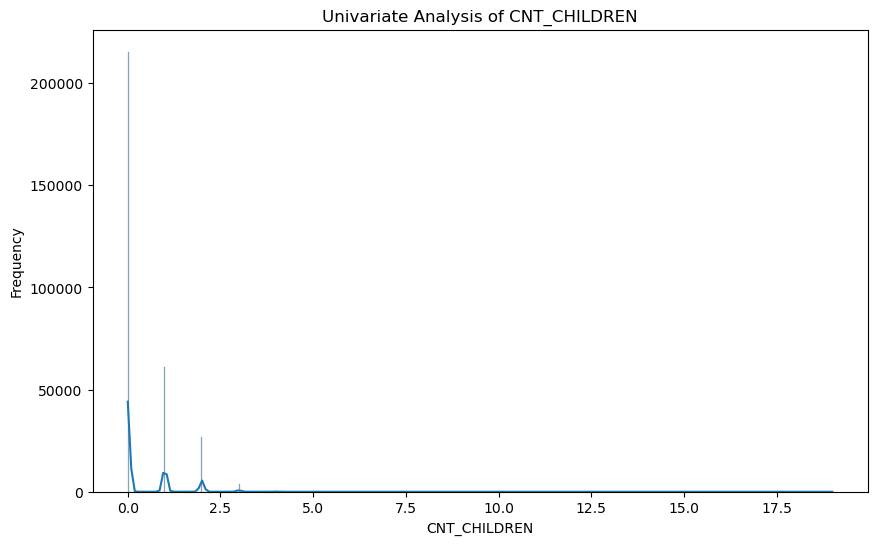

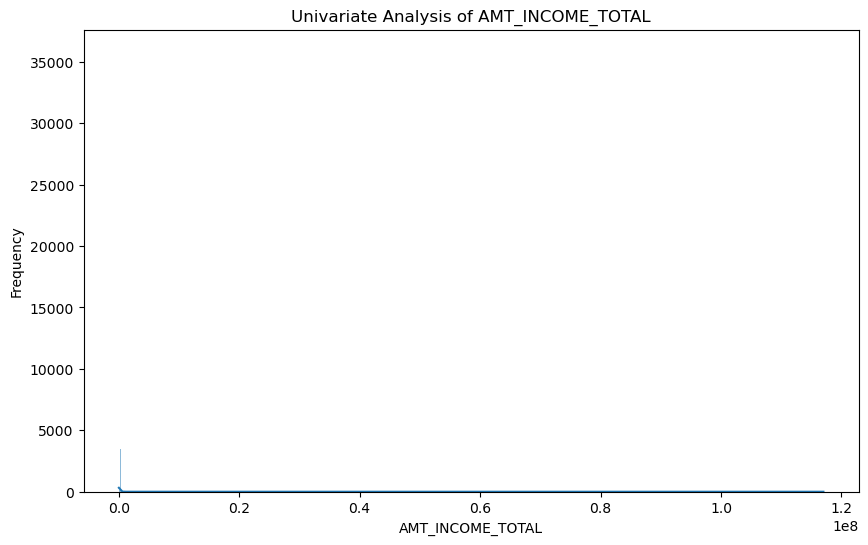

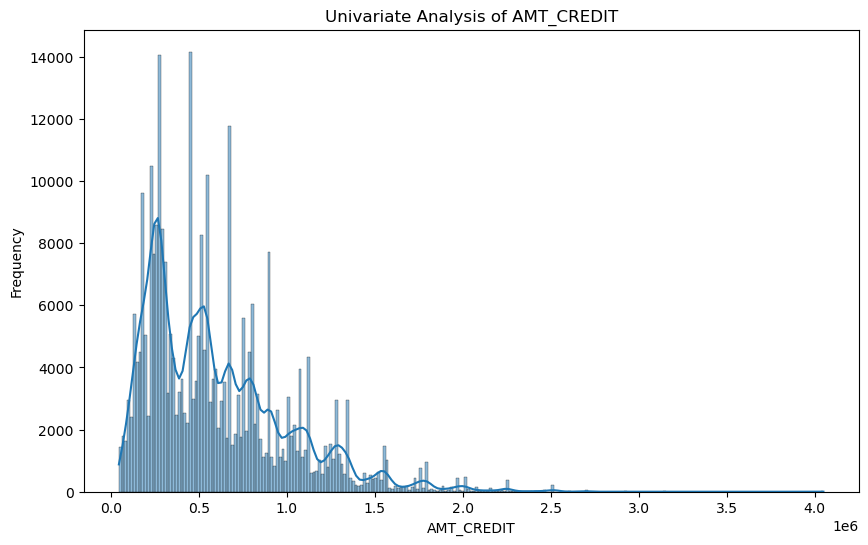

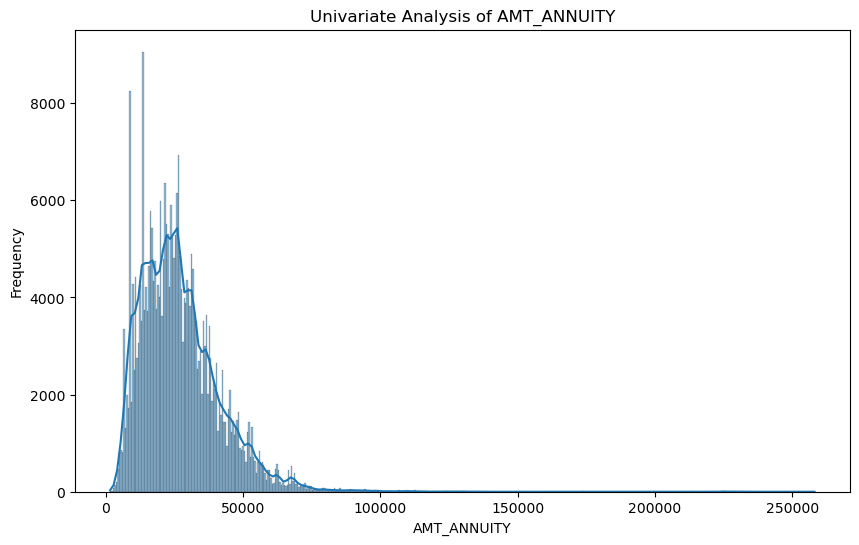

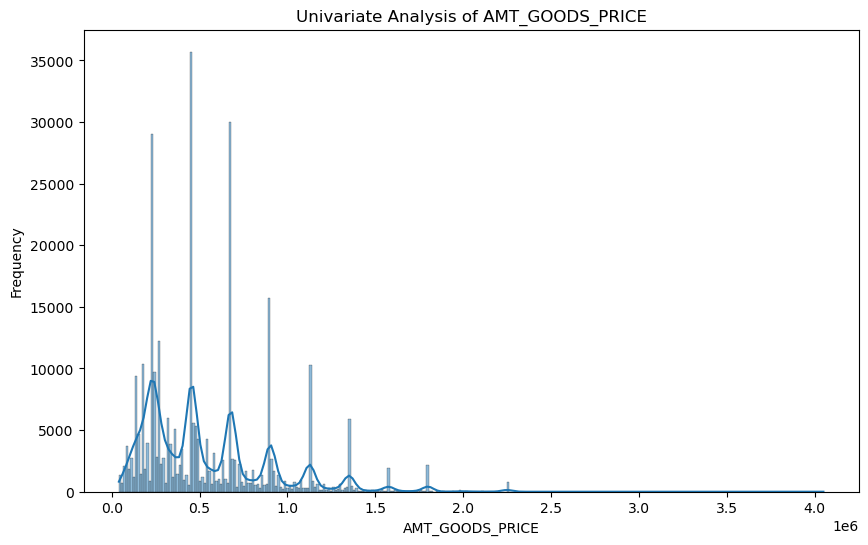

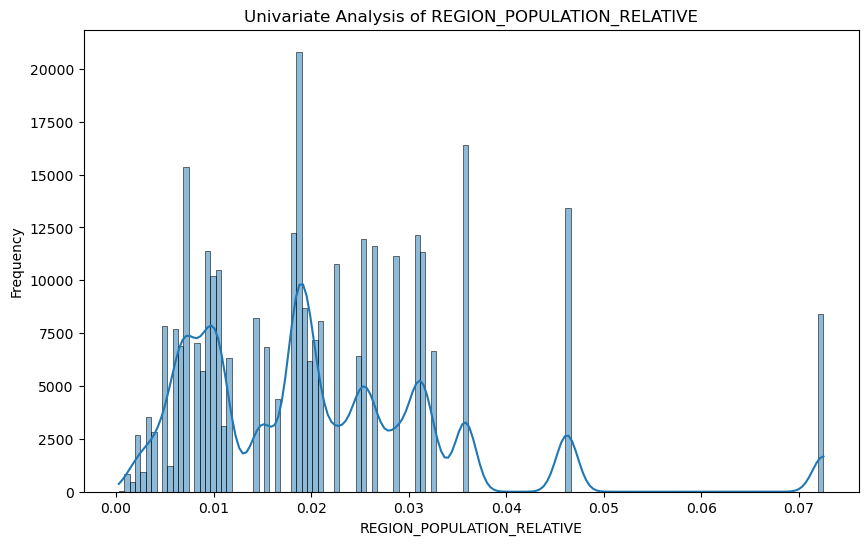

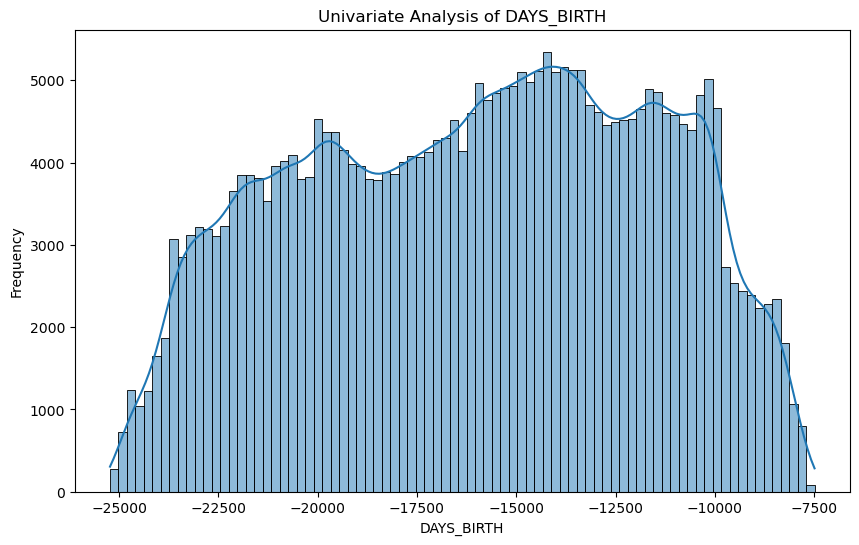

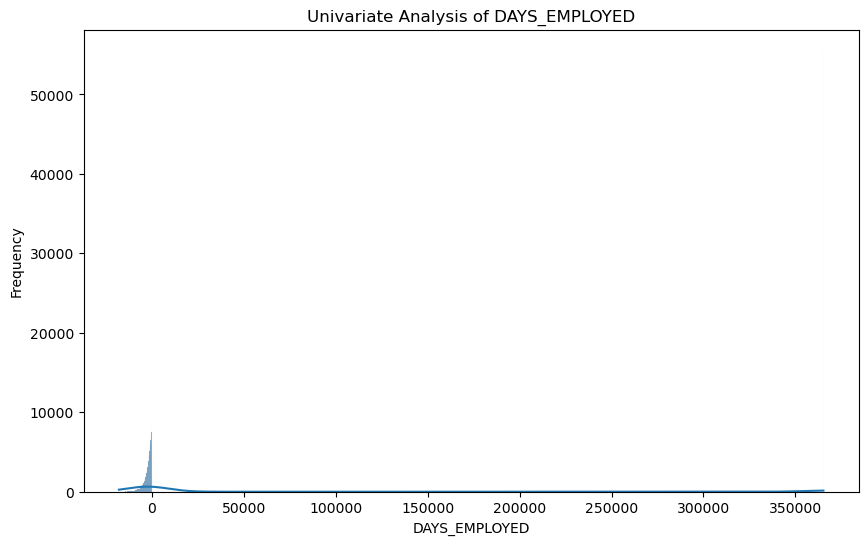

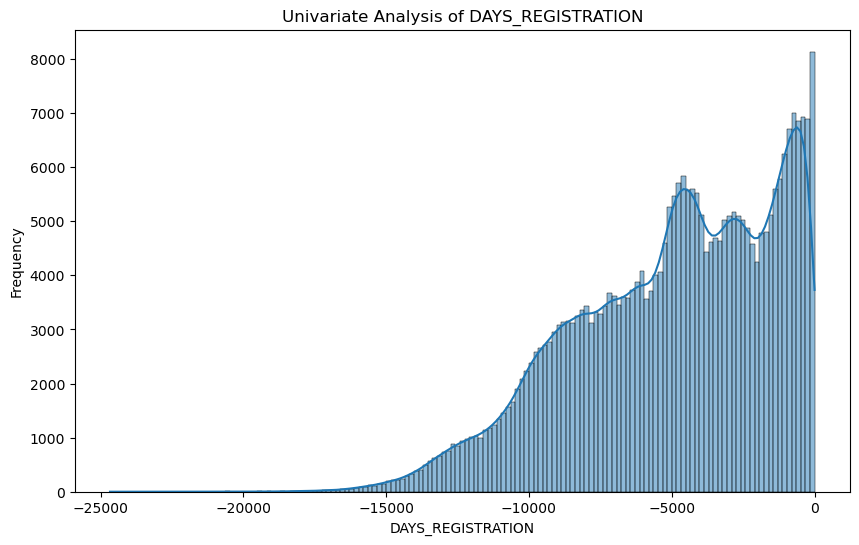

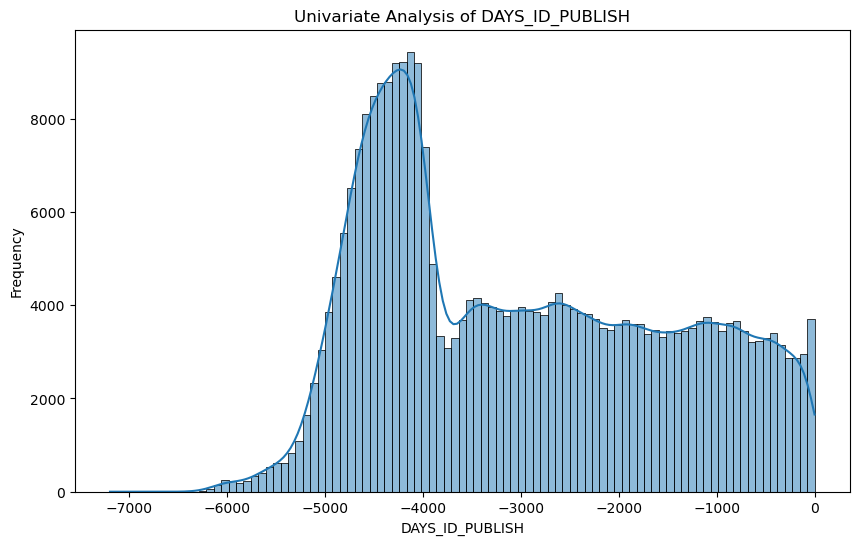

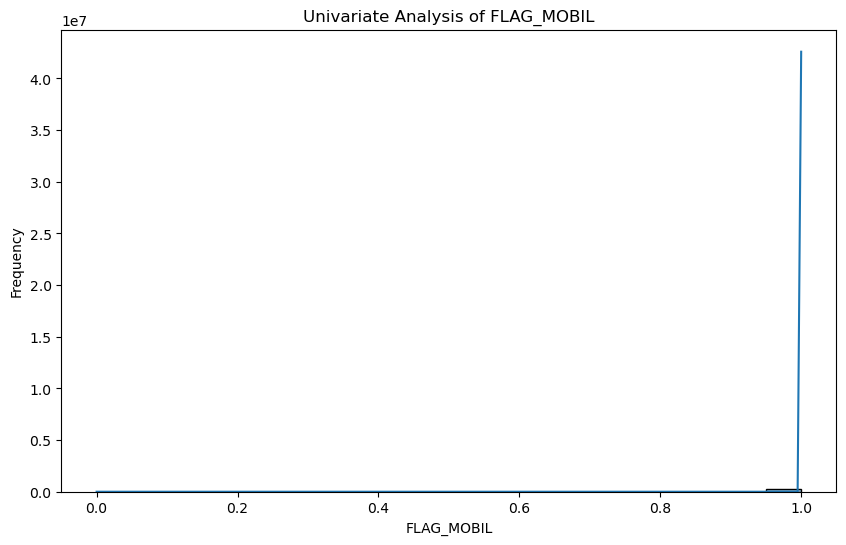

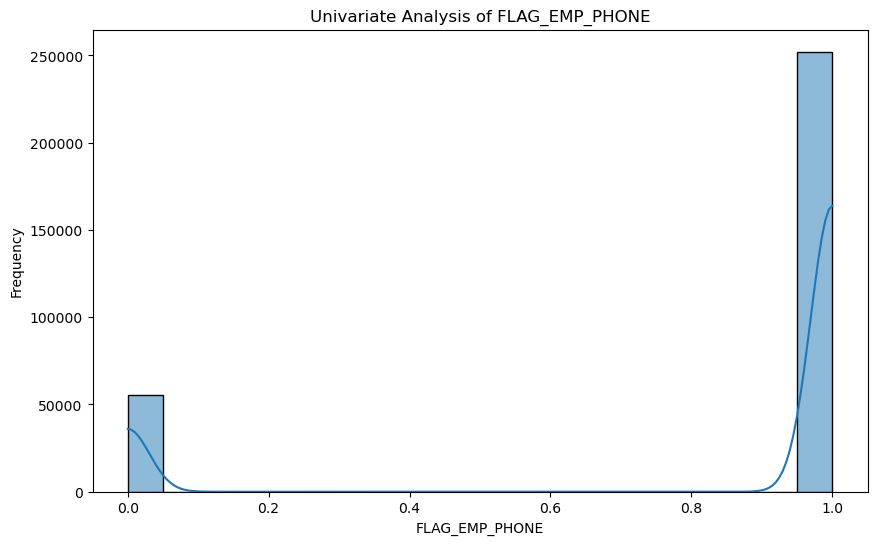

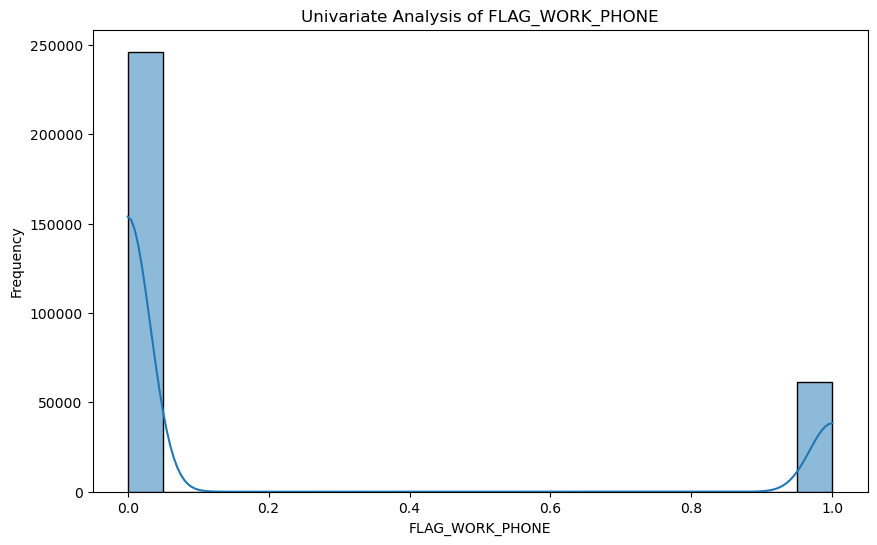

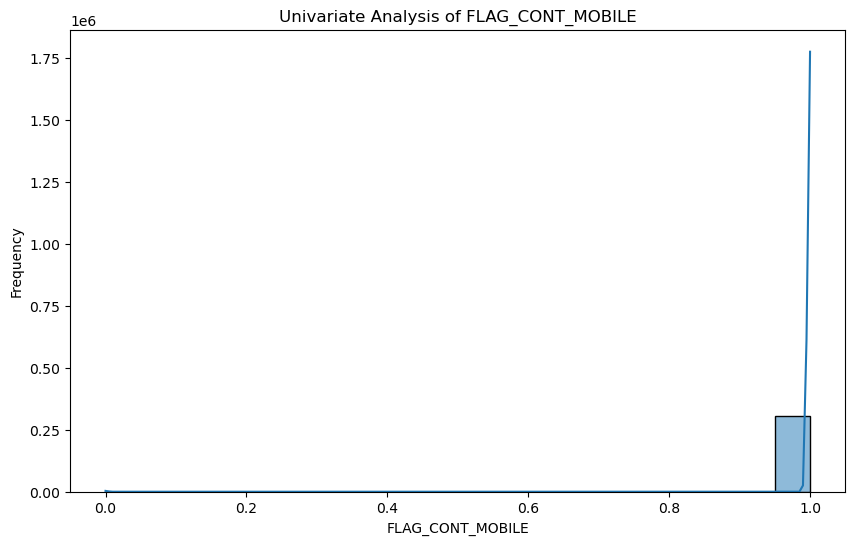

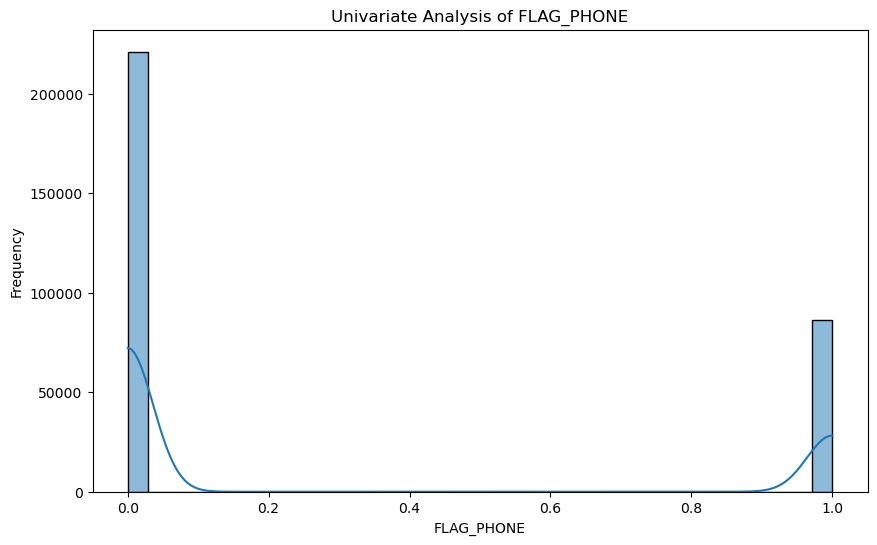

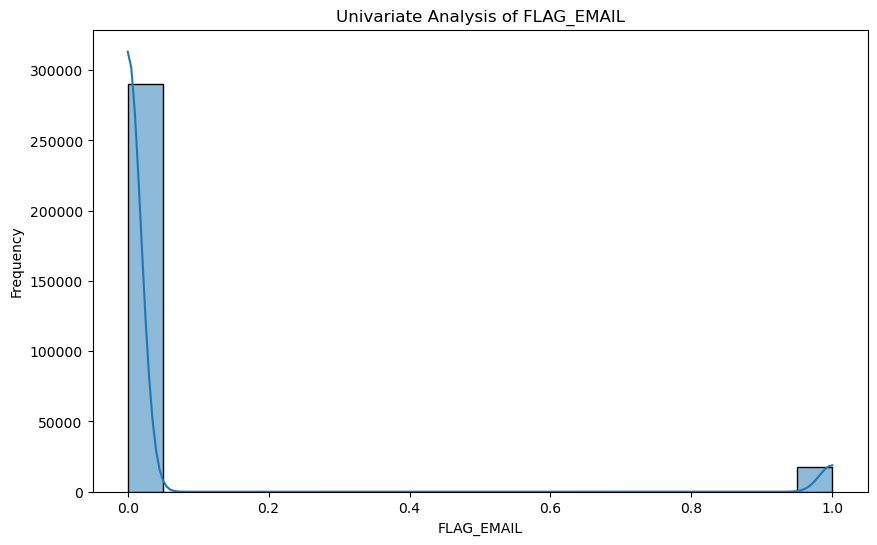

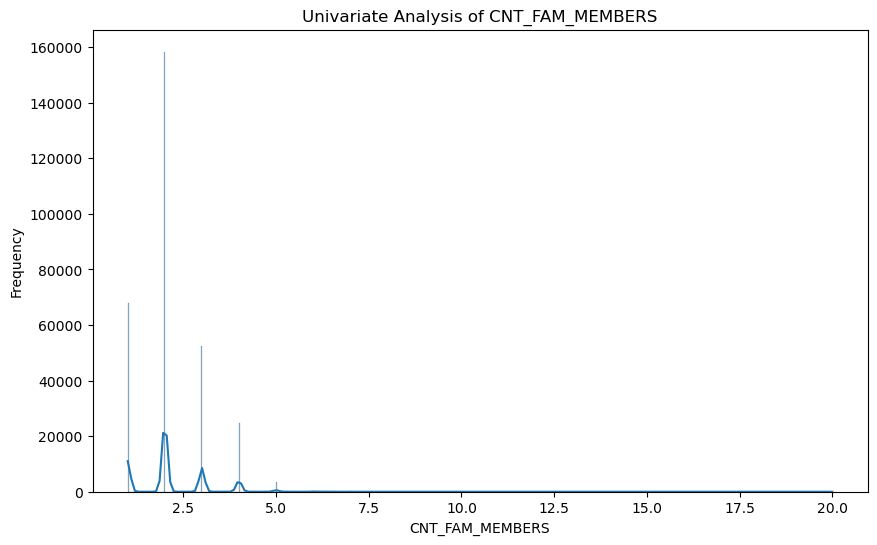

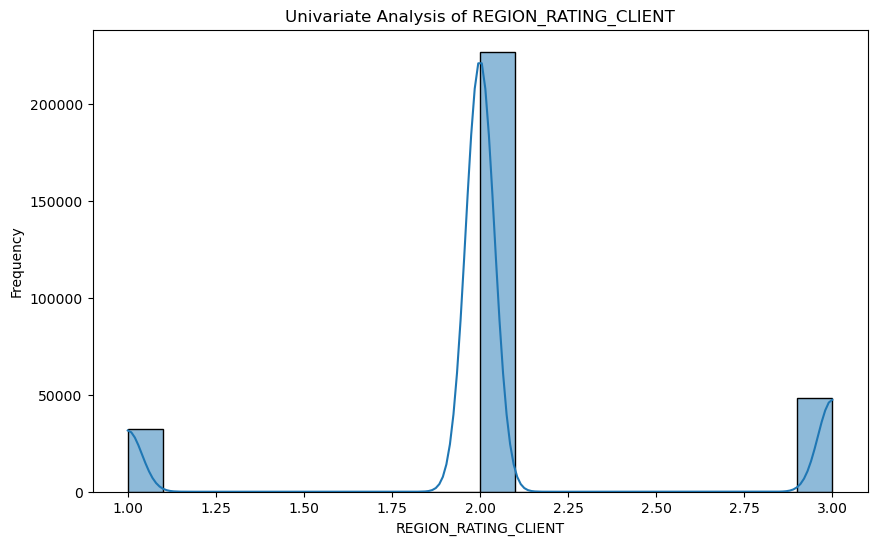

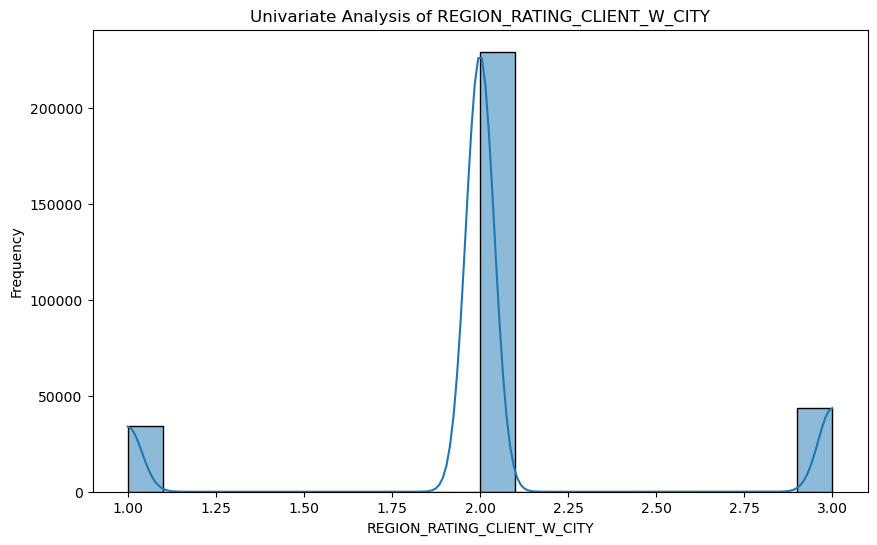

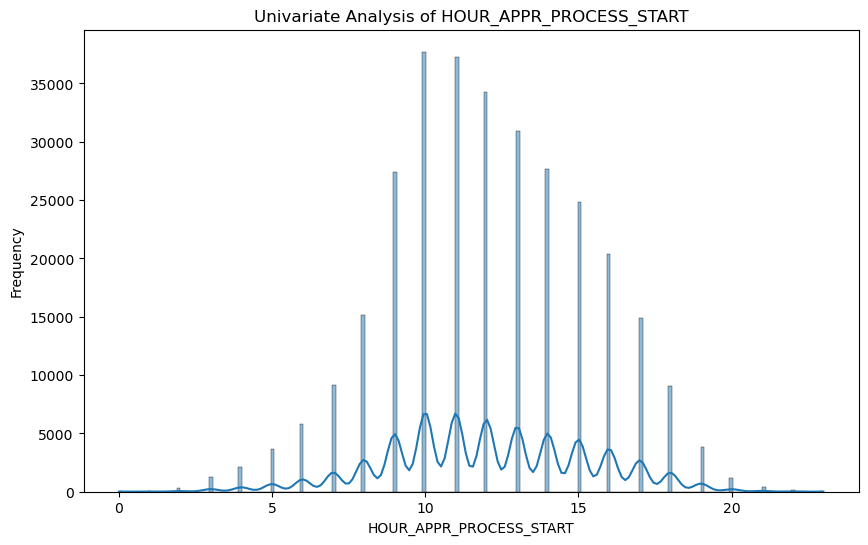

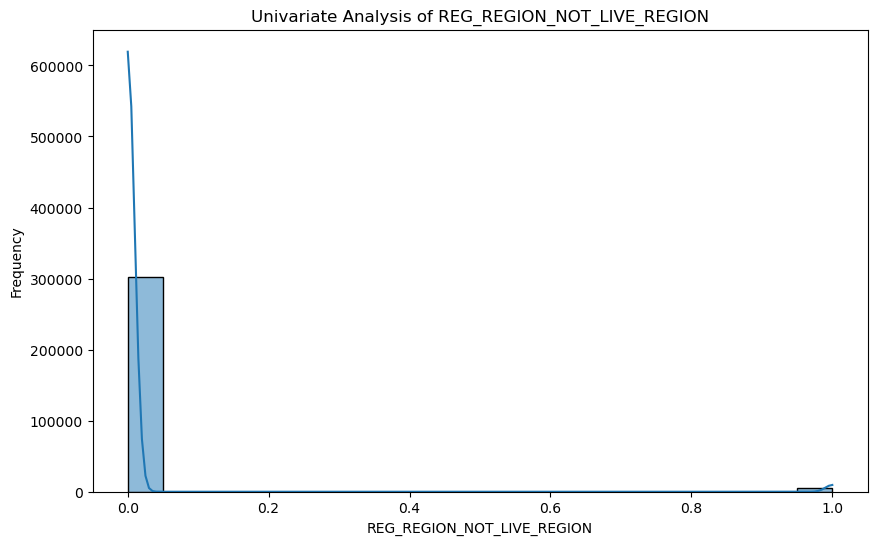

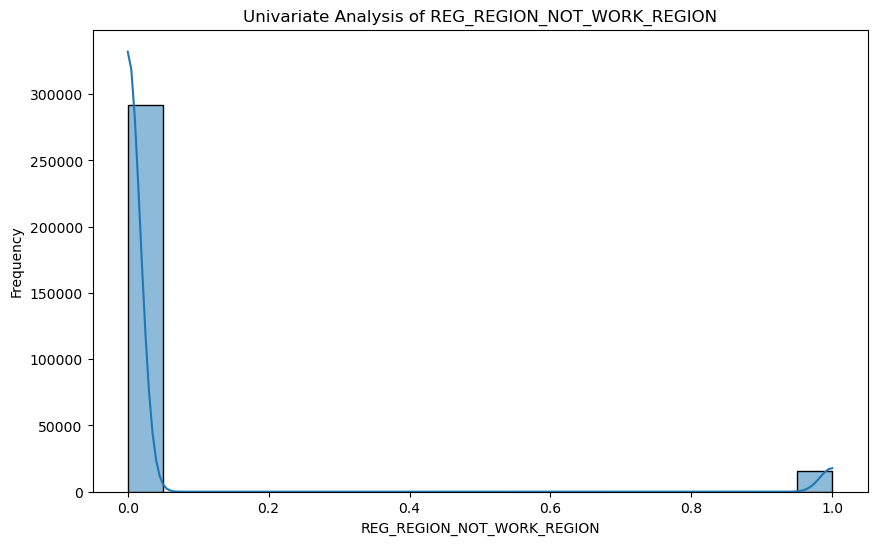

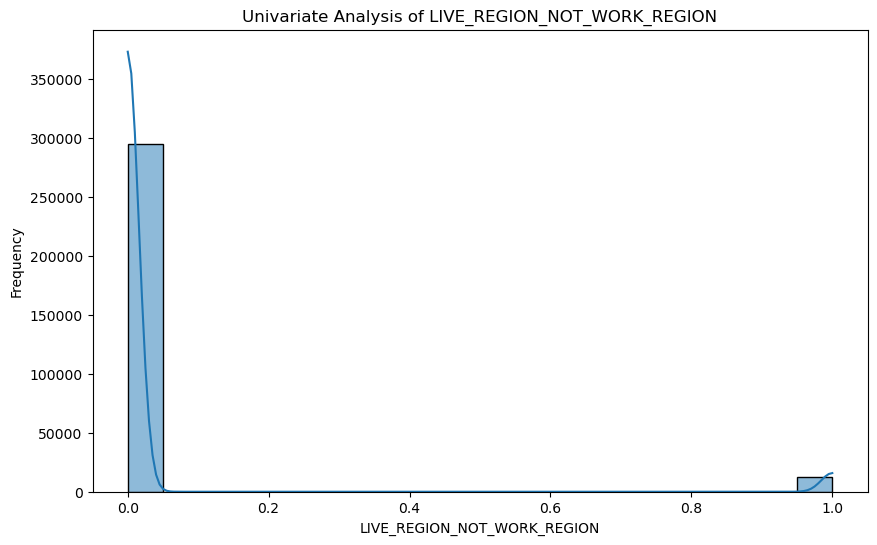

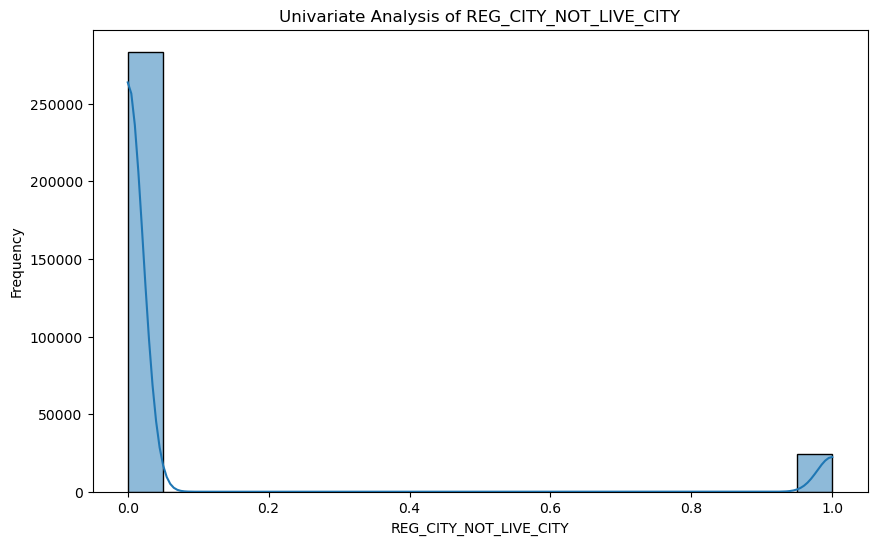

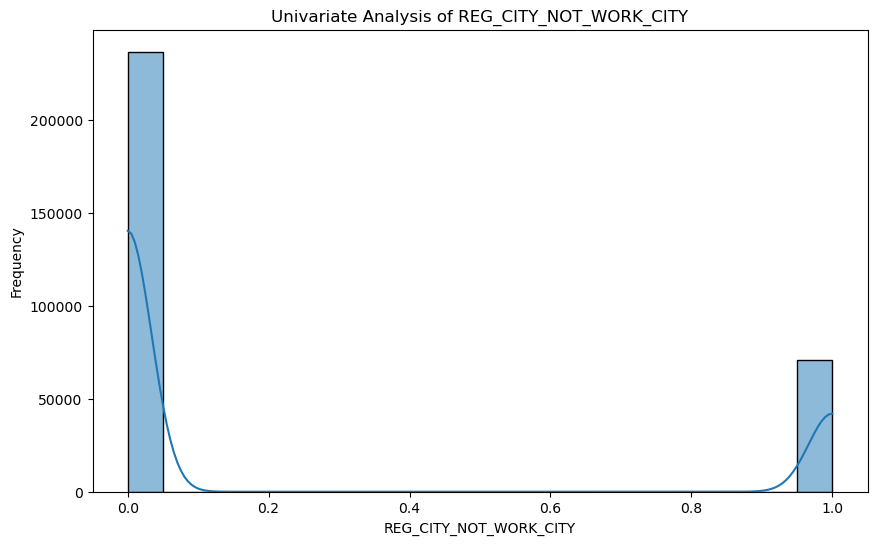

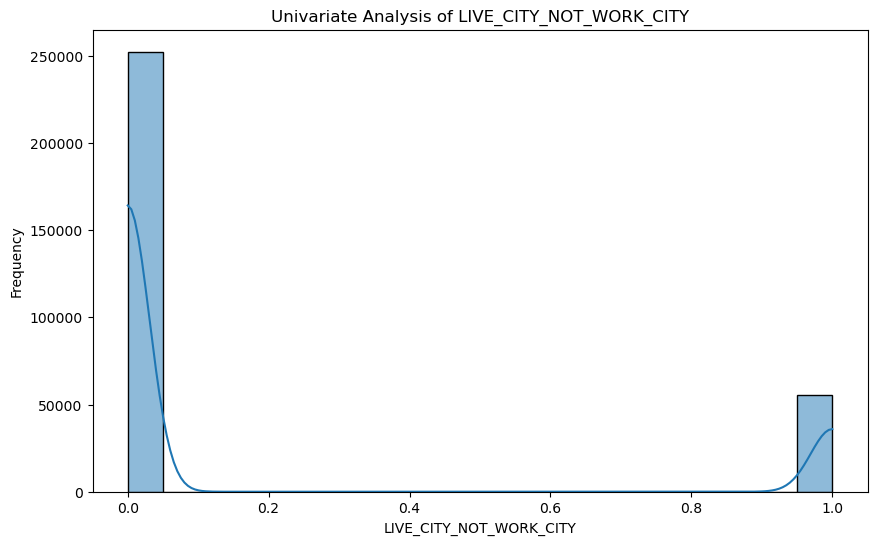

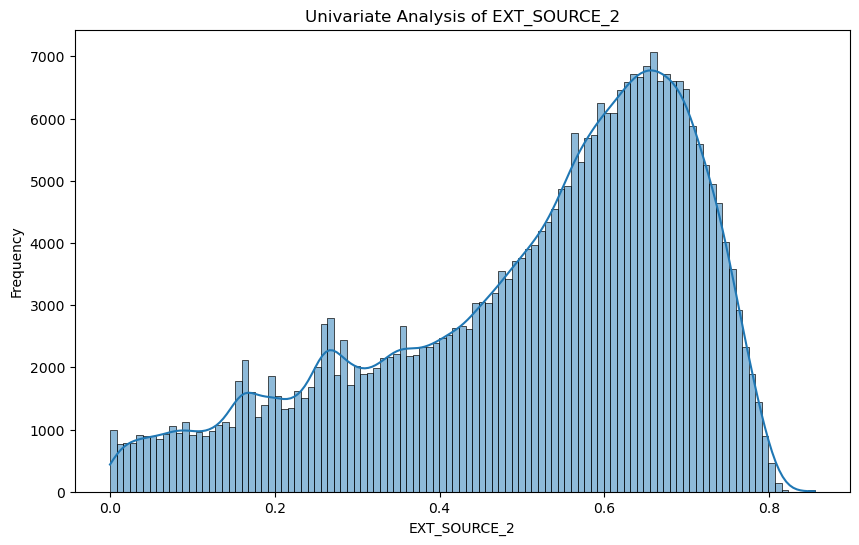

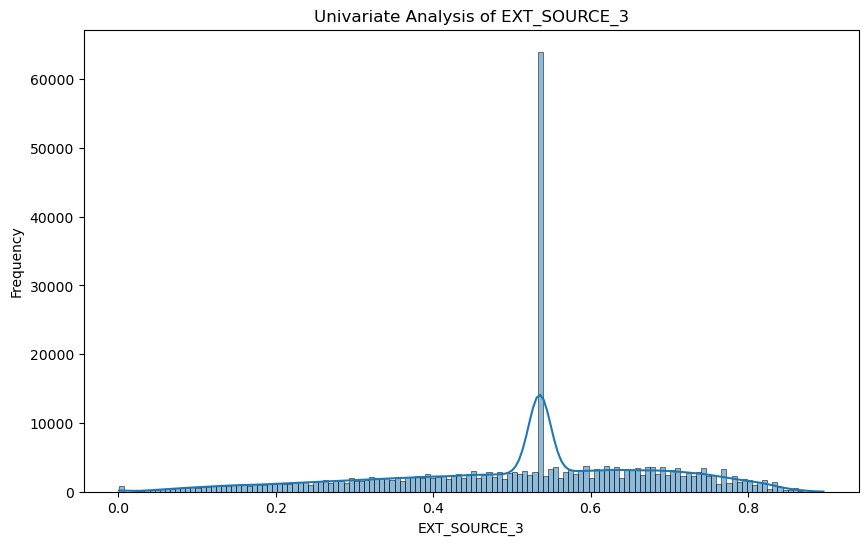

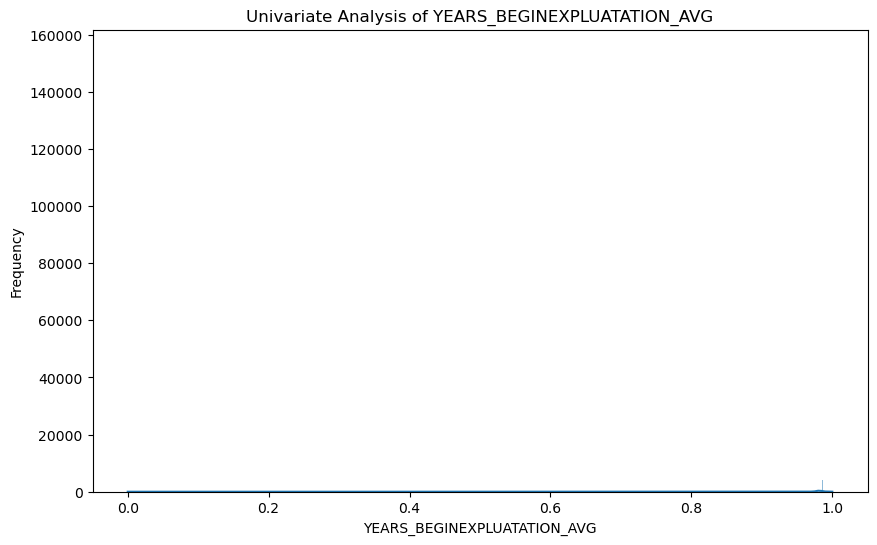

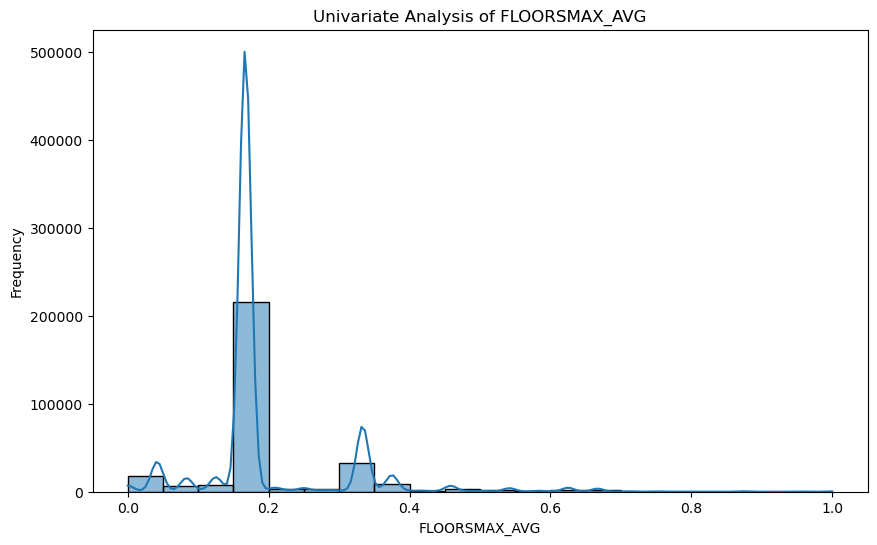

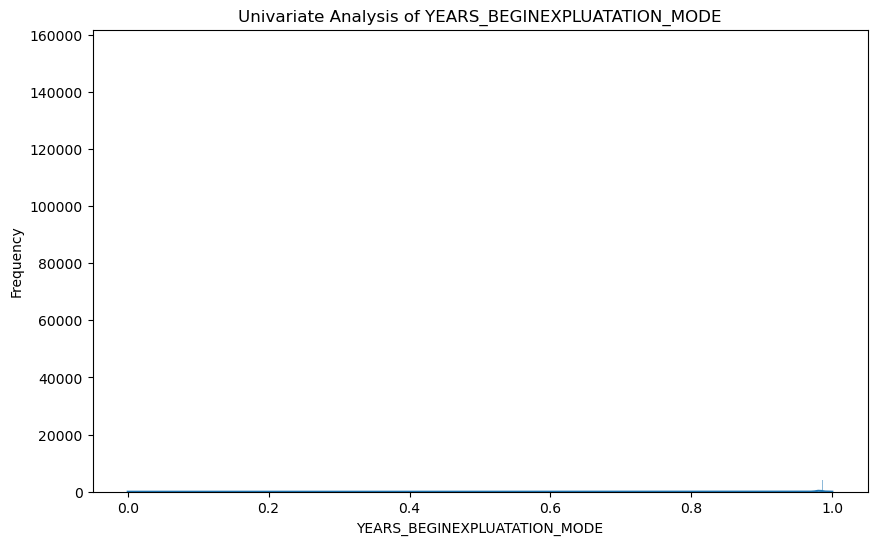

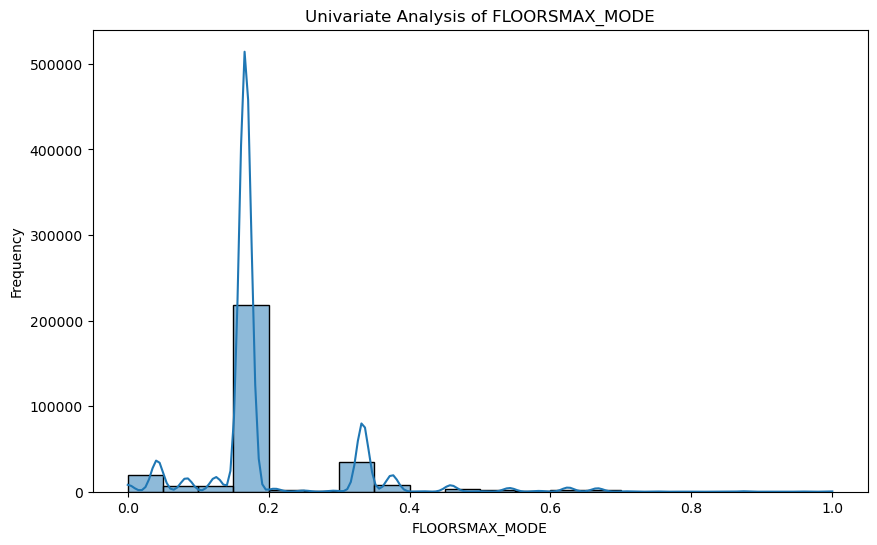

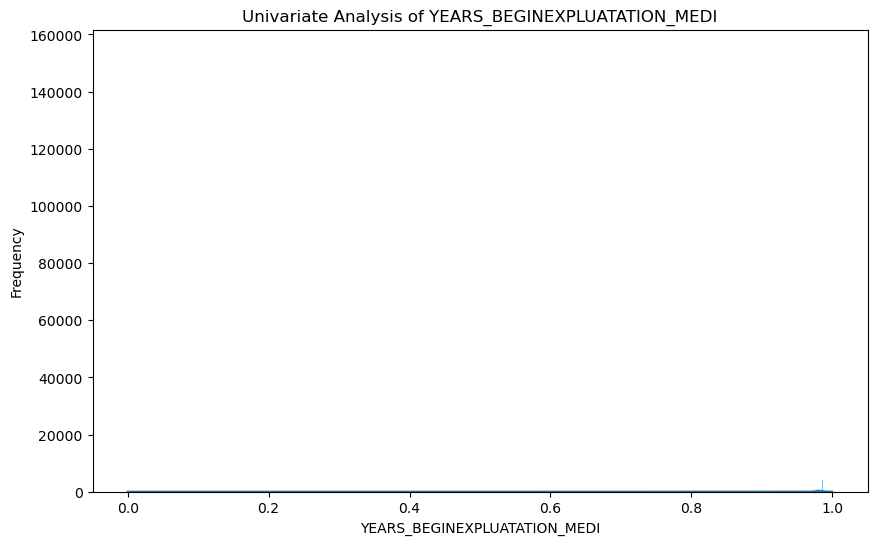

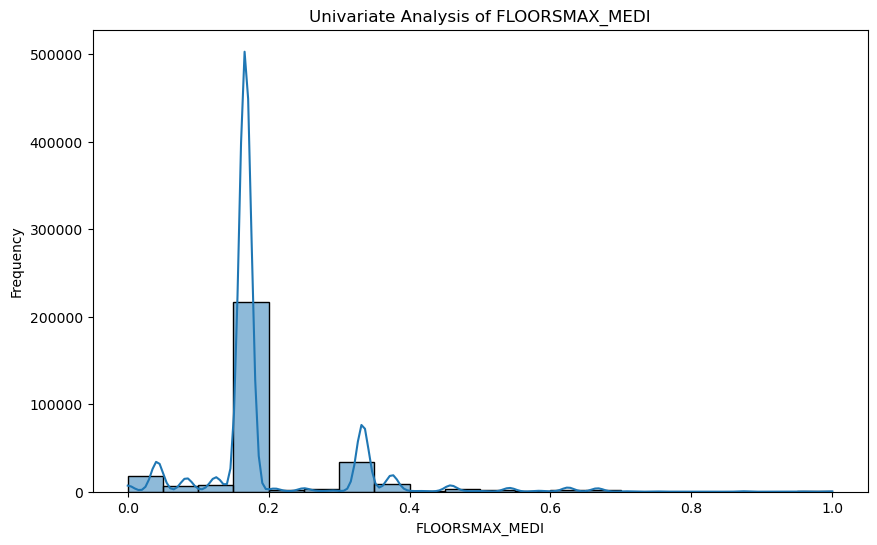

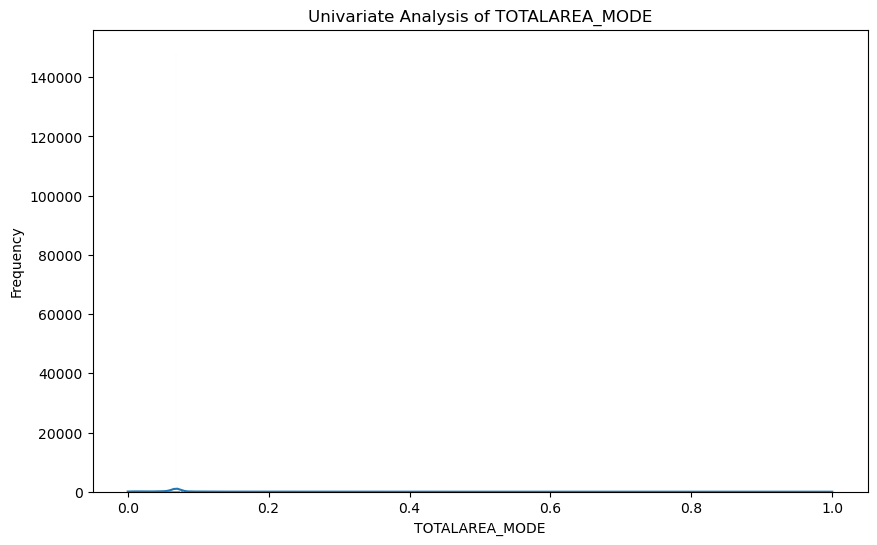

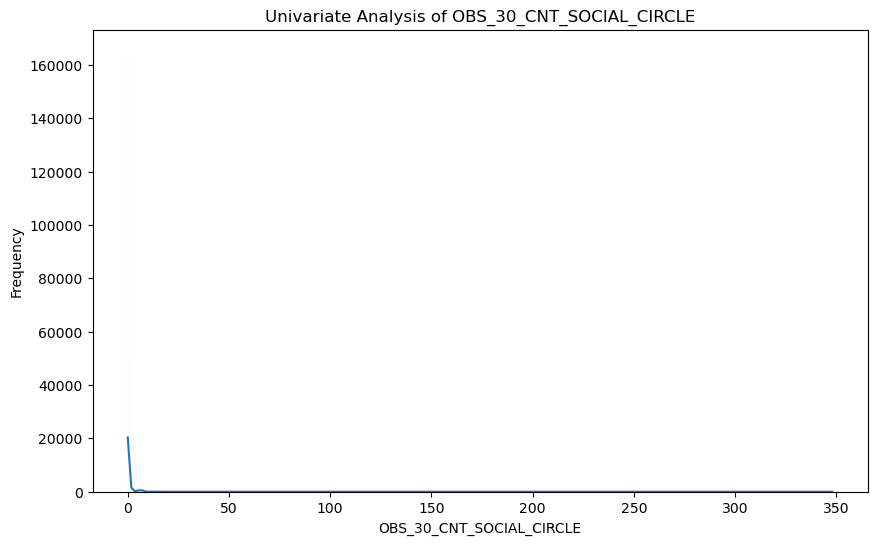

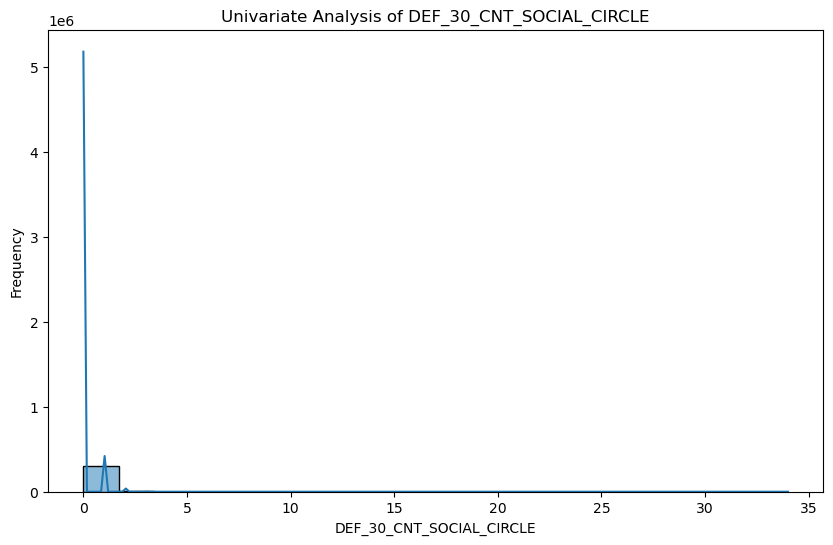

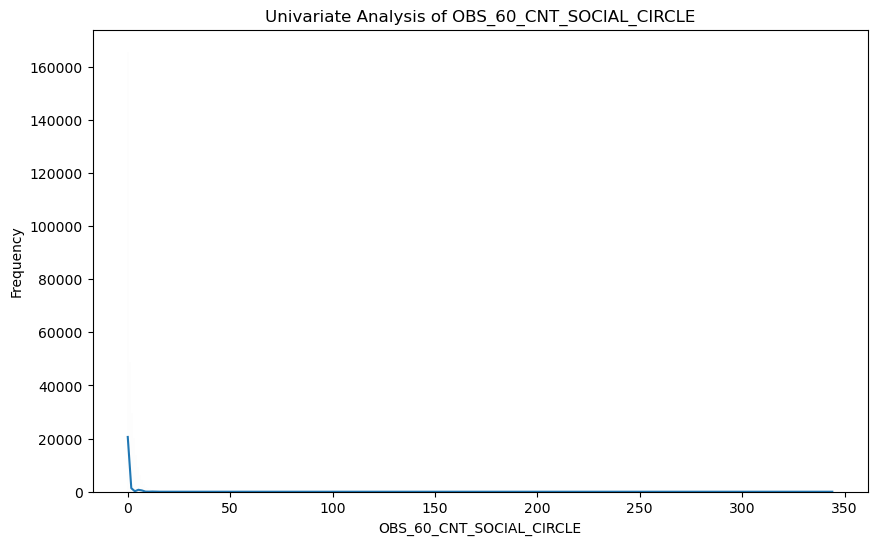

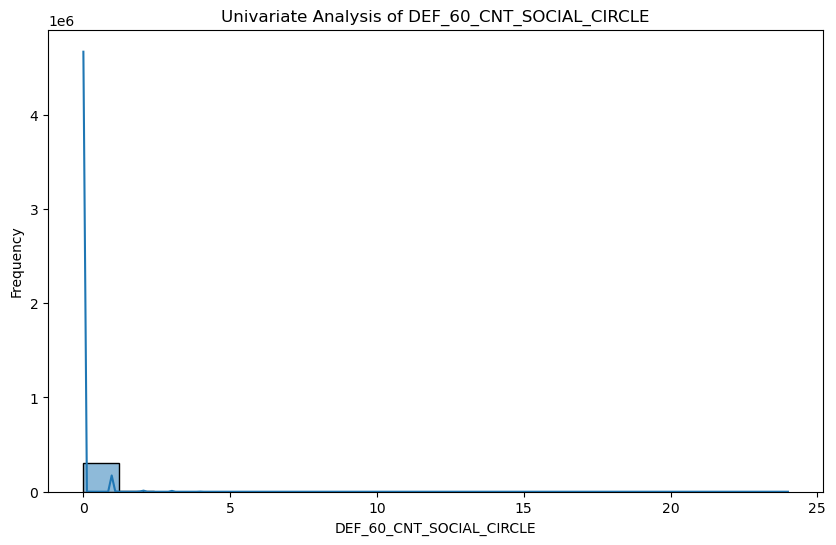

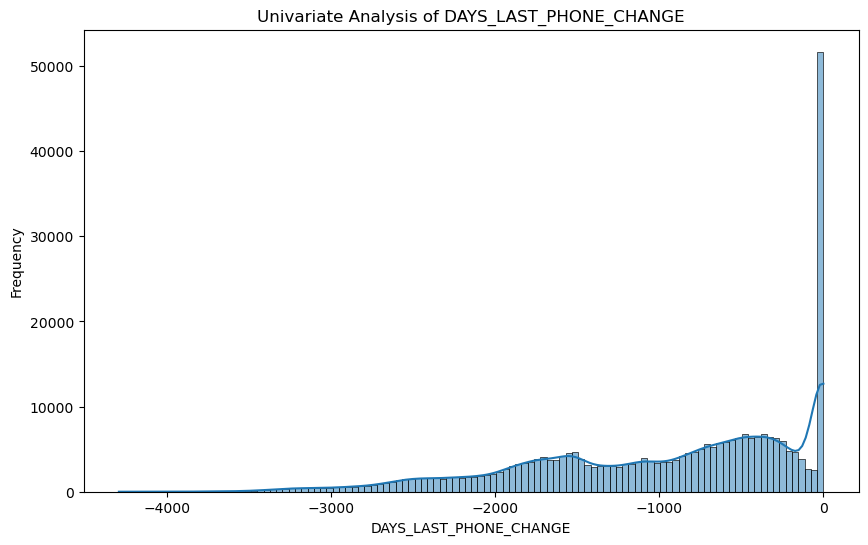

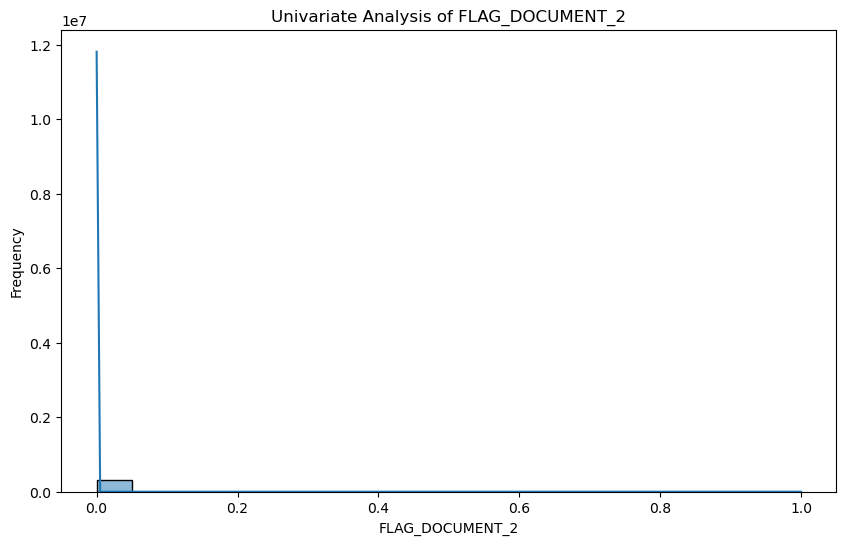

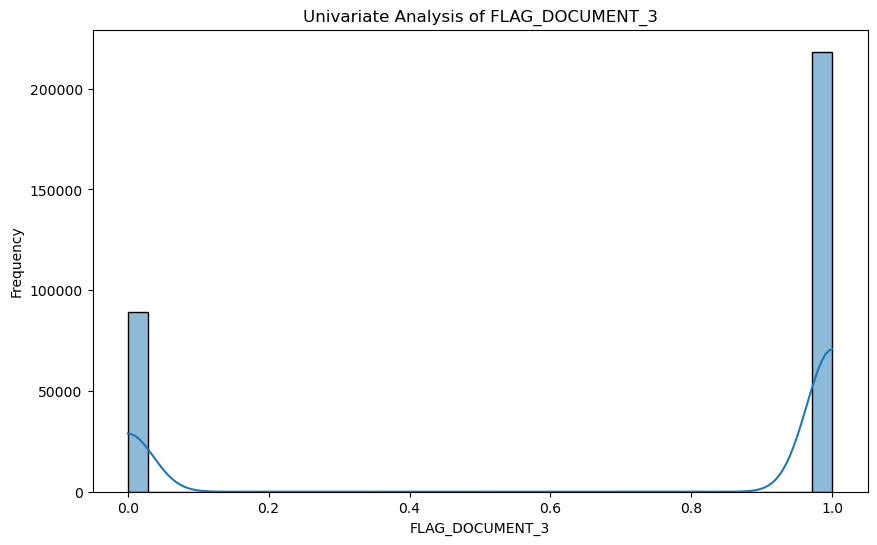

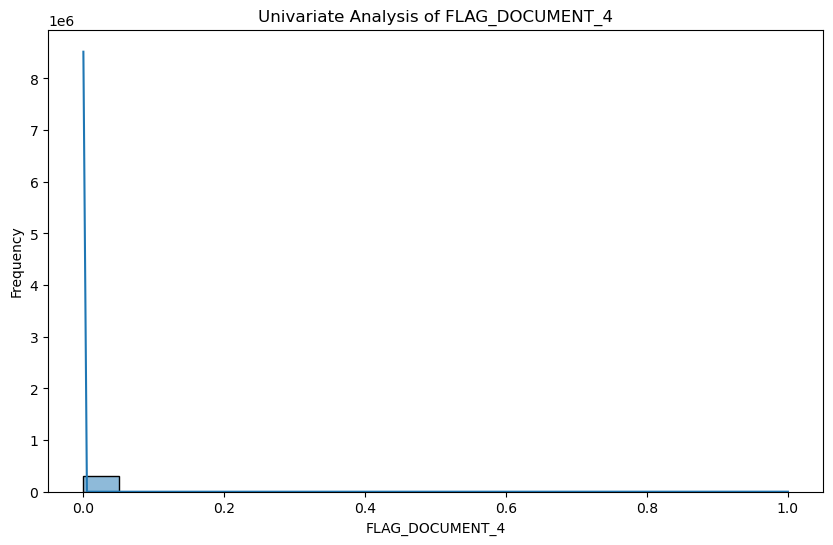

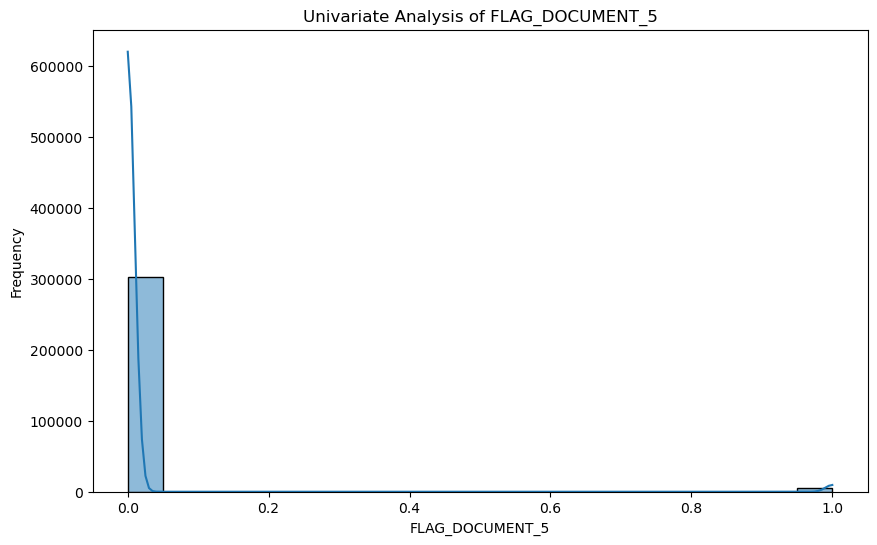

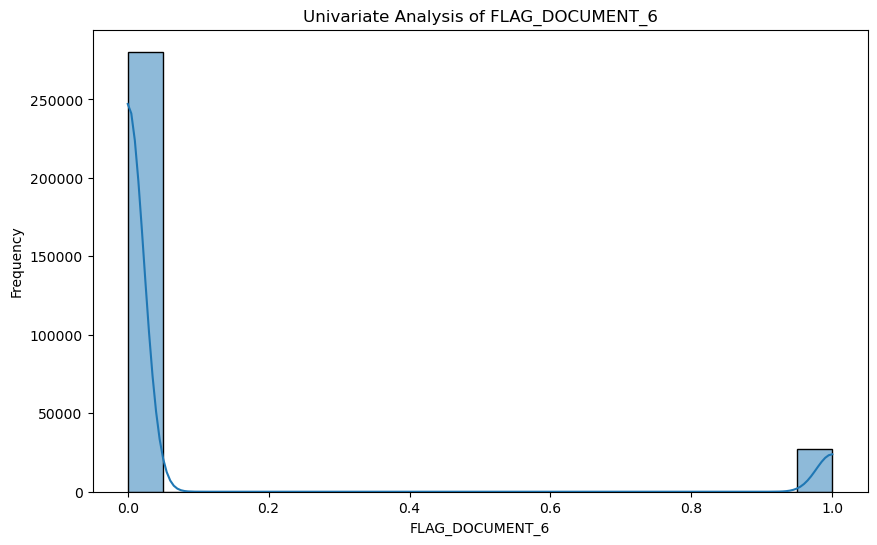

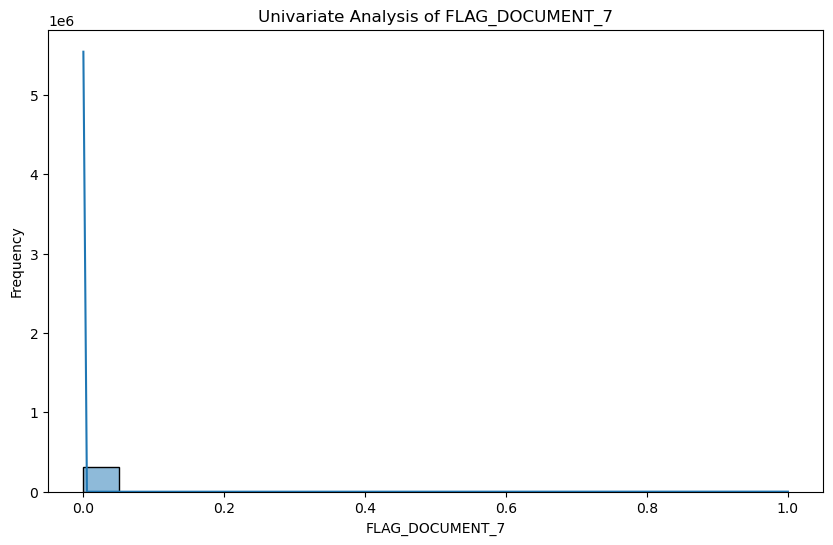

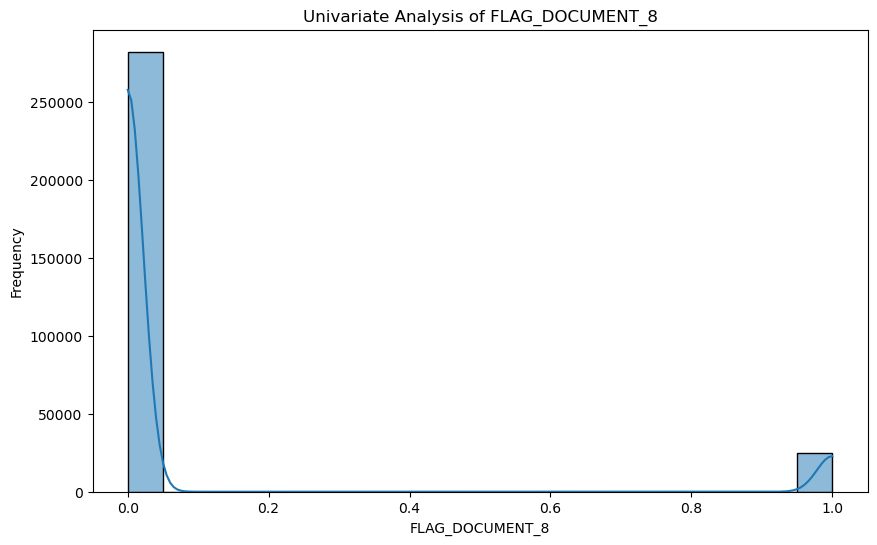

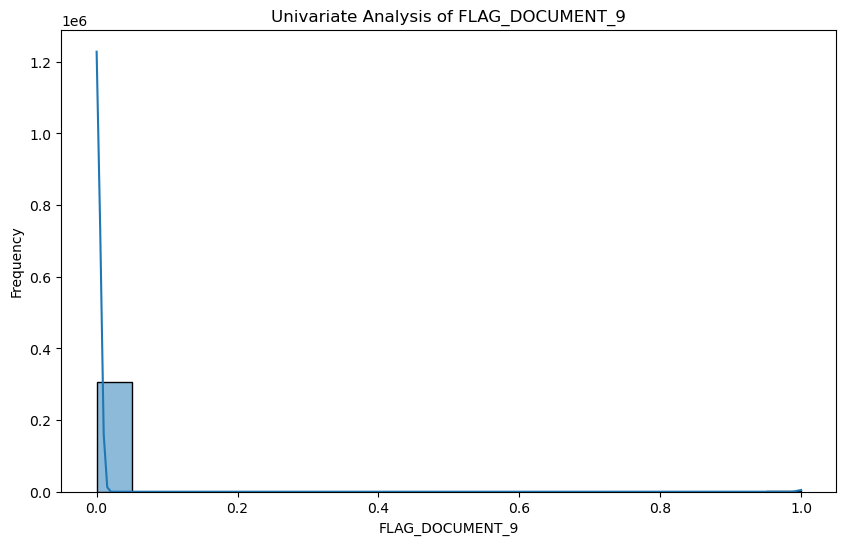

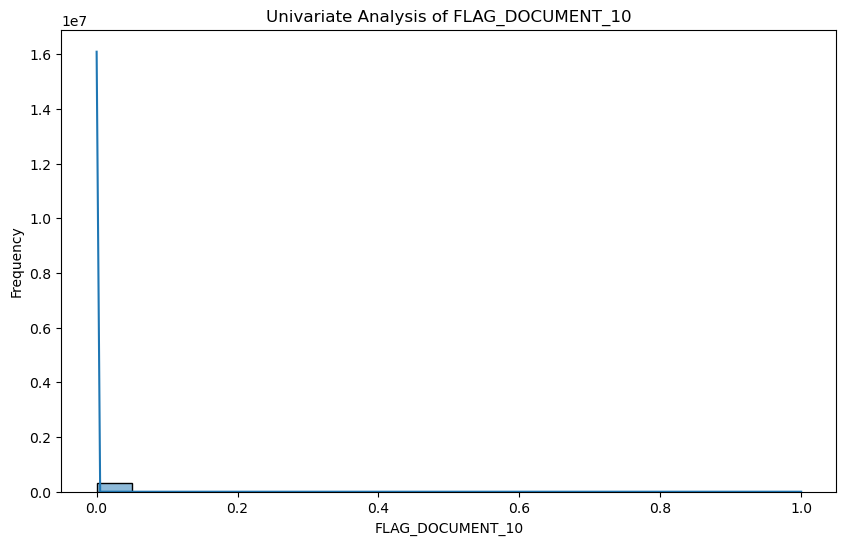

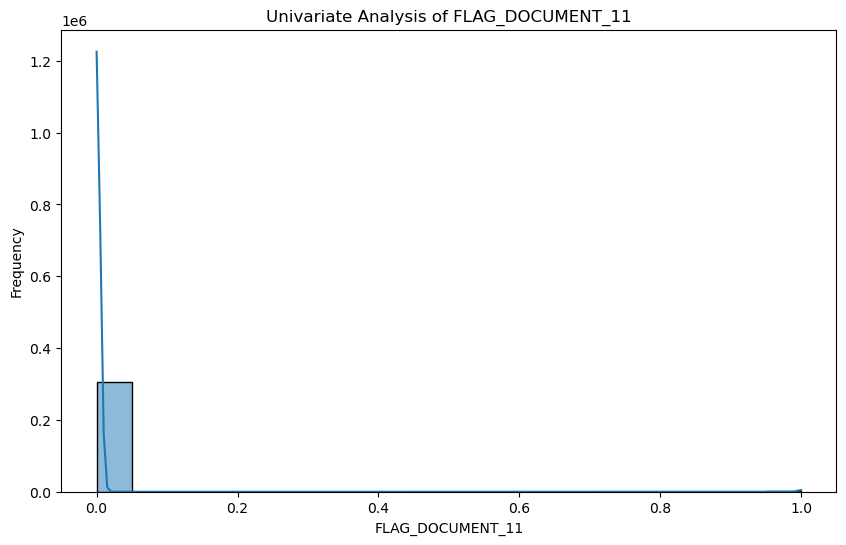

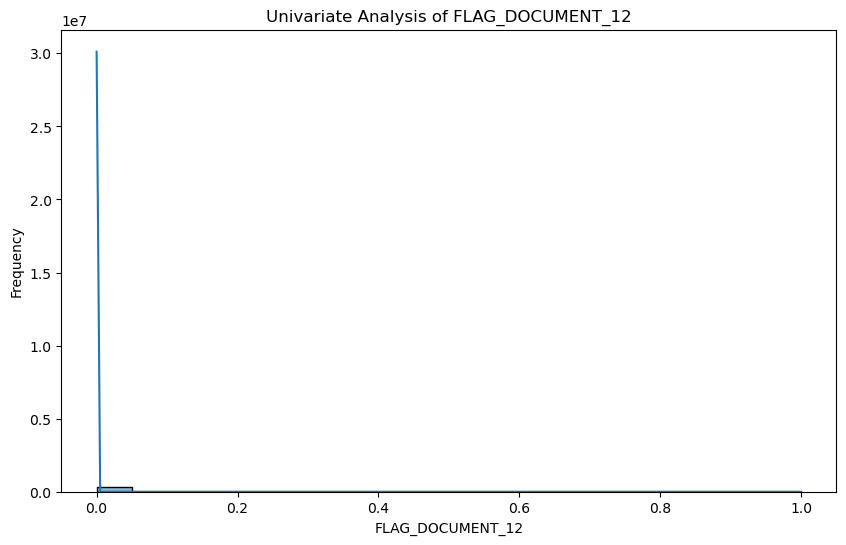

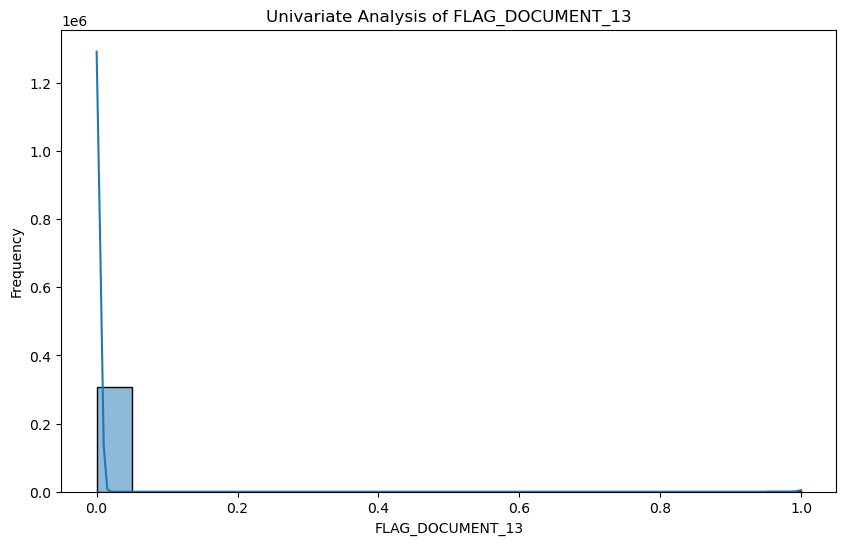

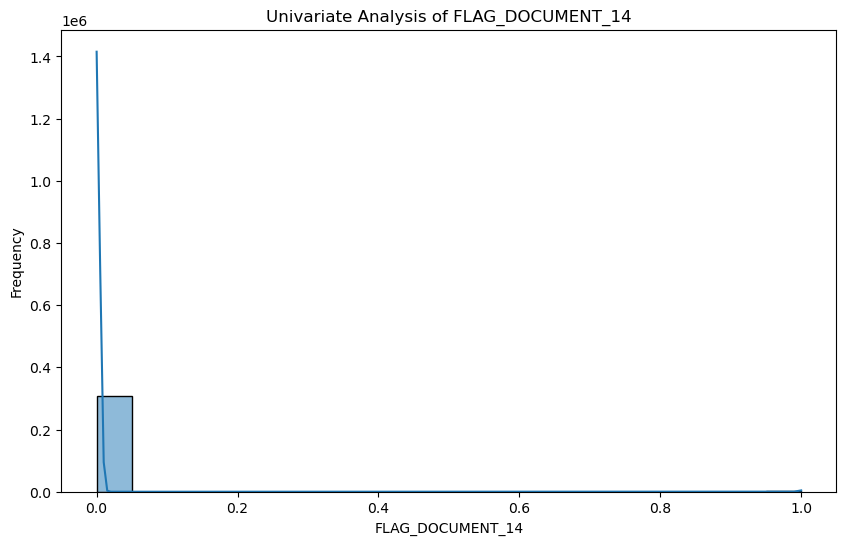

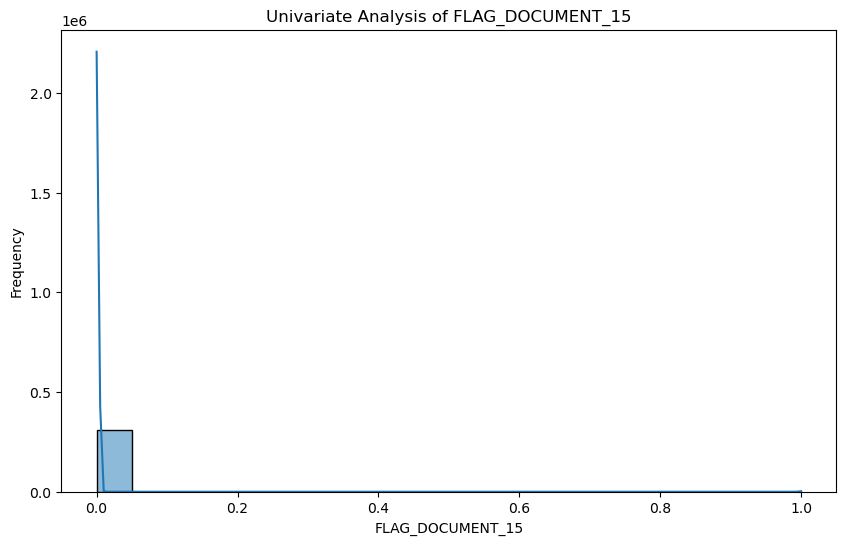

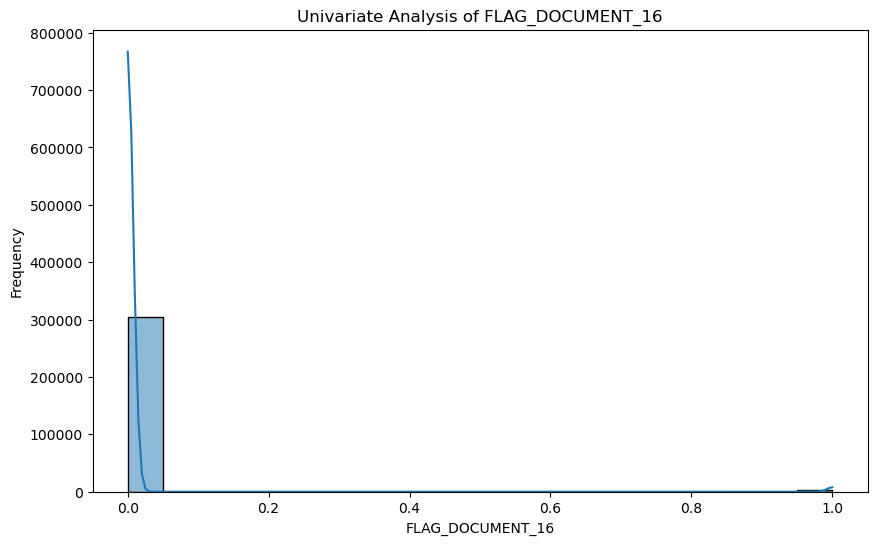

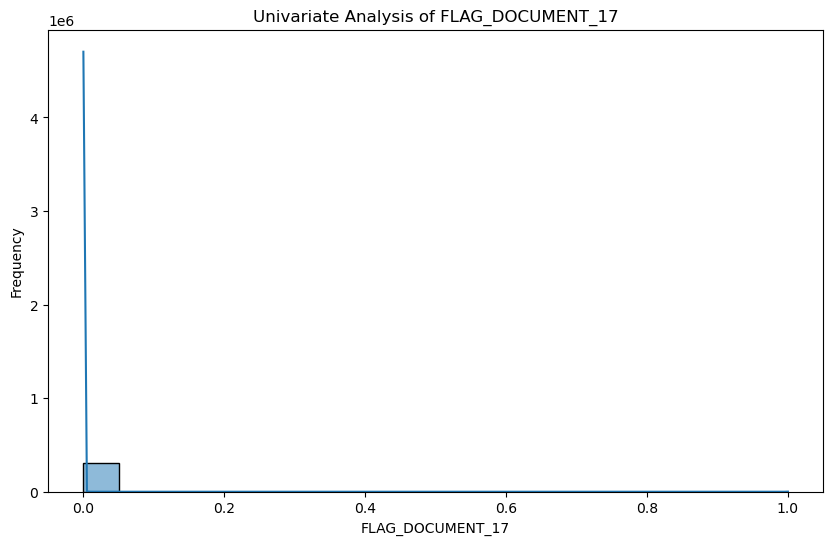

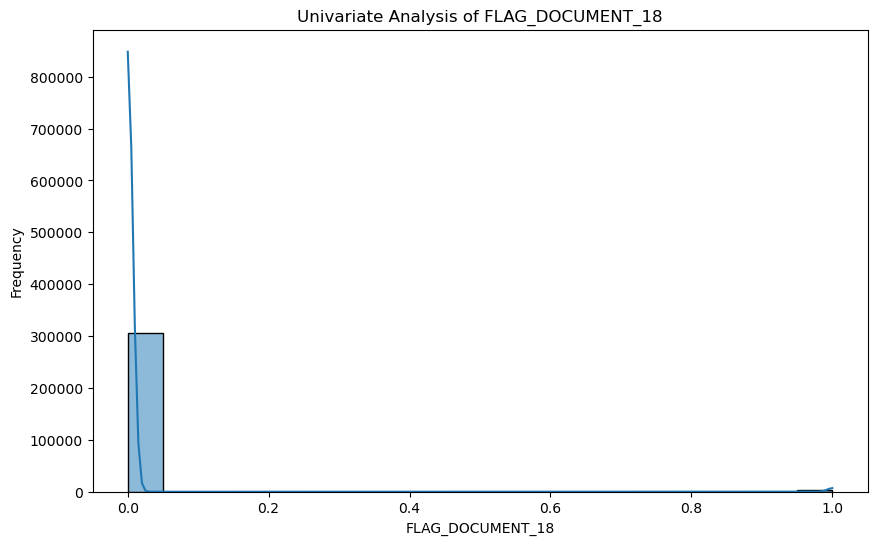

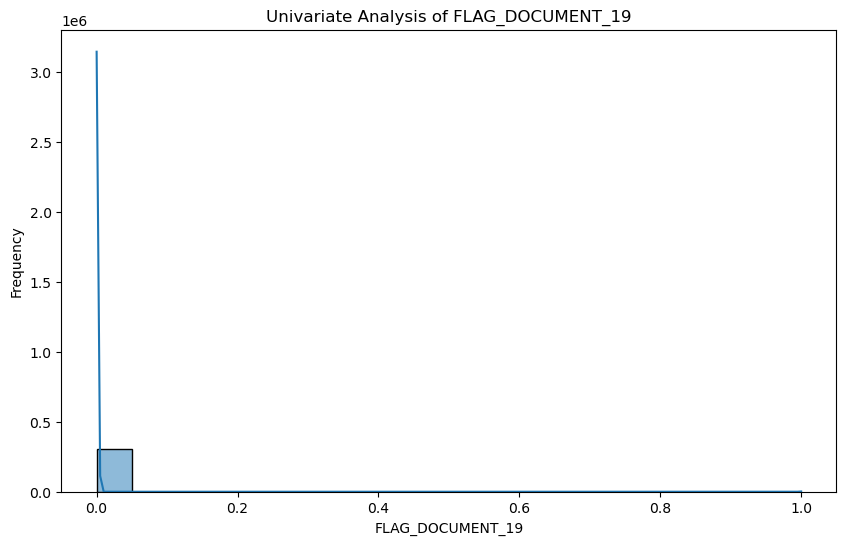

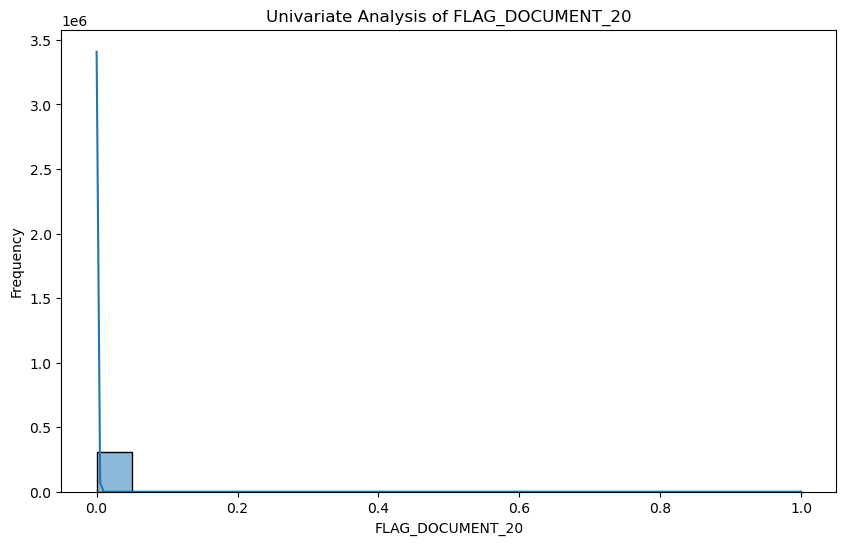

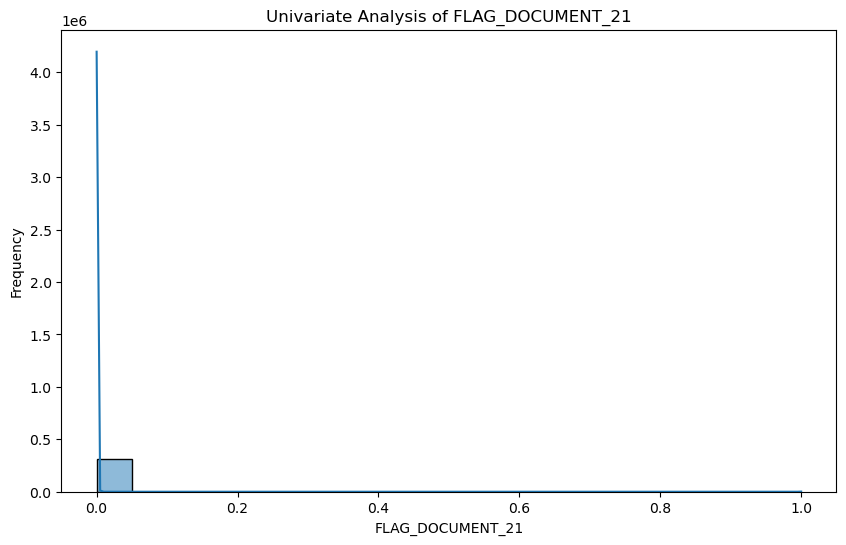

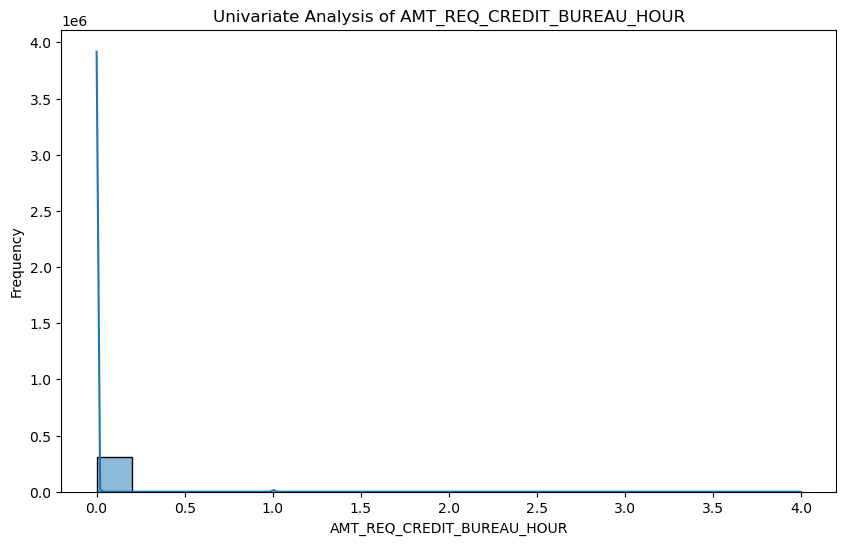

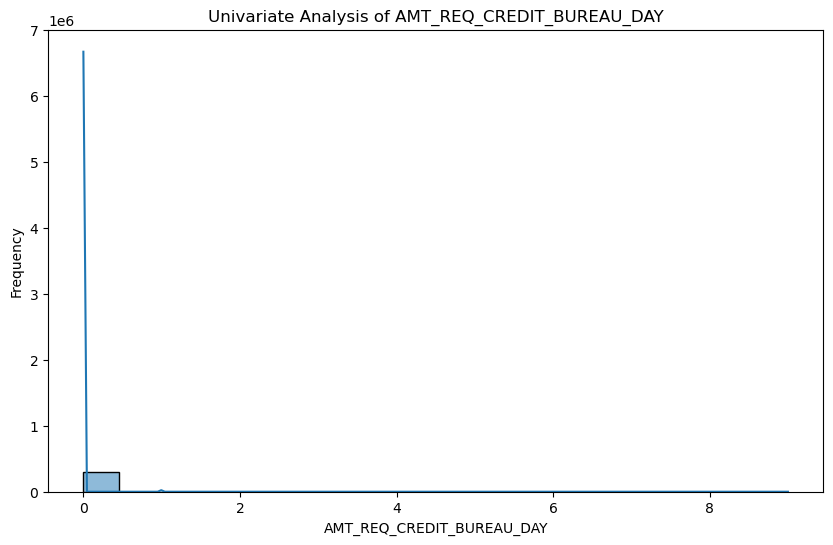

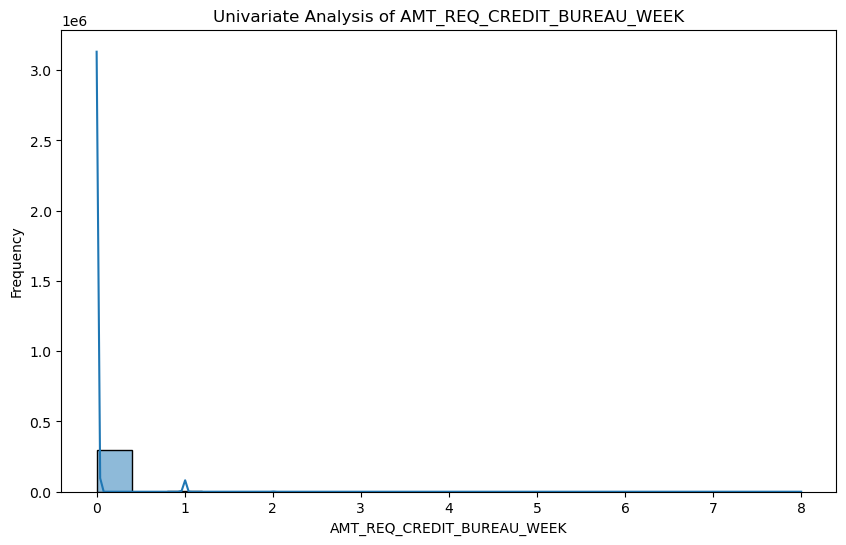

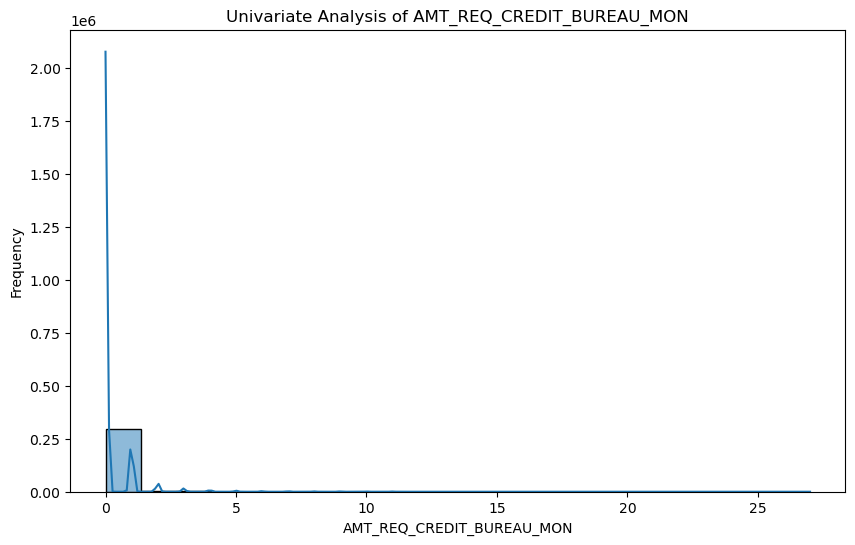

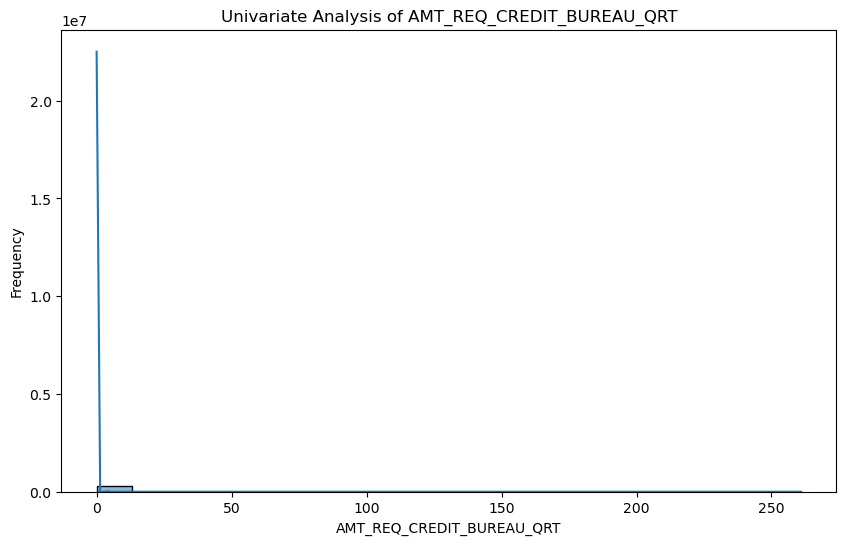

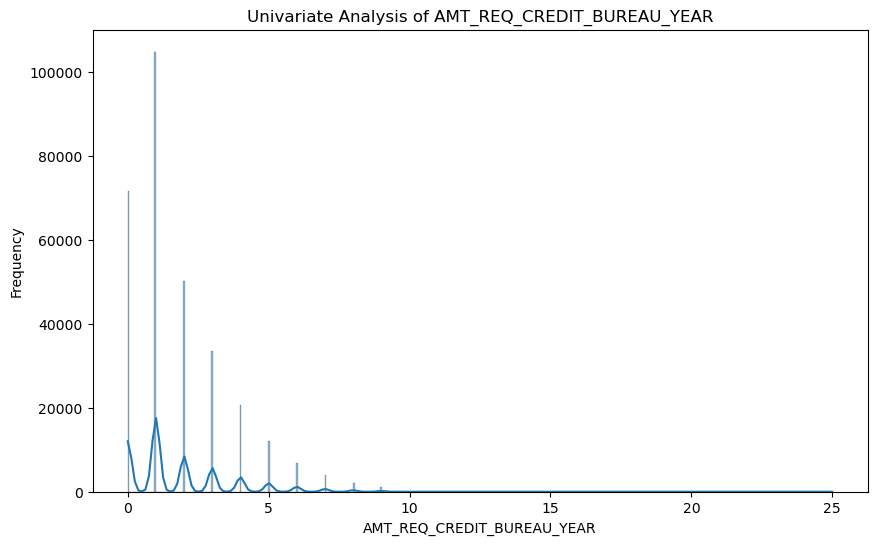

In [29]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Univariate Analysis of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


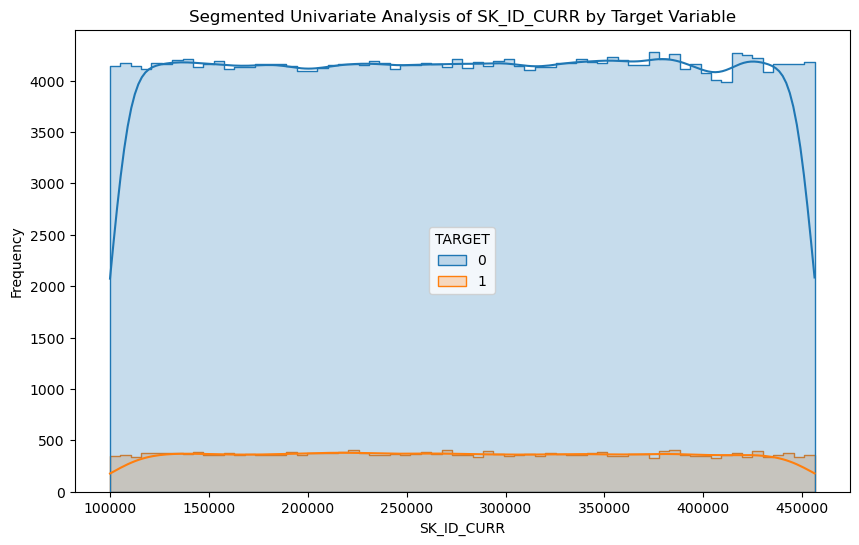

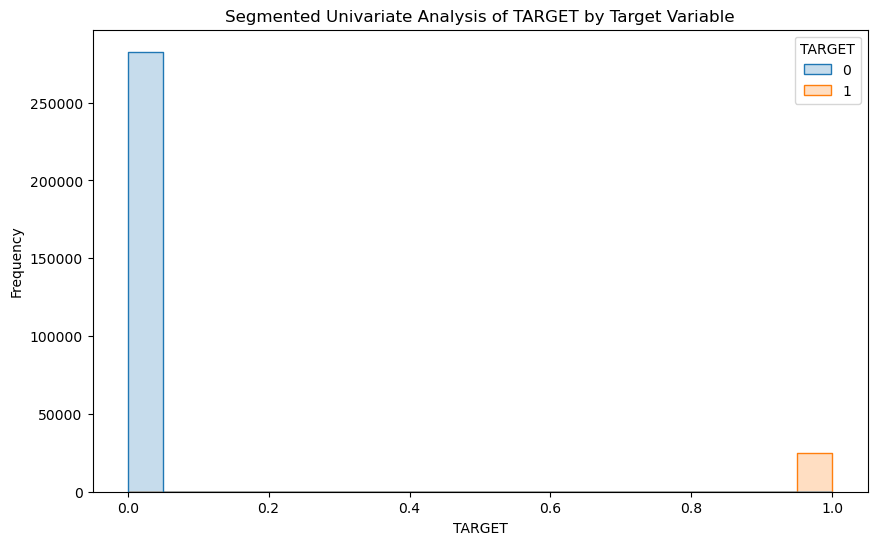

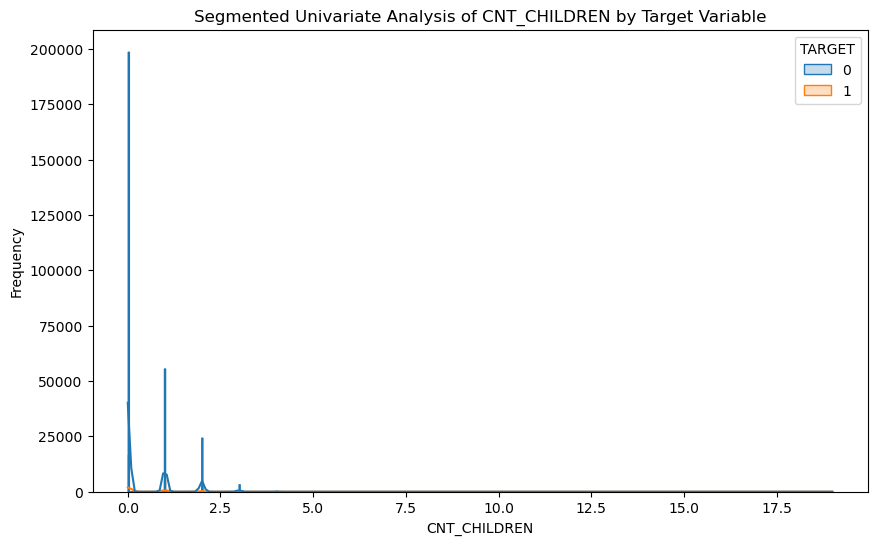

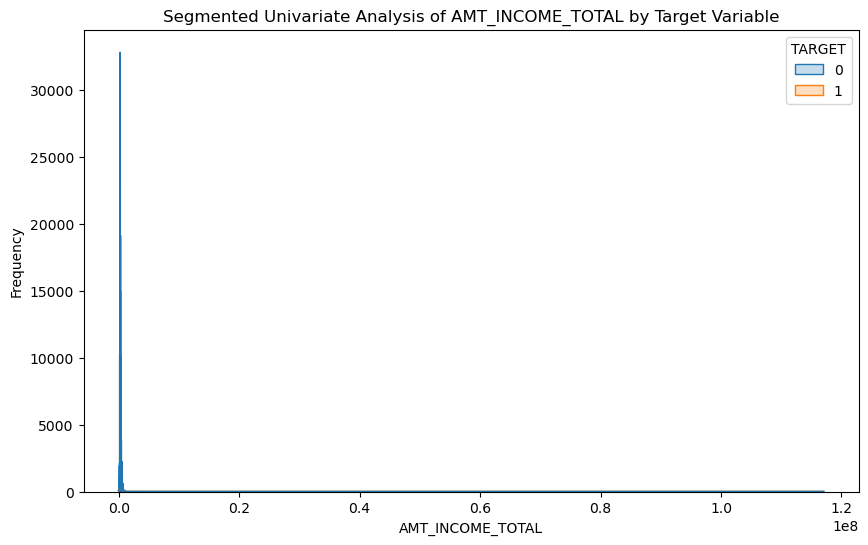

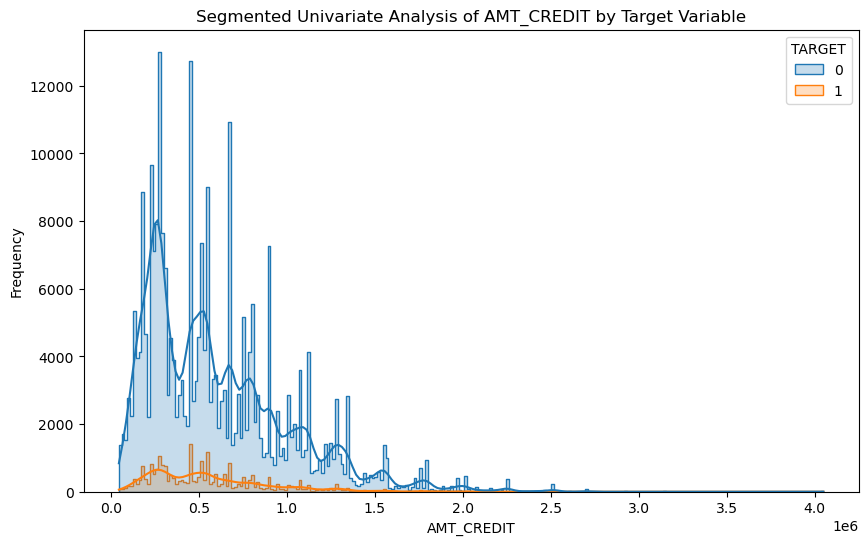

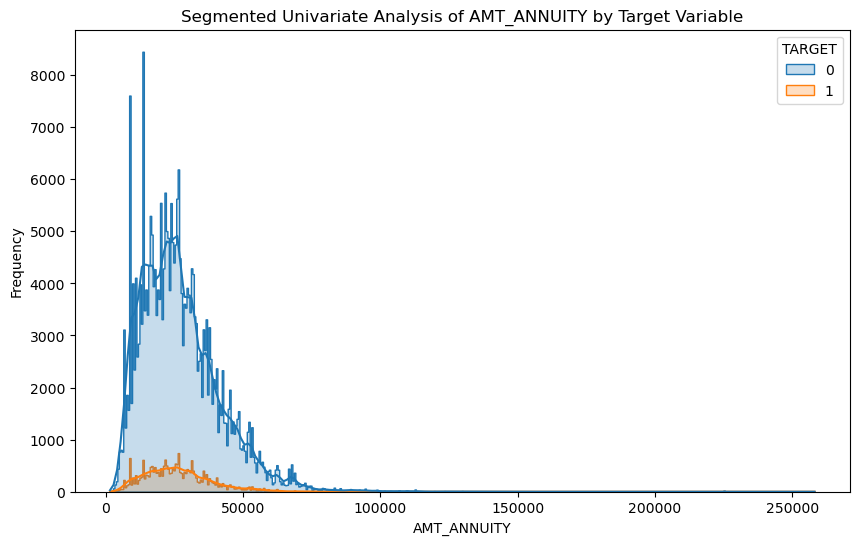

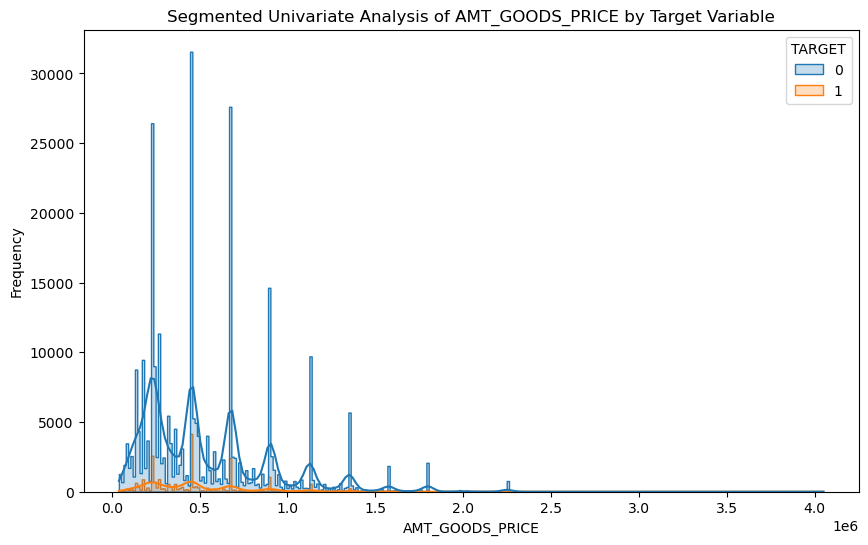

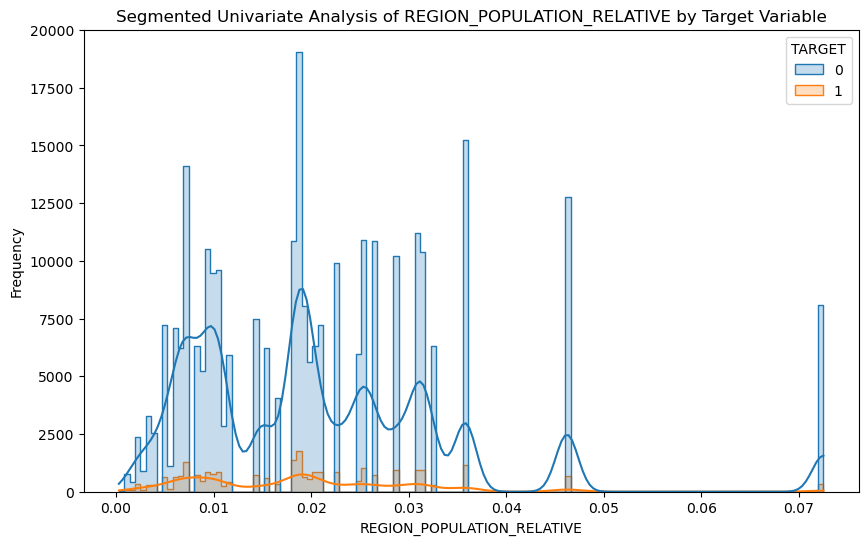

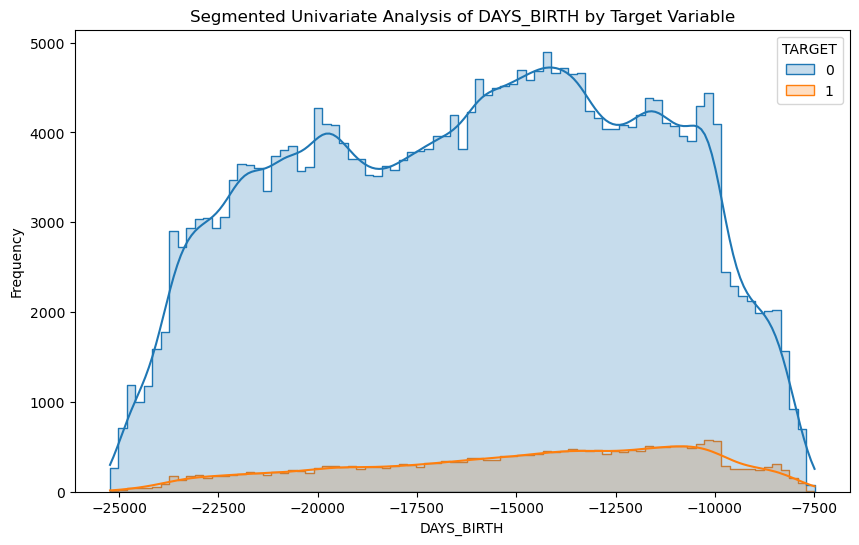

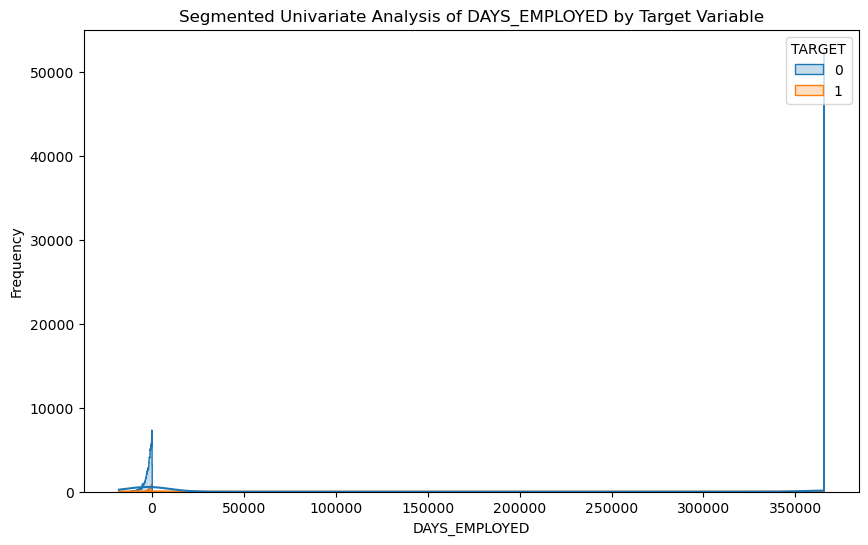

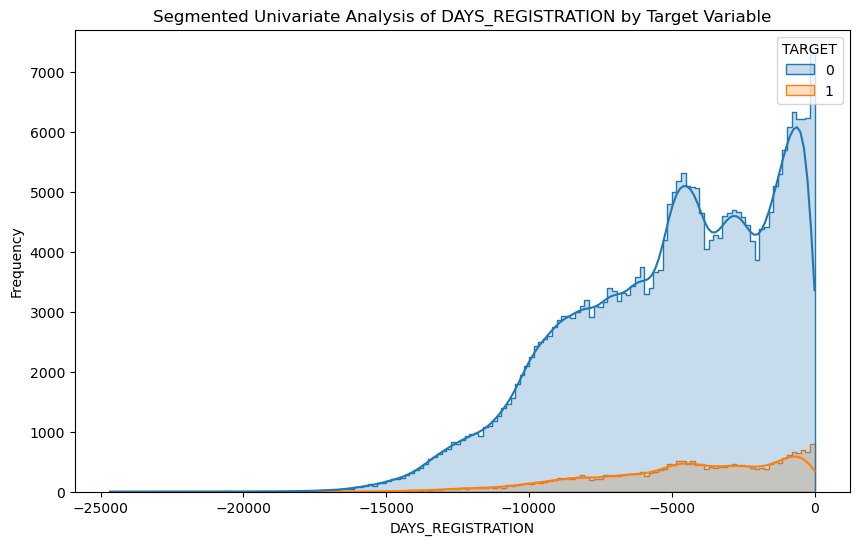

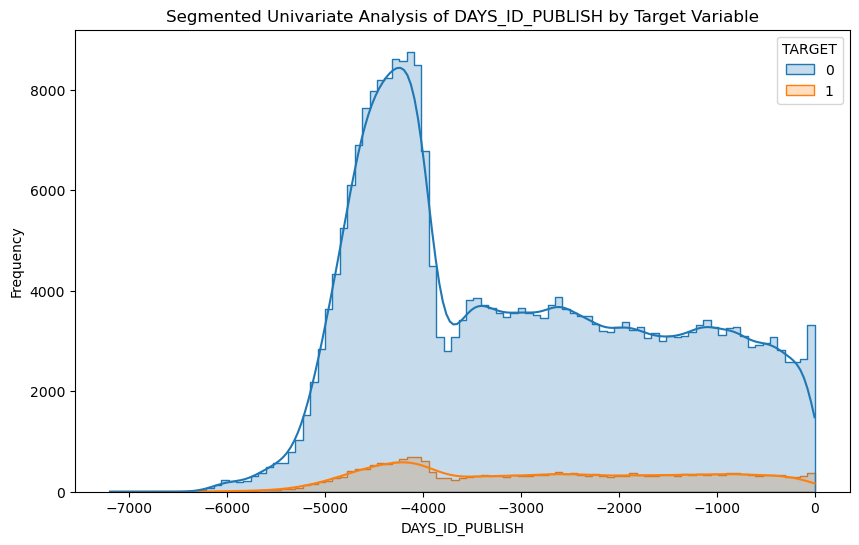

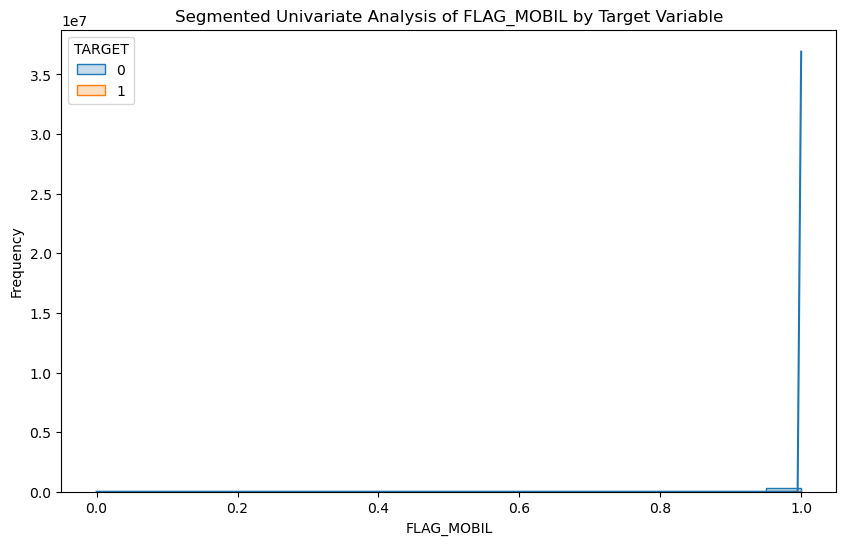

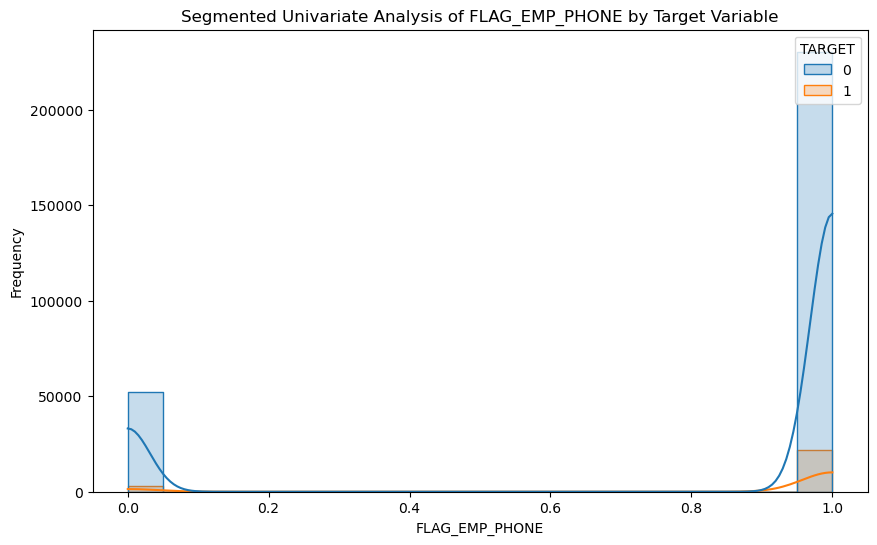

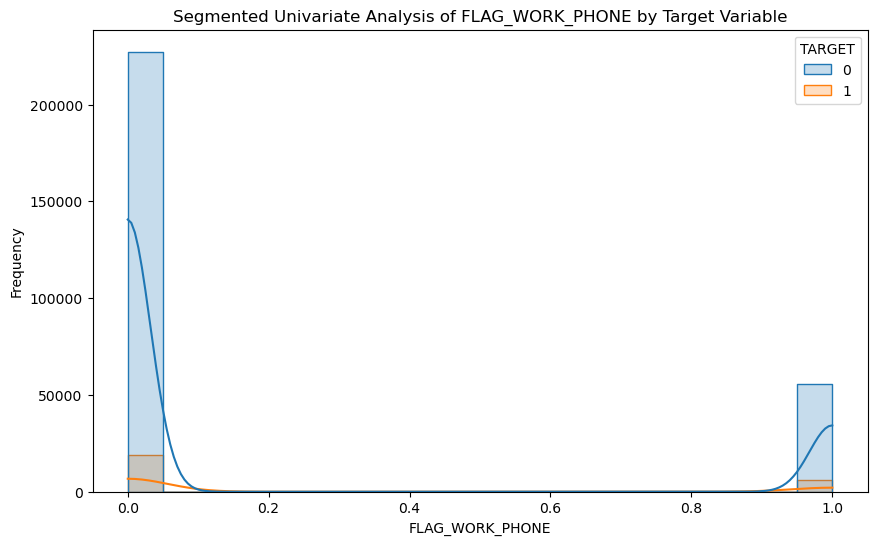

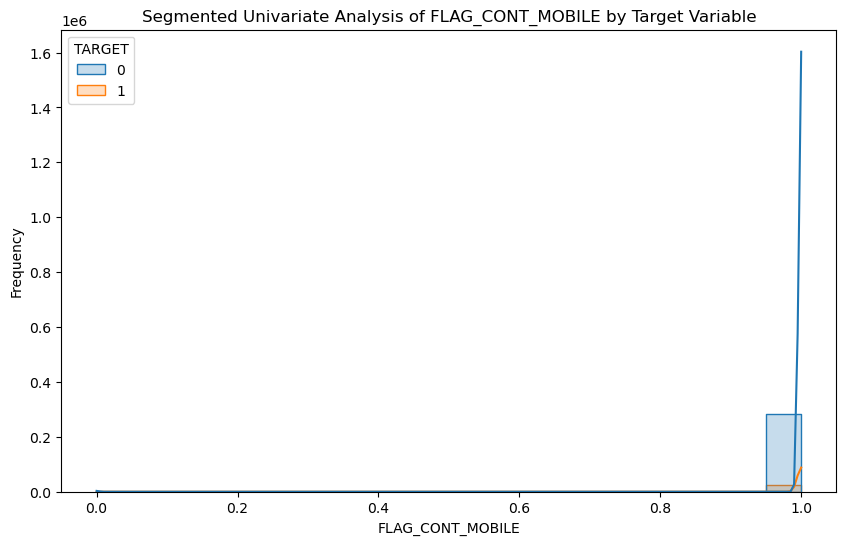

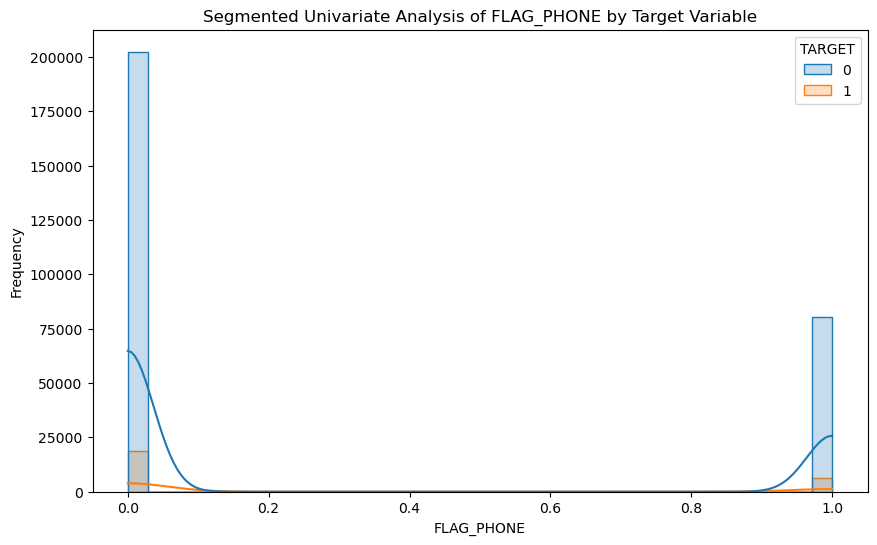

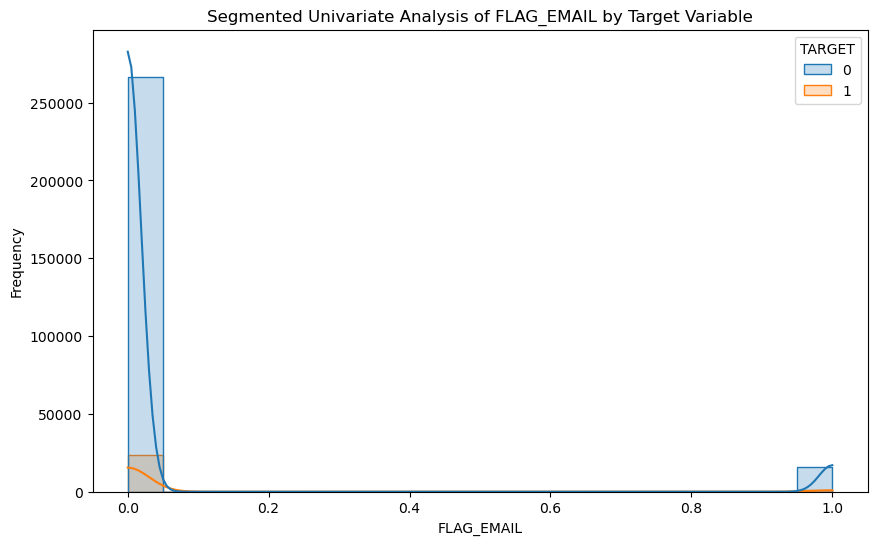

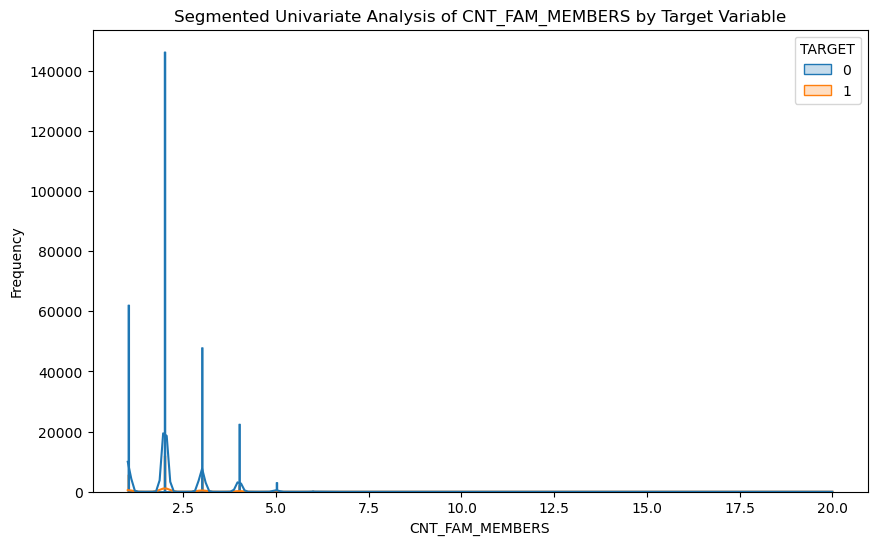

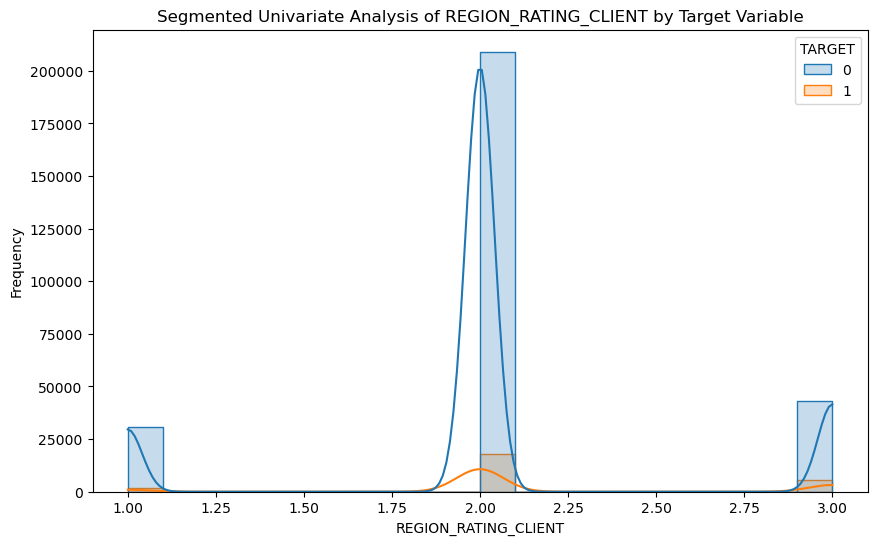

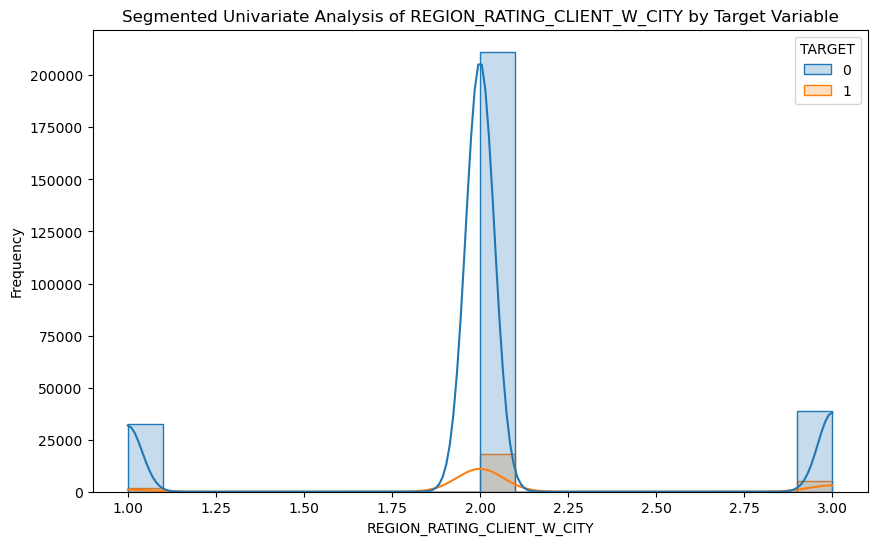

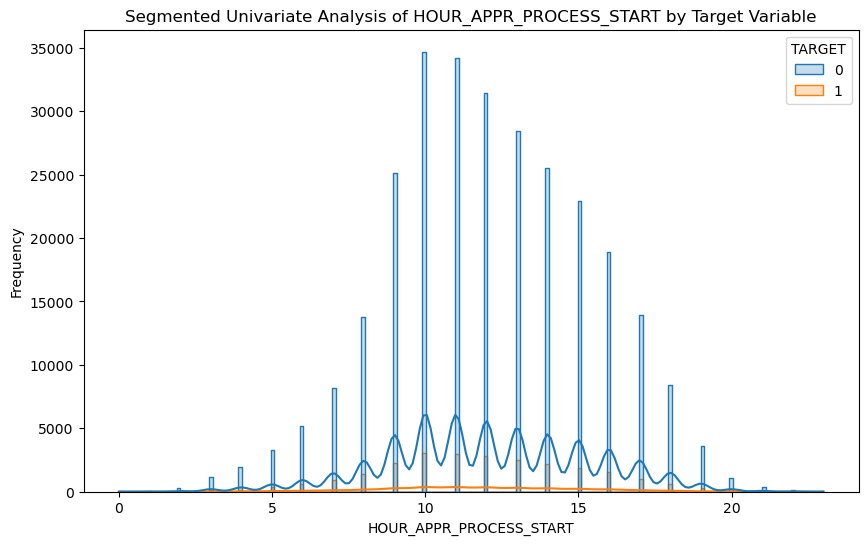

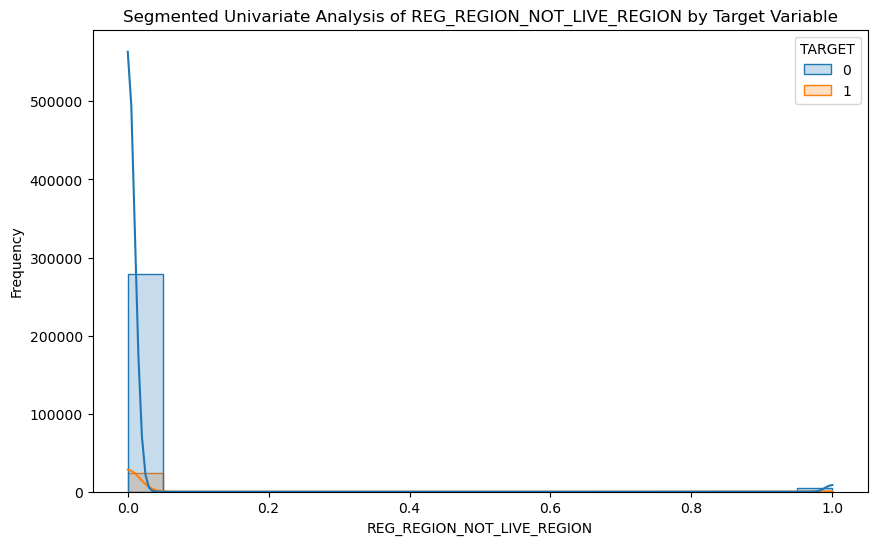

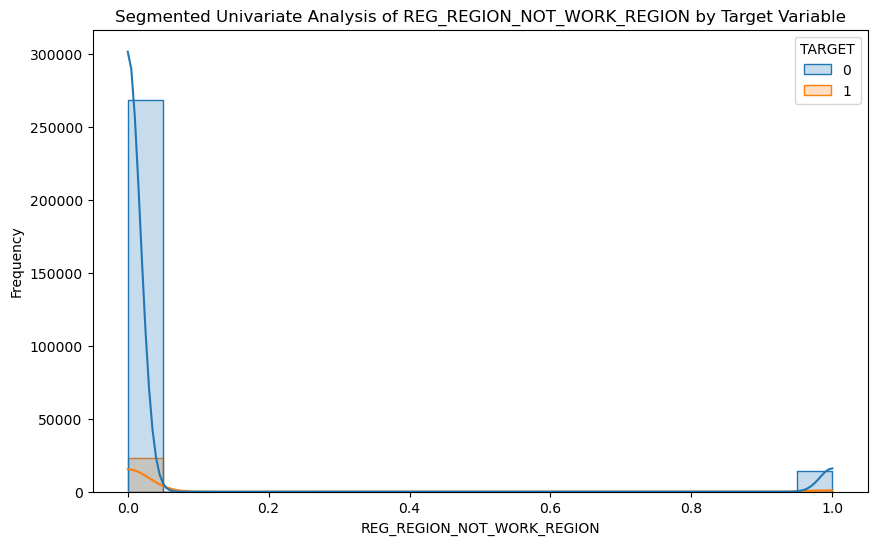

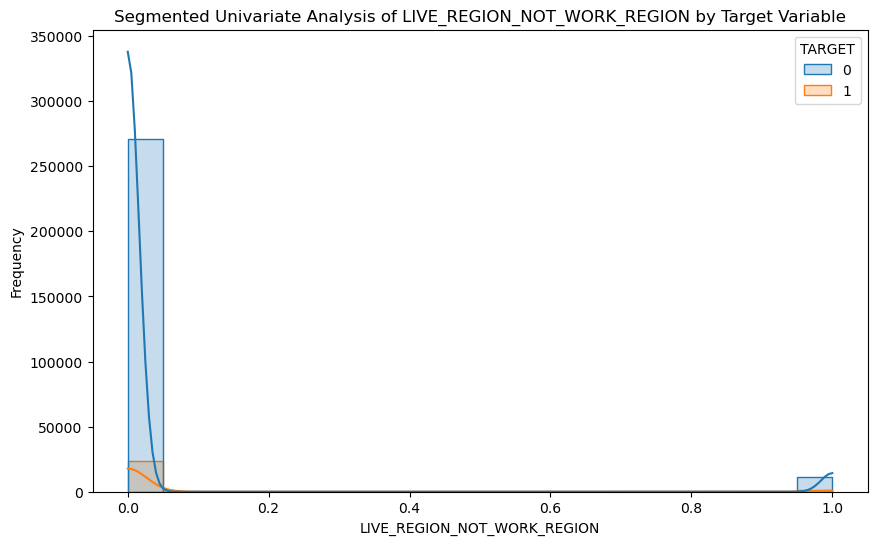

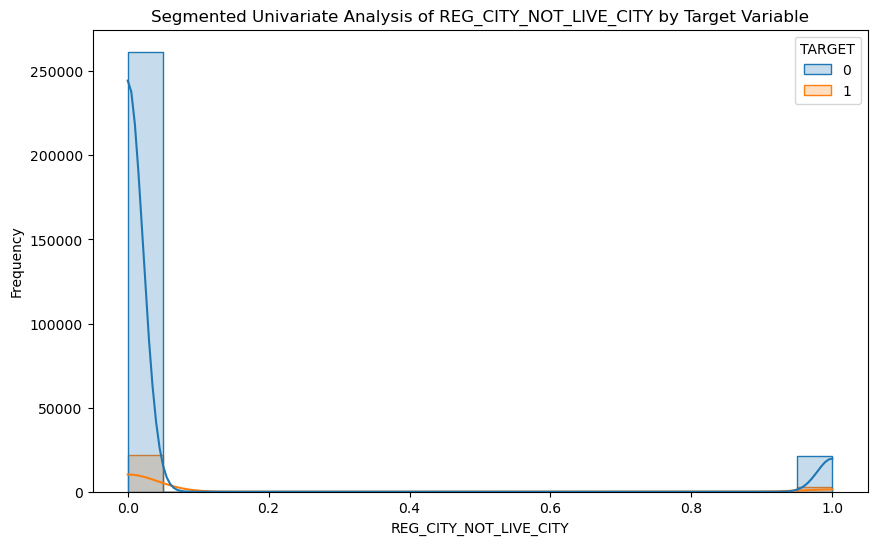

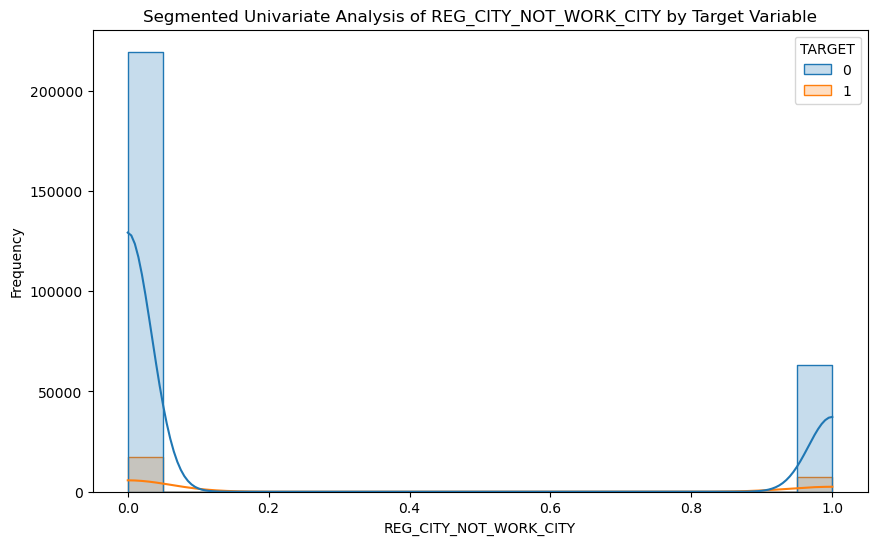

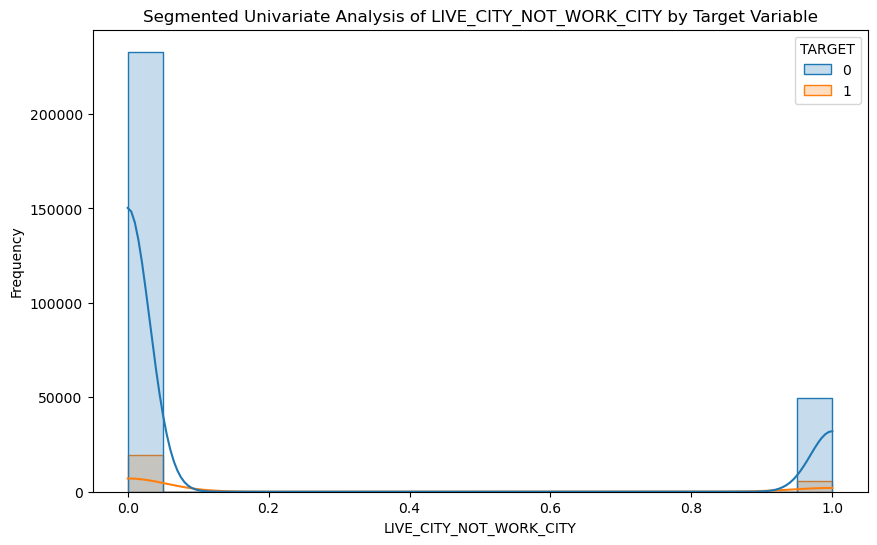

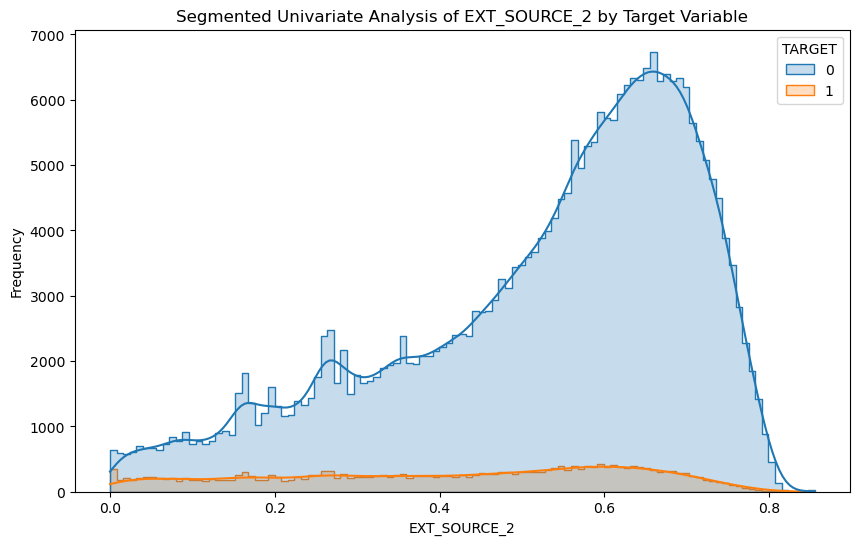

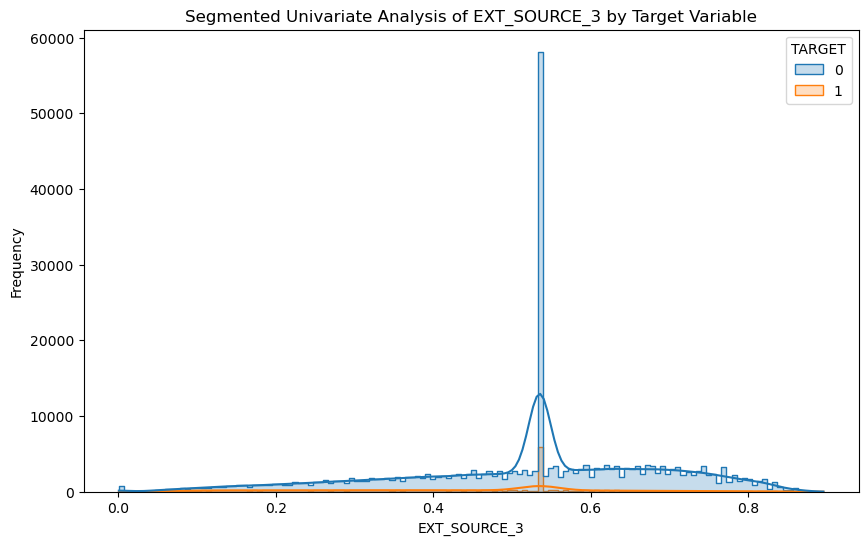

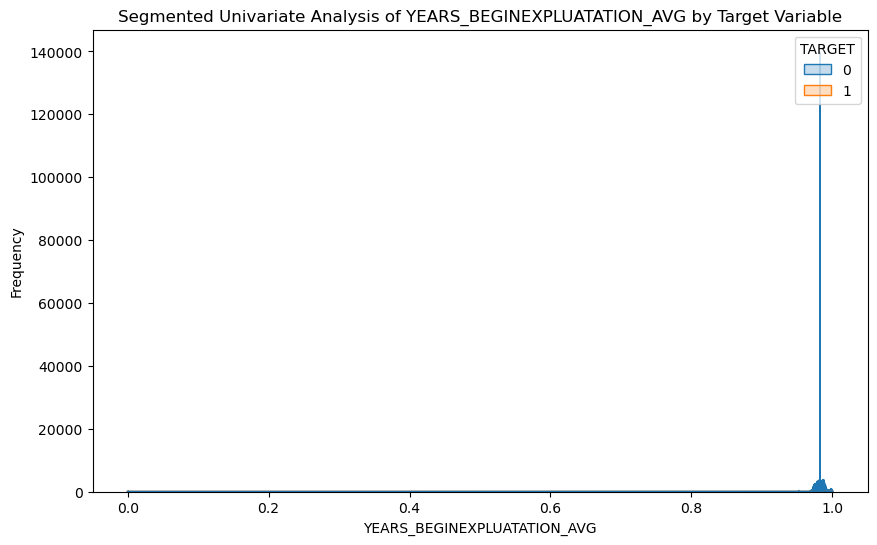

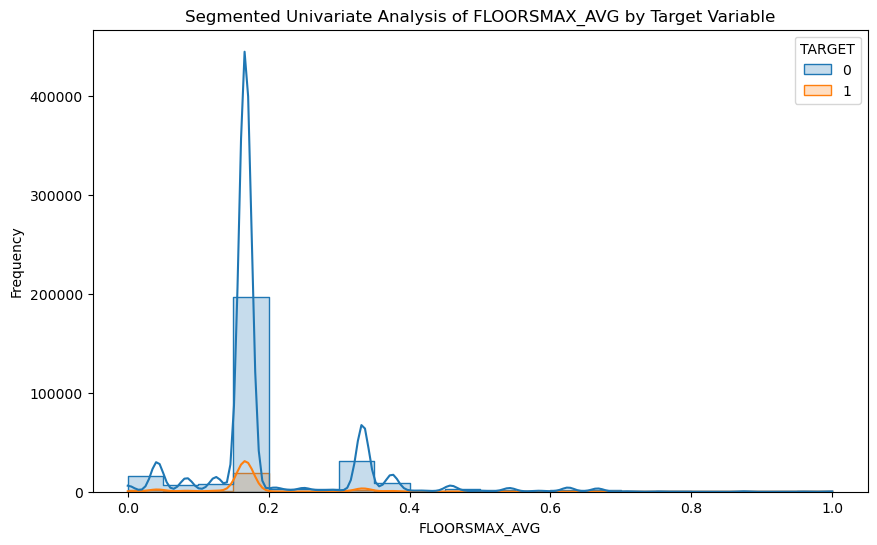

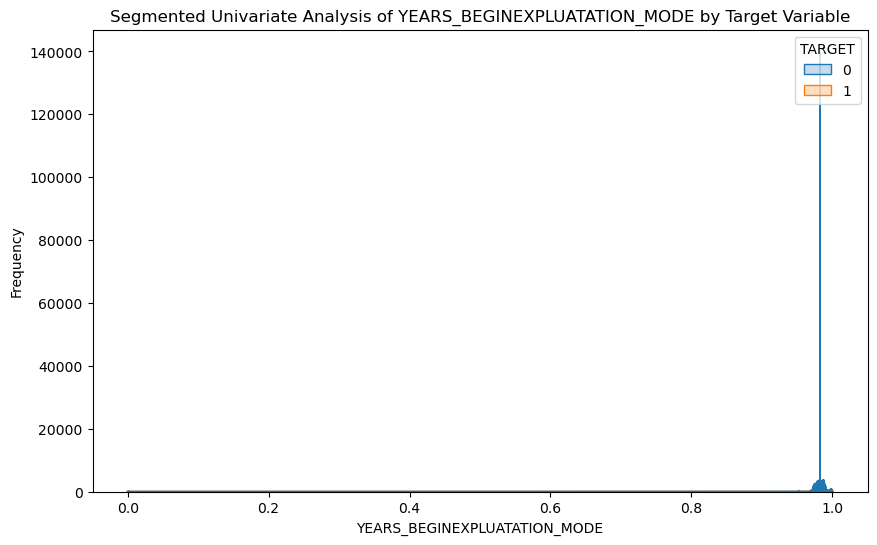

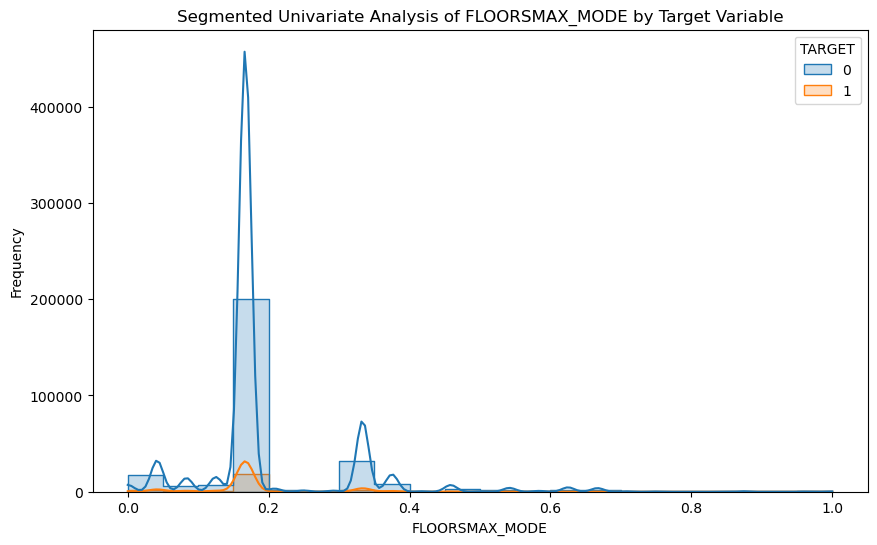

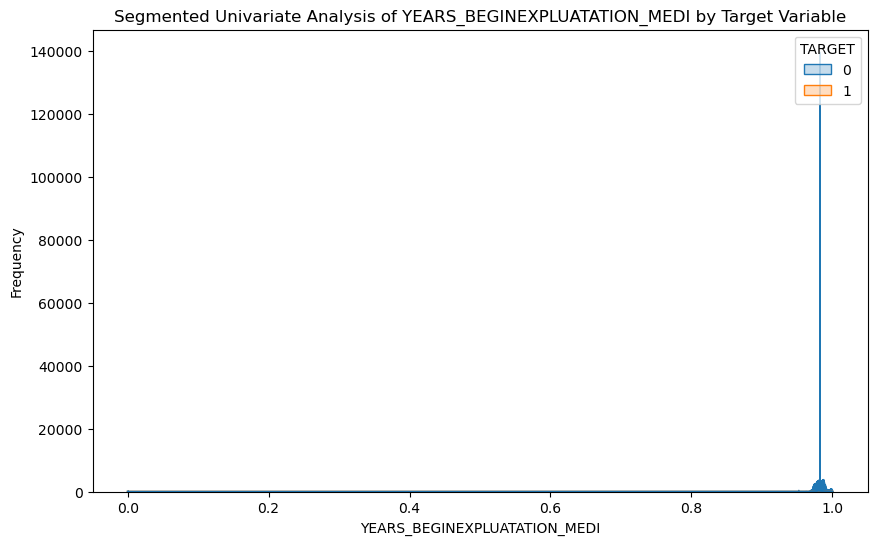

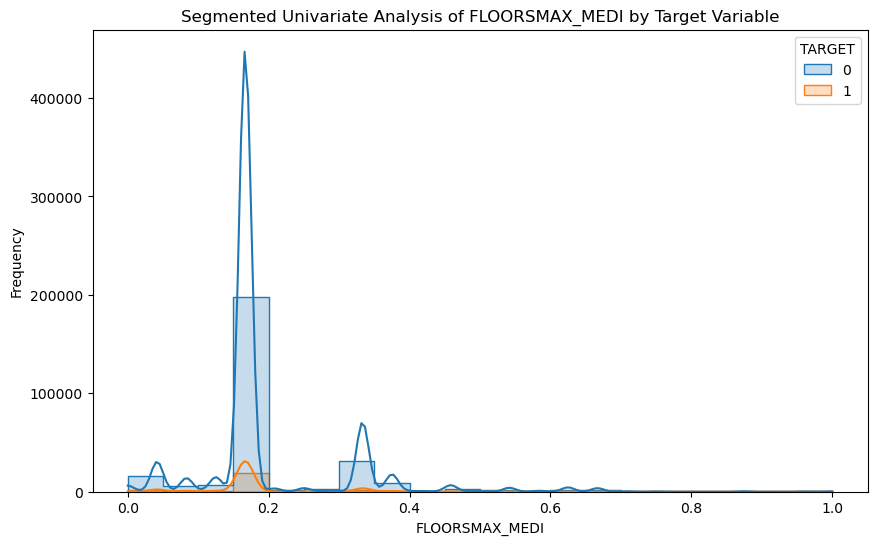

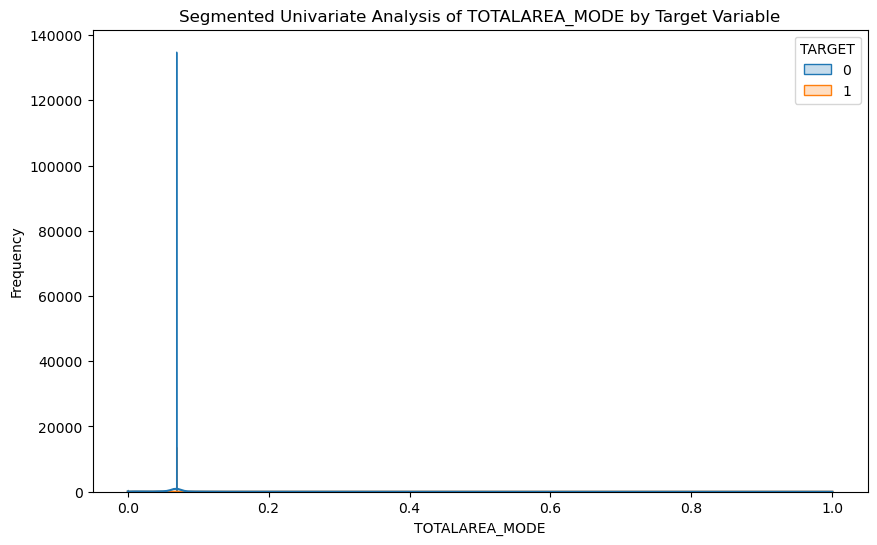

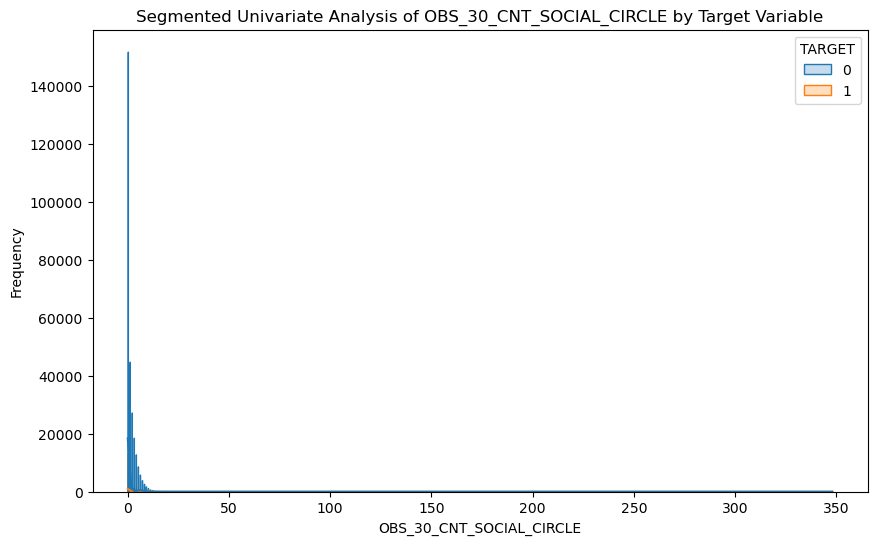

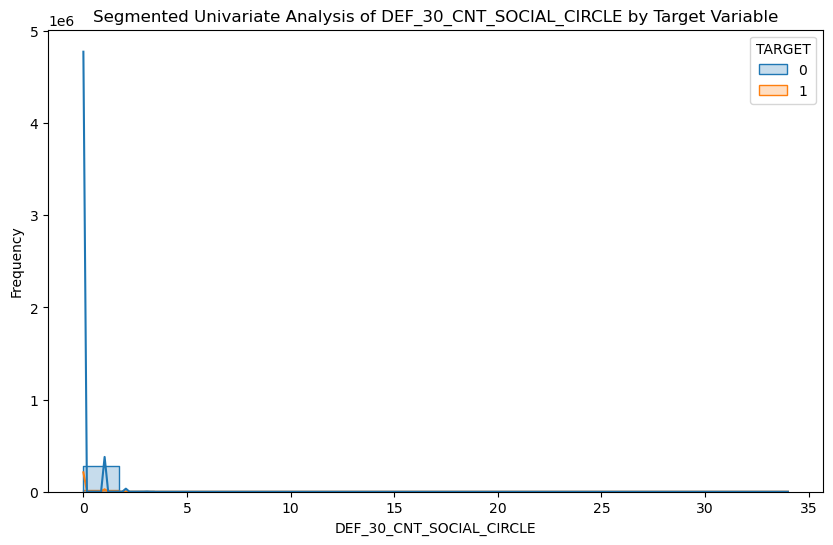

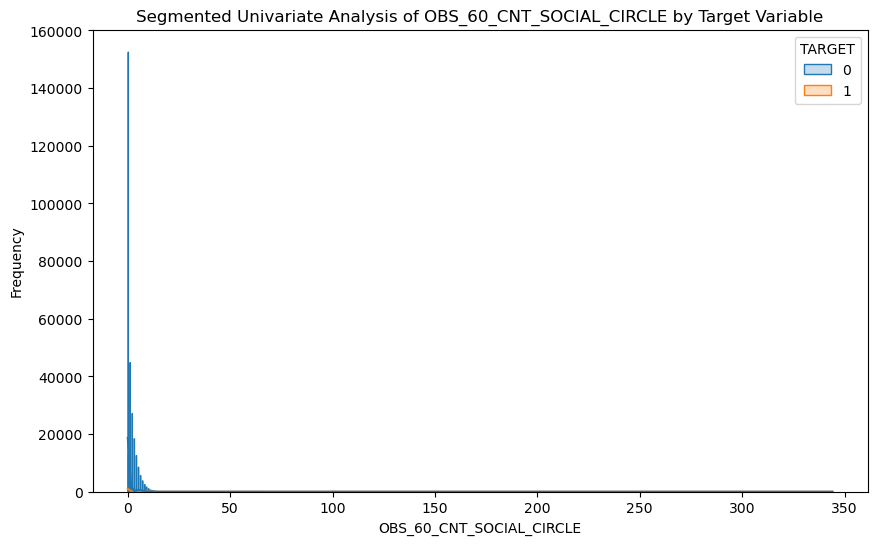

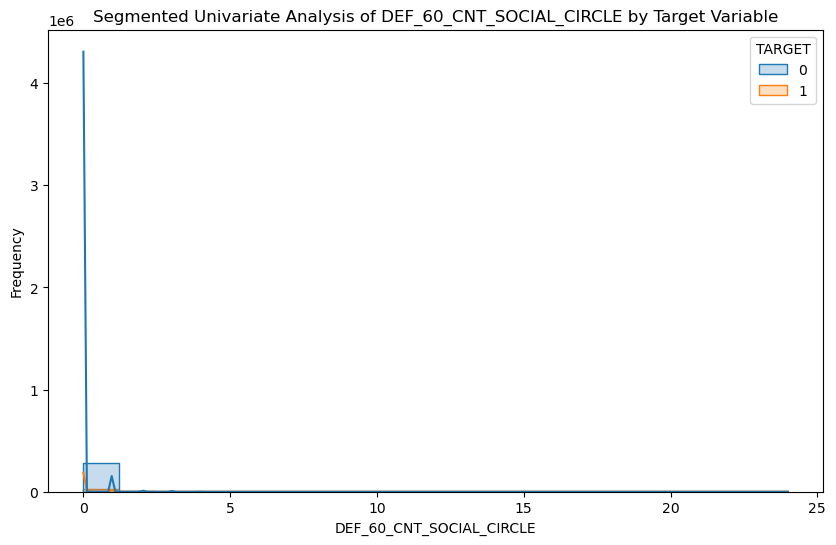

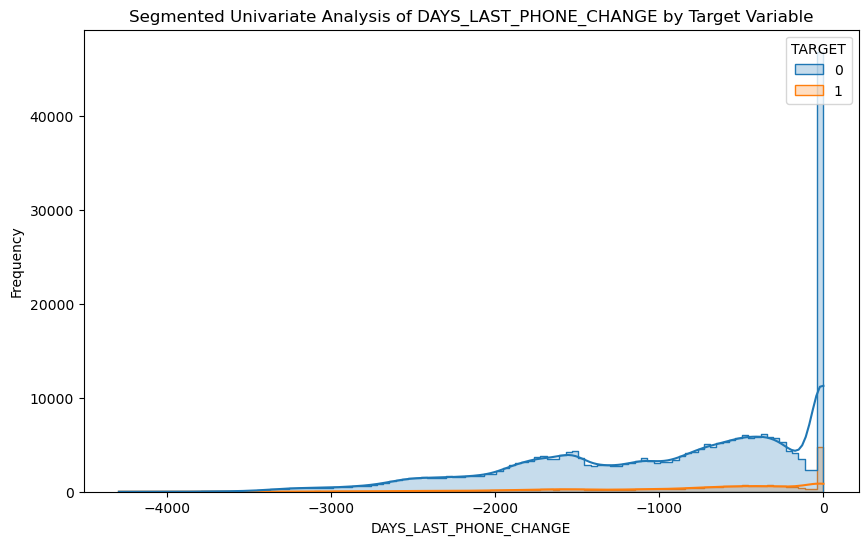

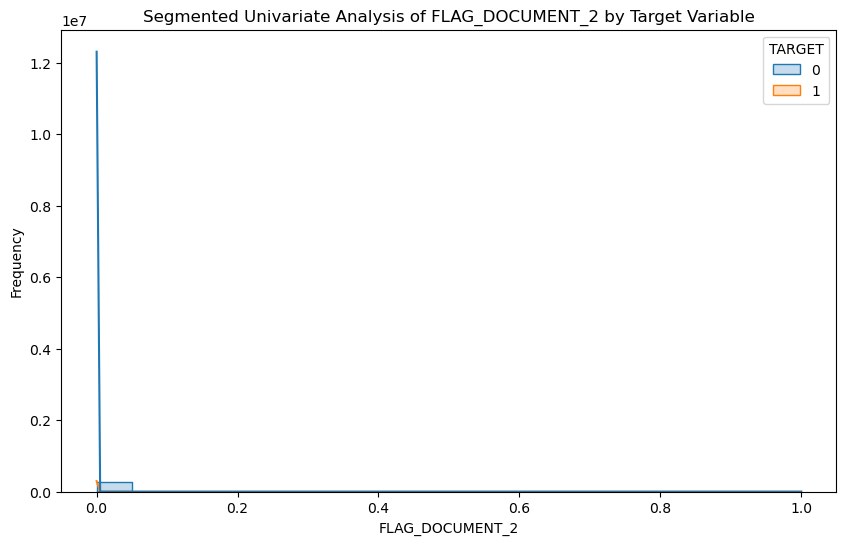

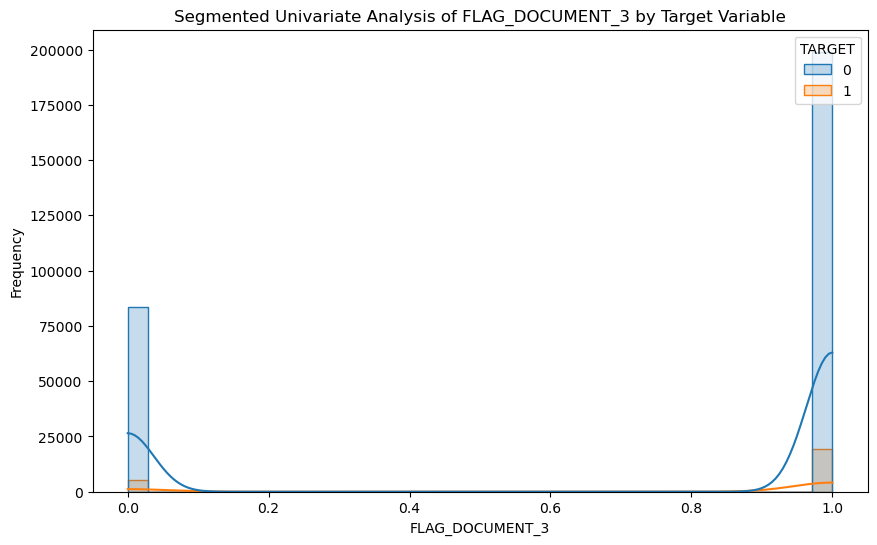

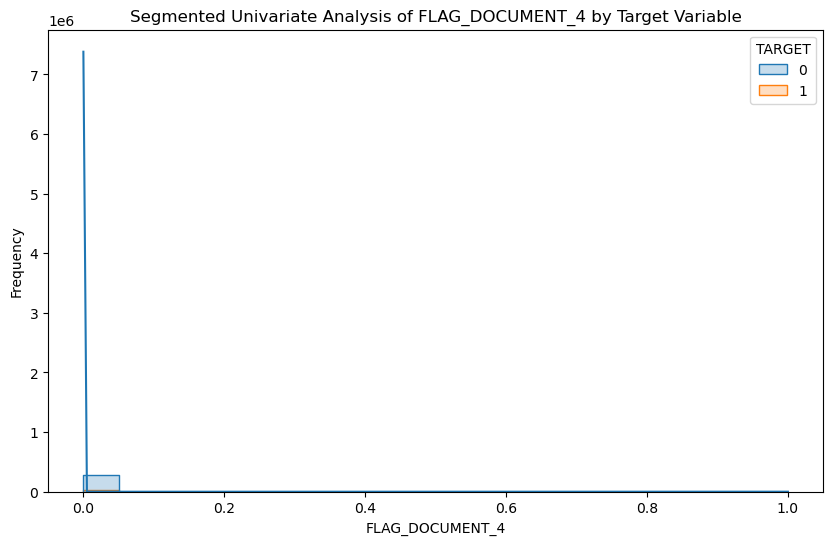

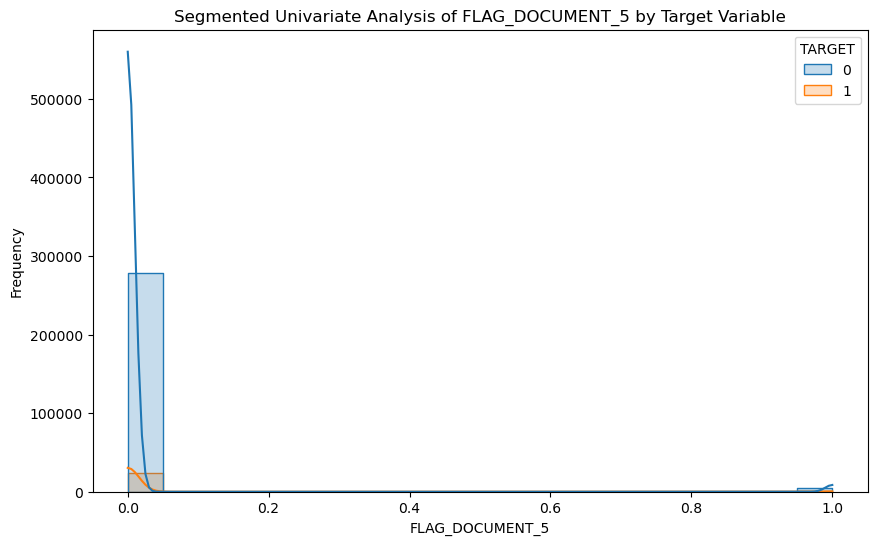

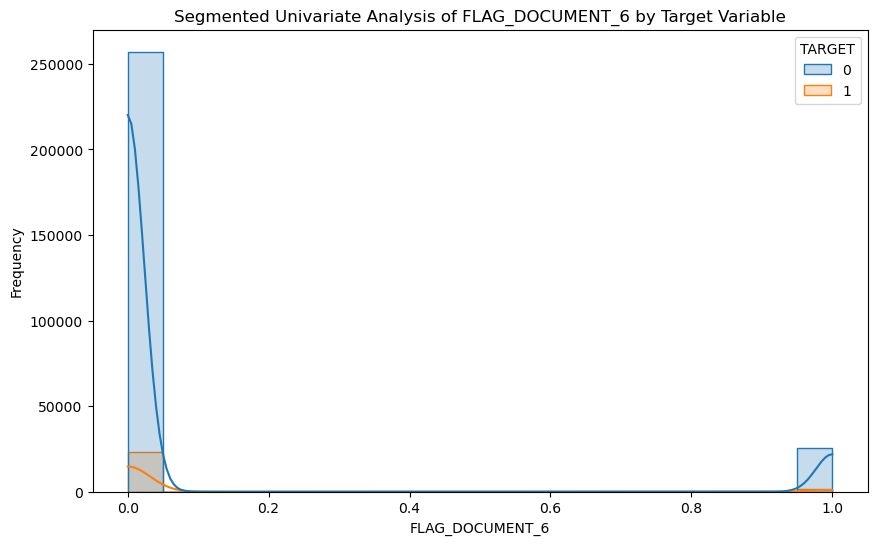

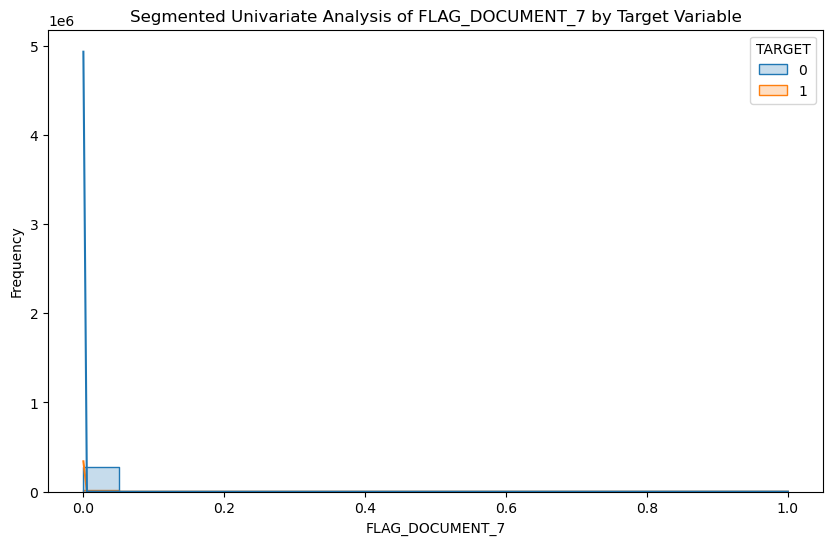

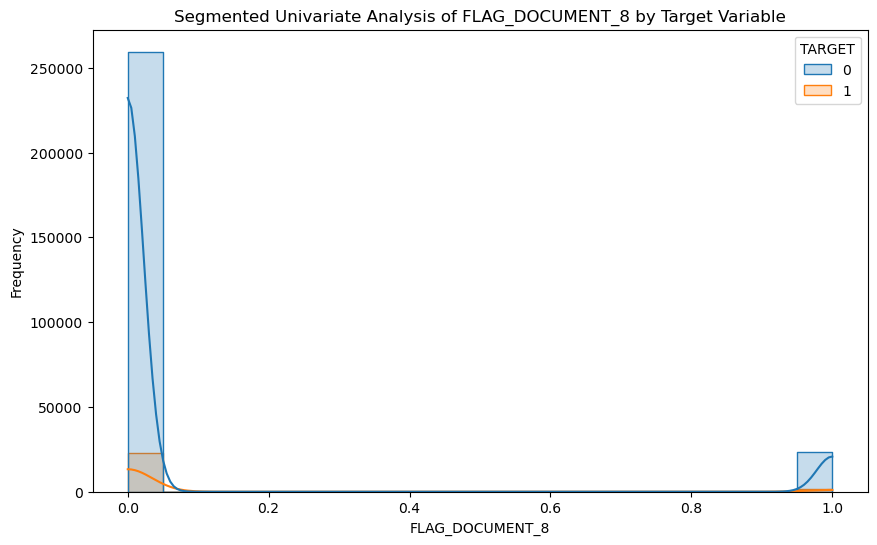

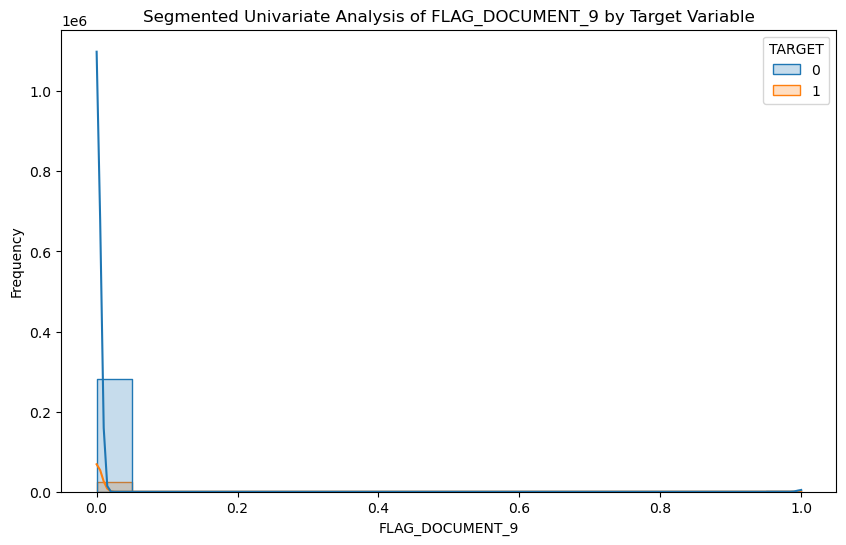

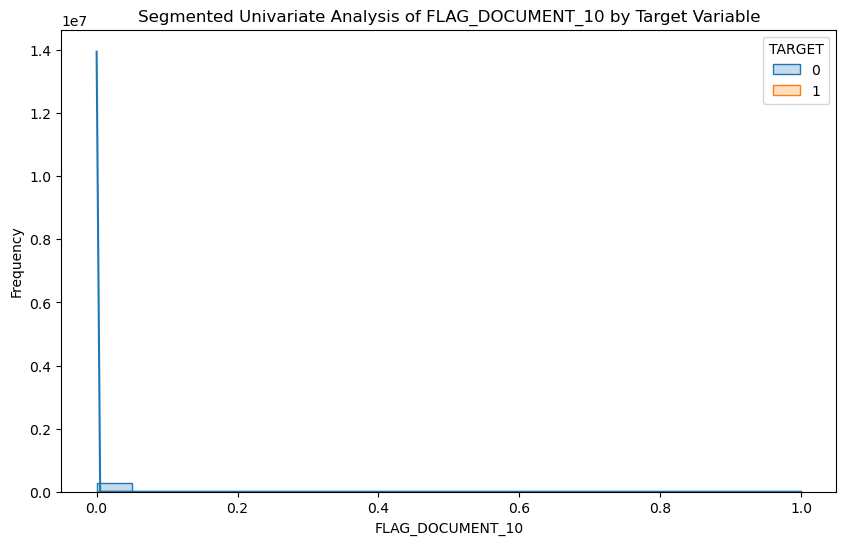

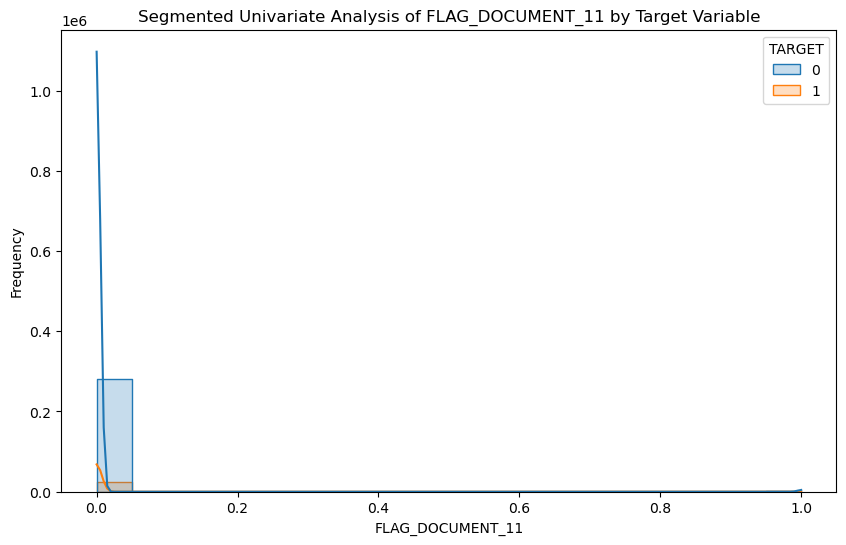

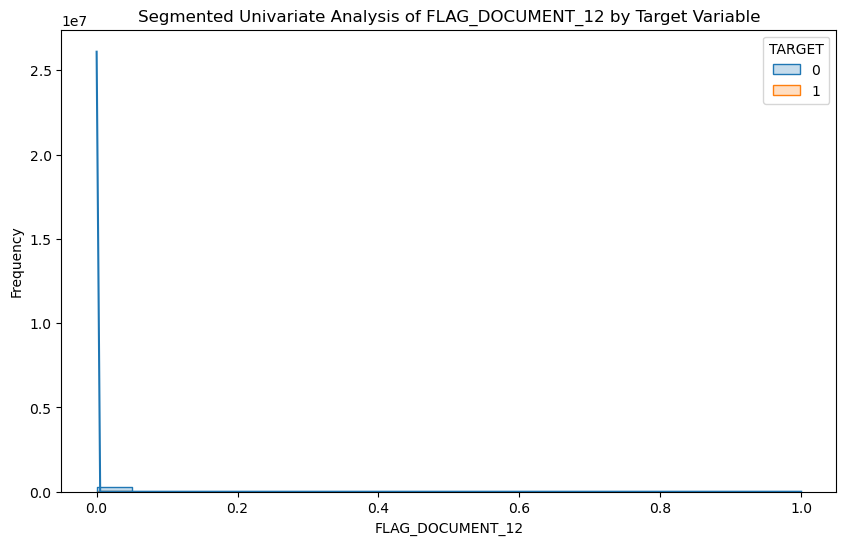

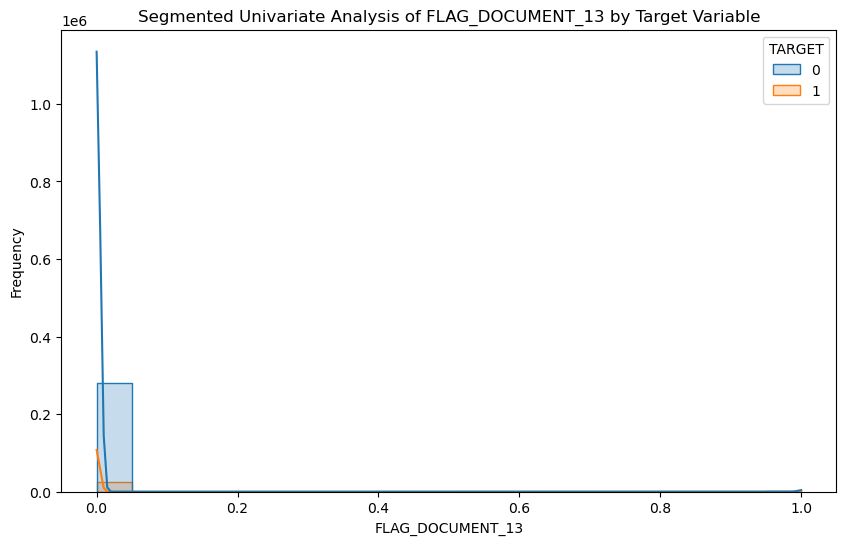

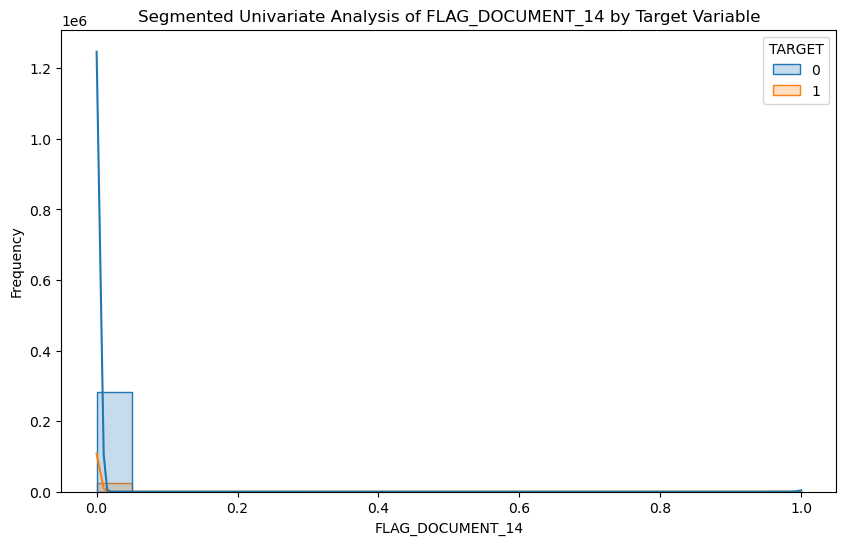

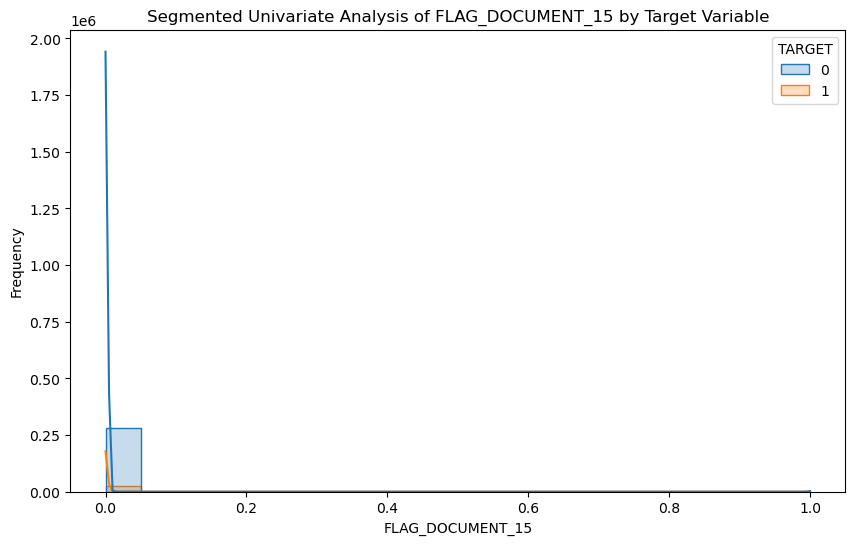

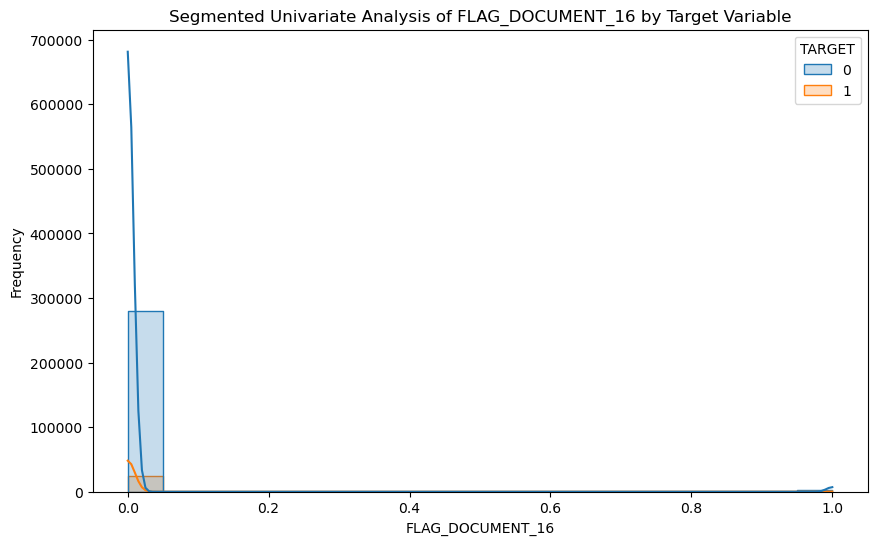

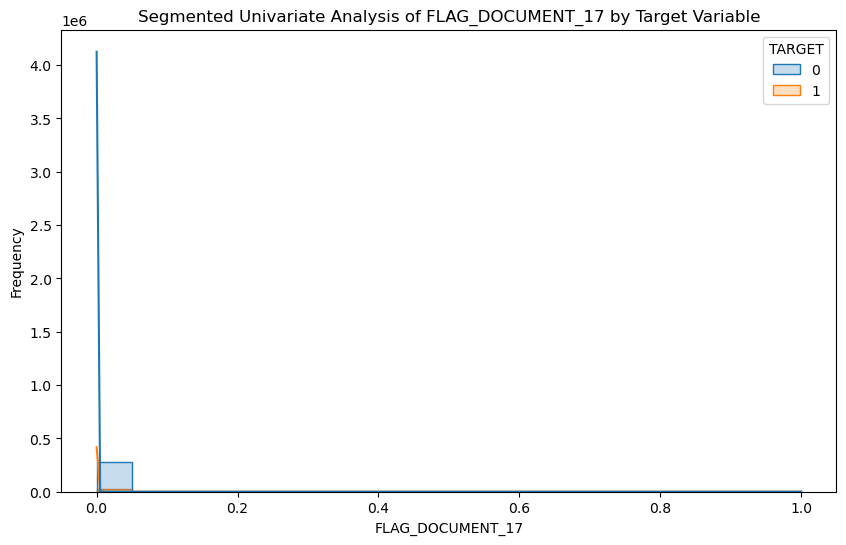

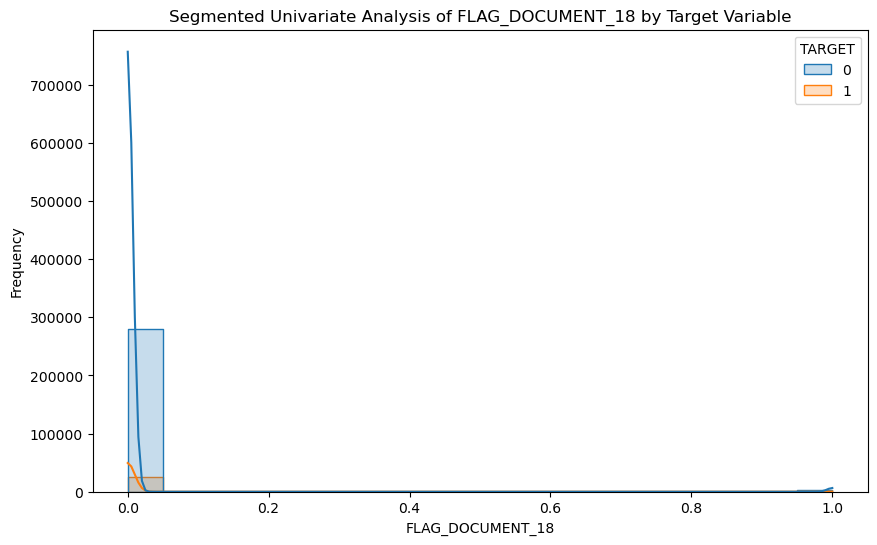

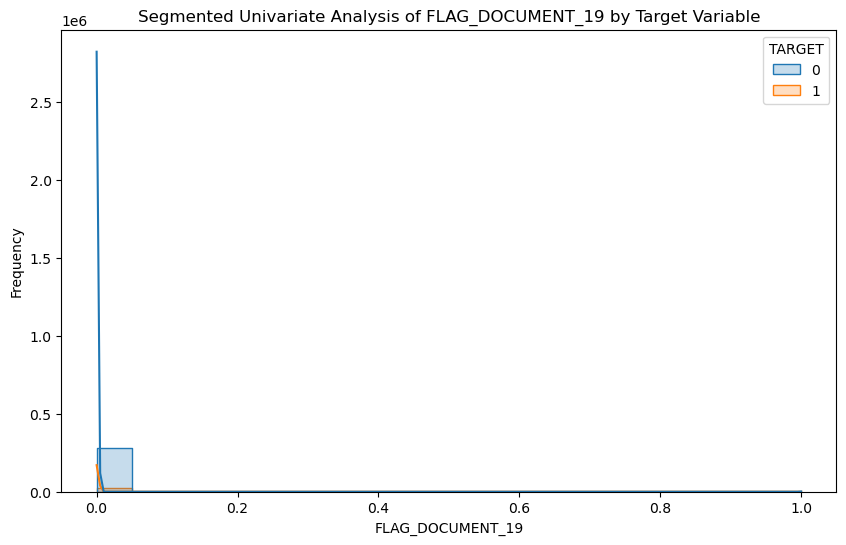

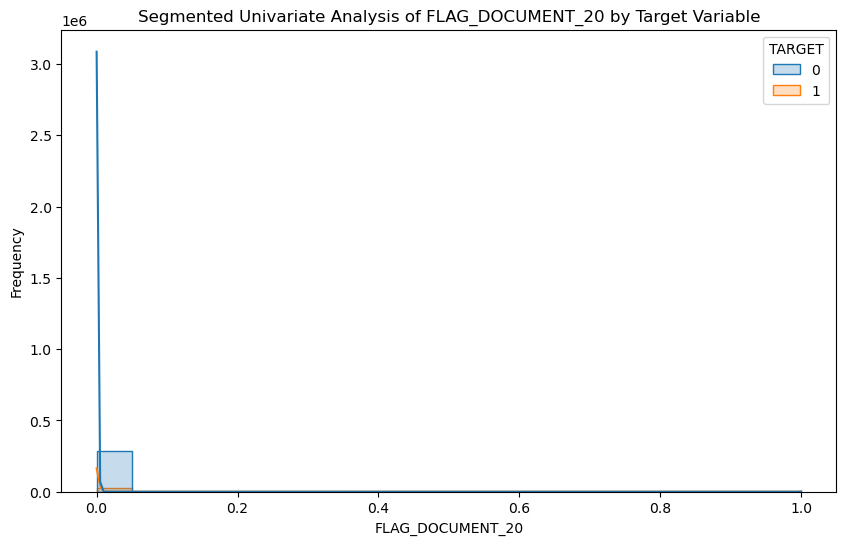

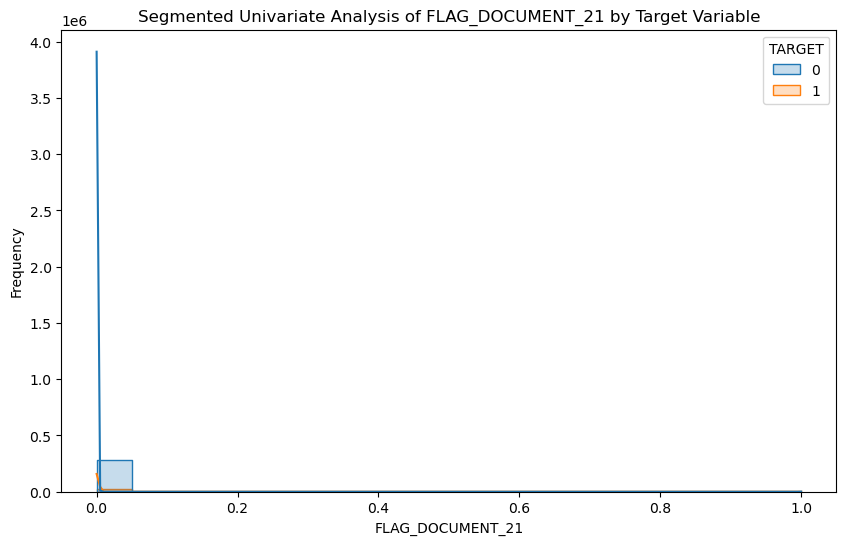

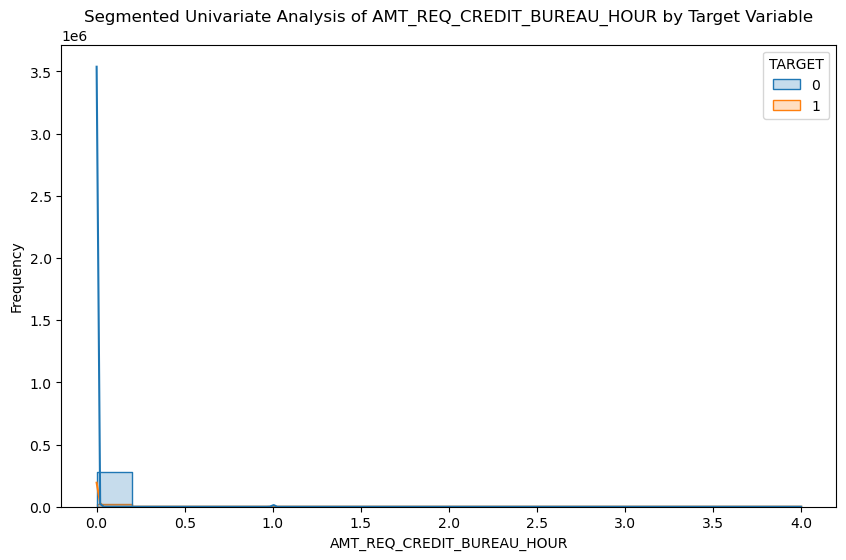

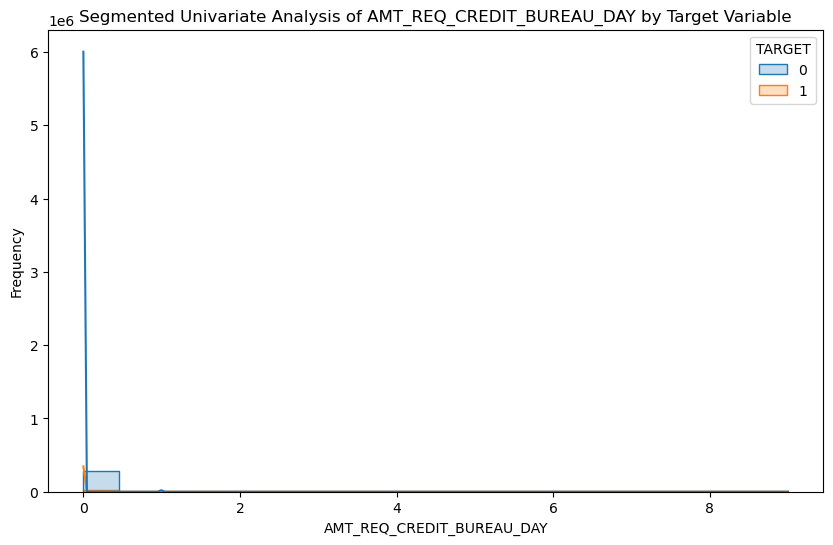

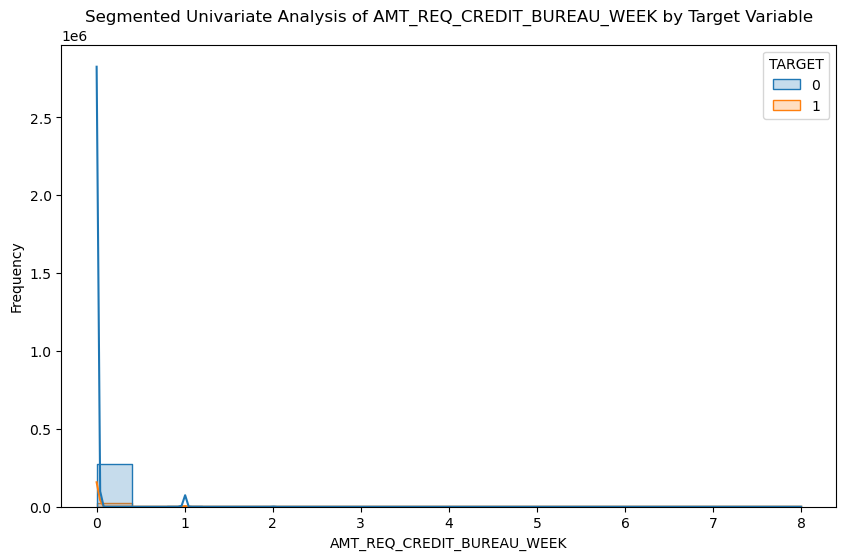

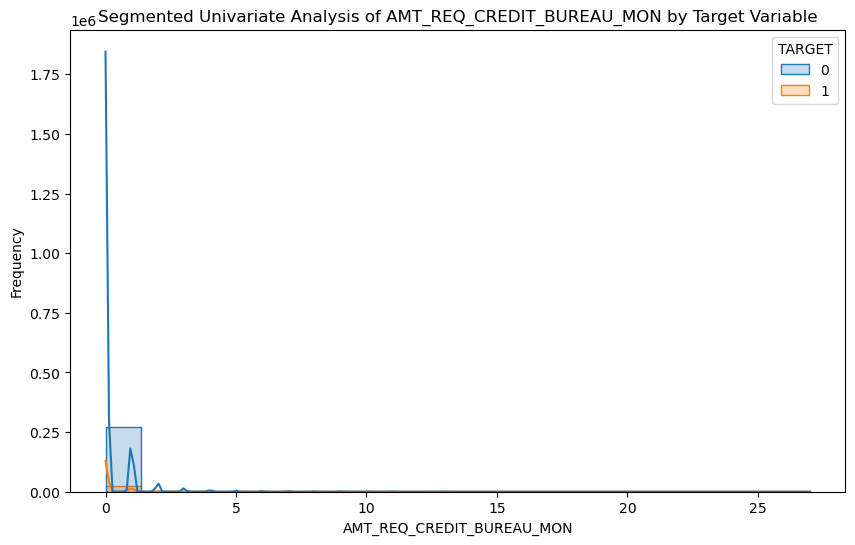

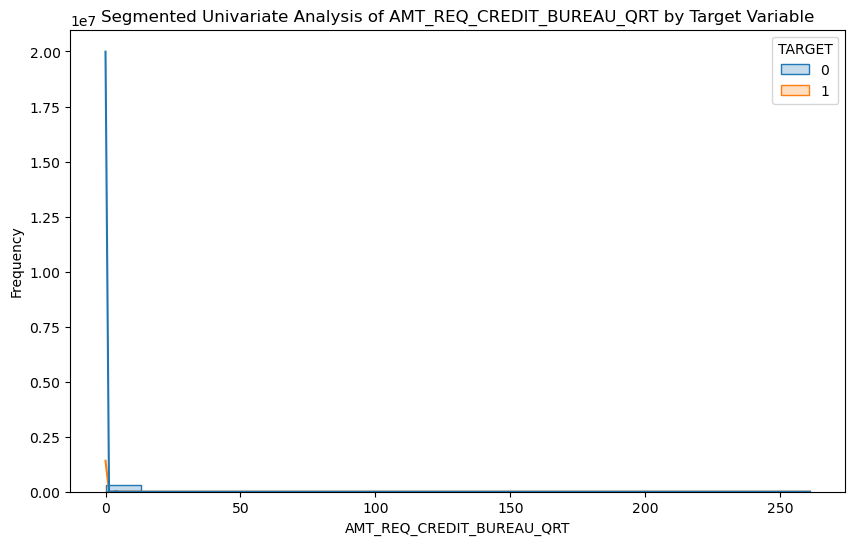

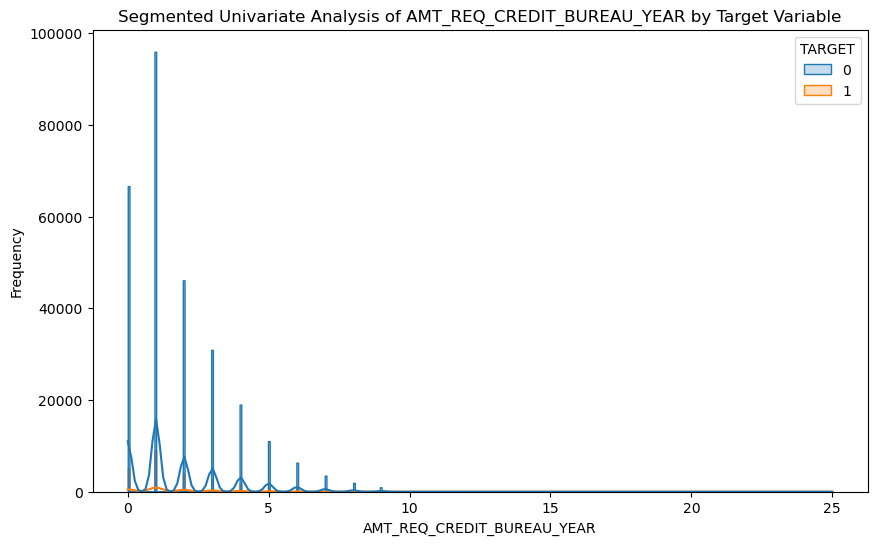

In [32]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue='TARGET', kde=True, element='step')
    plt.title(f'Segmented Univariate Analysis of {column} by Target Variable')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


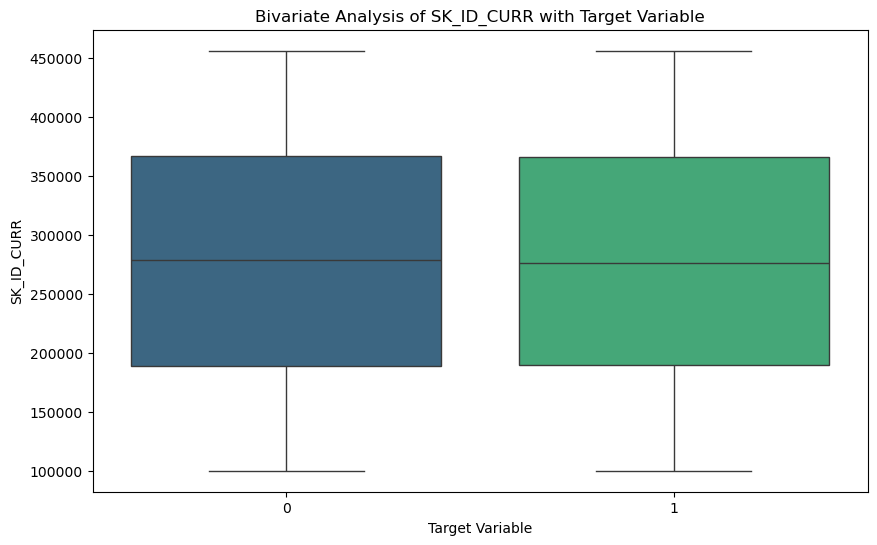

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


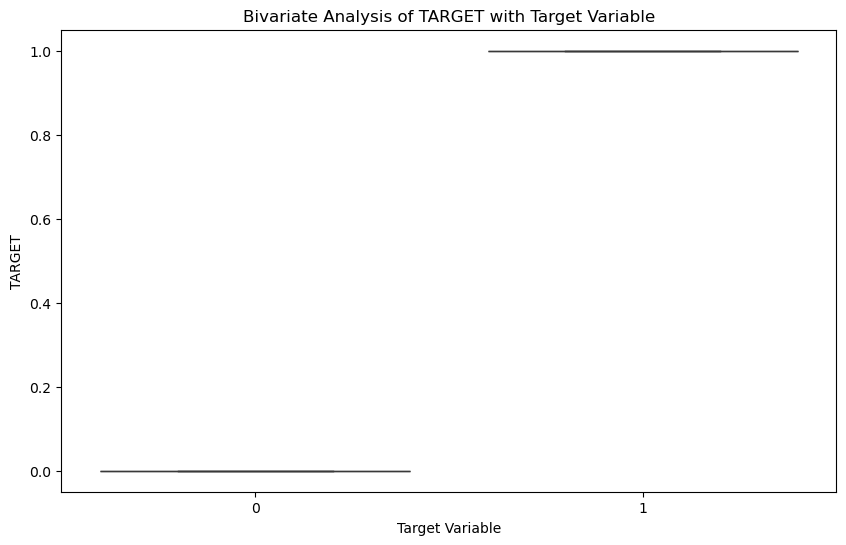

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


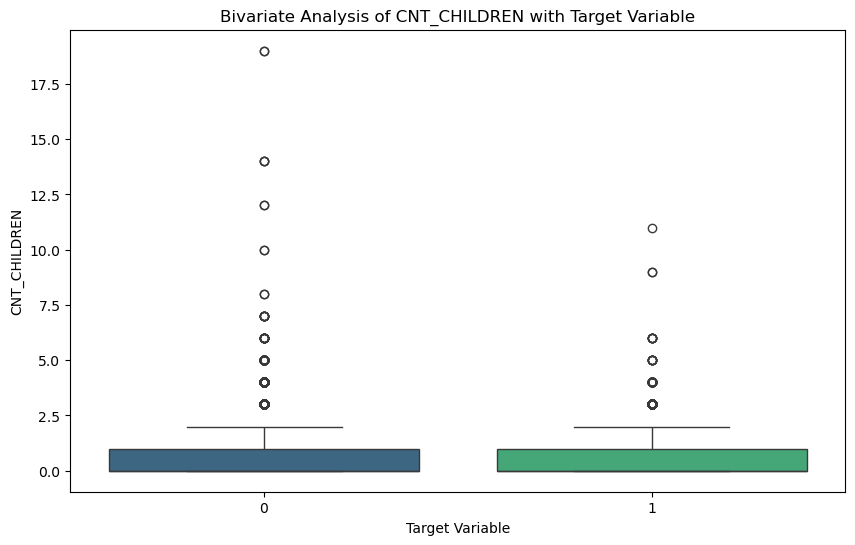

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


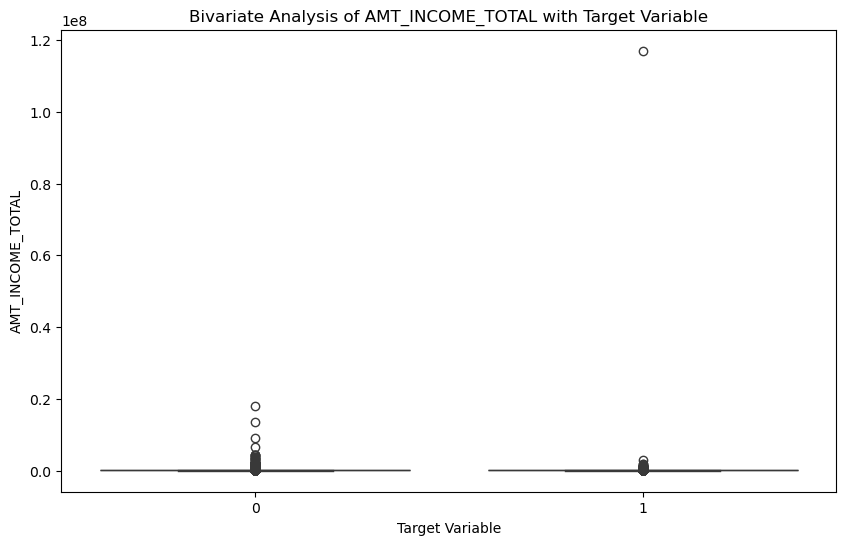

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


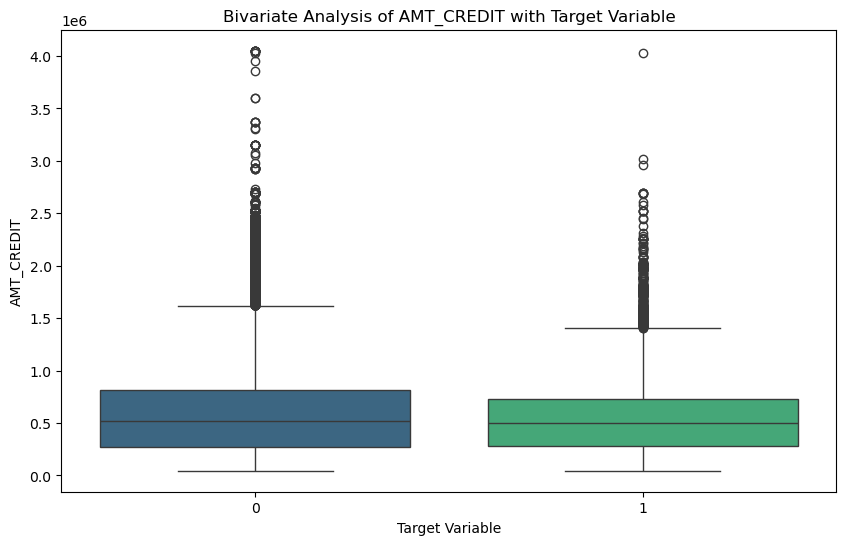

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


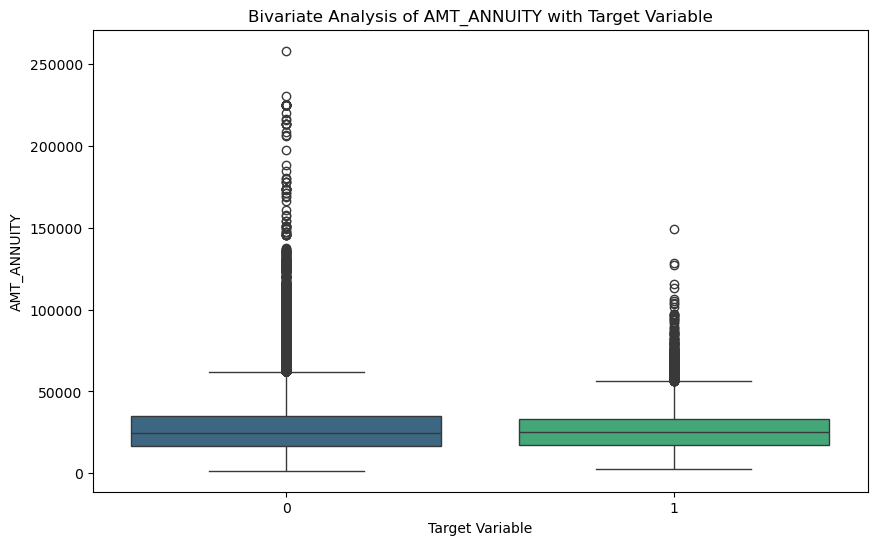

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


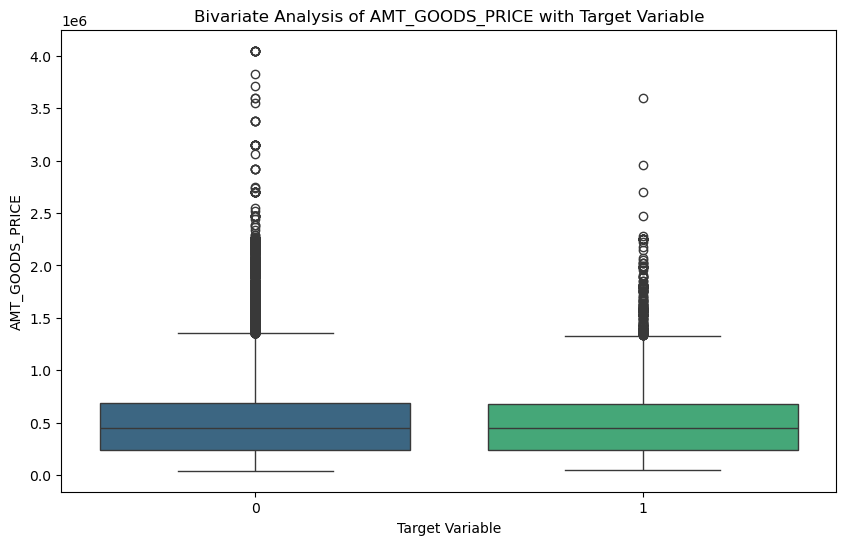

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


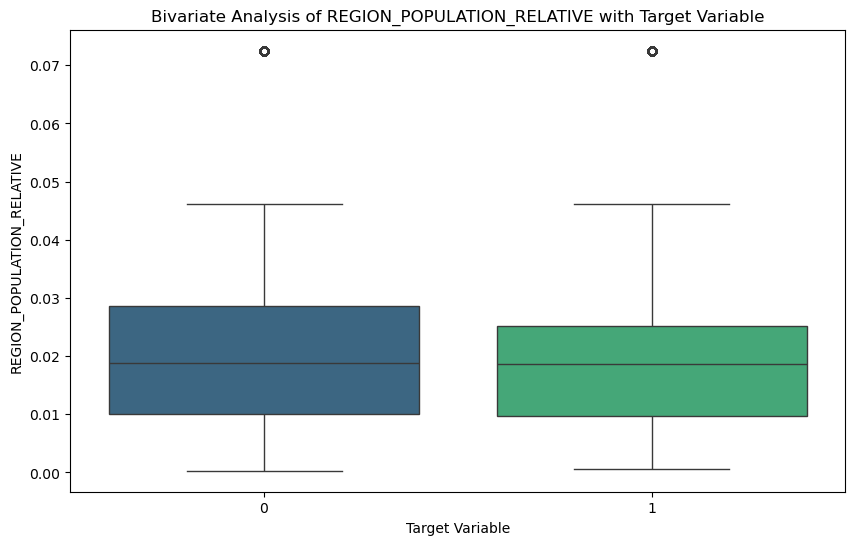

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


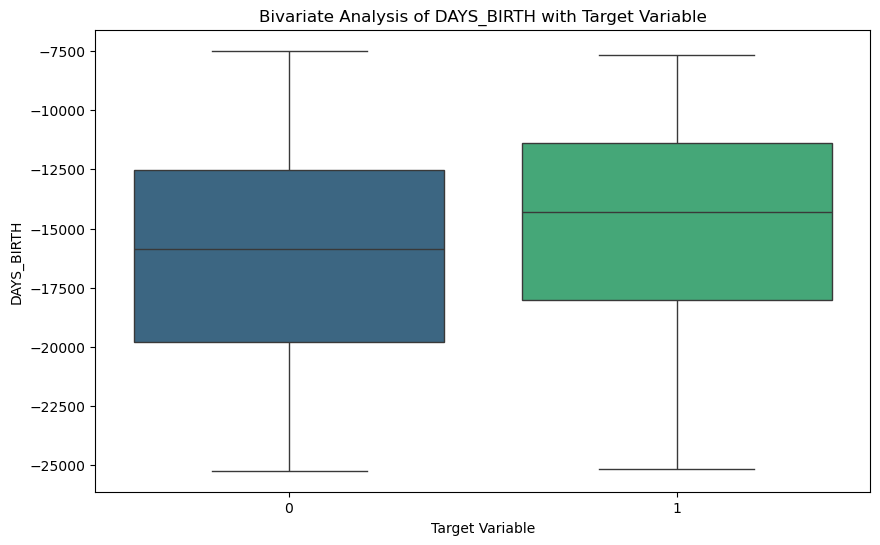

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


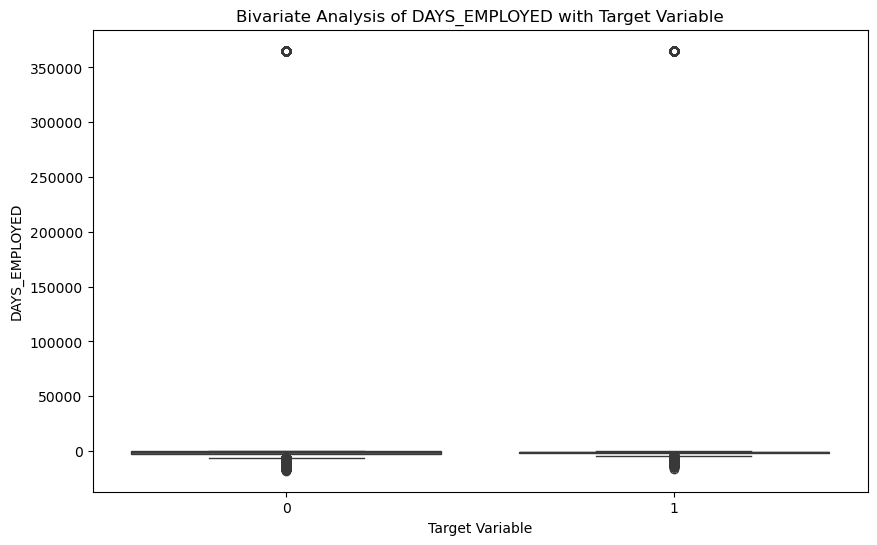

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


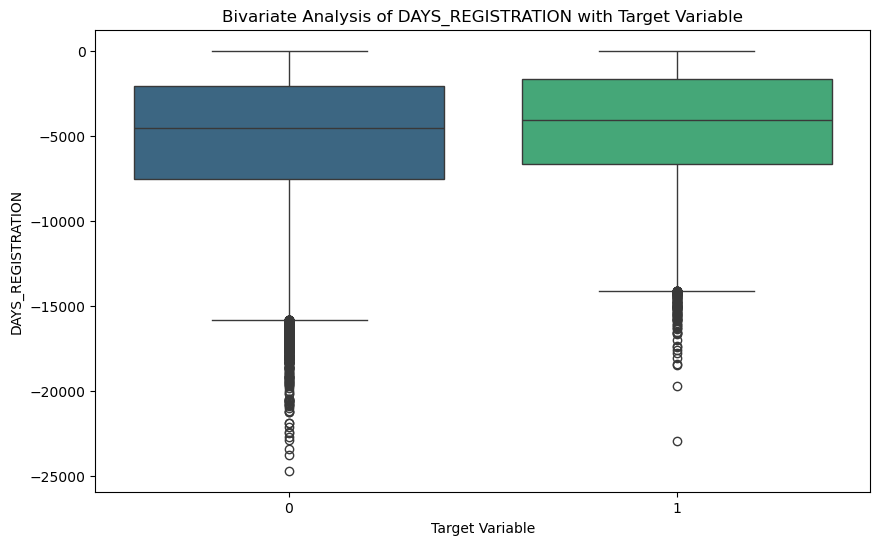

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


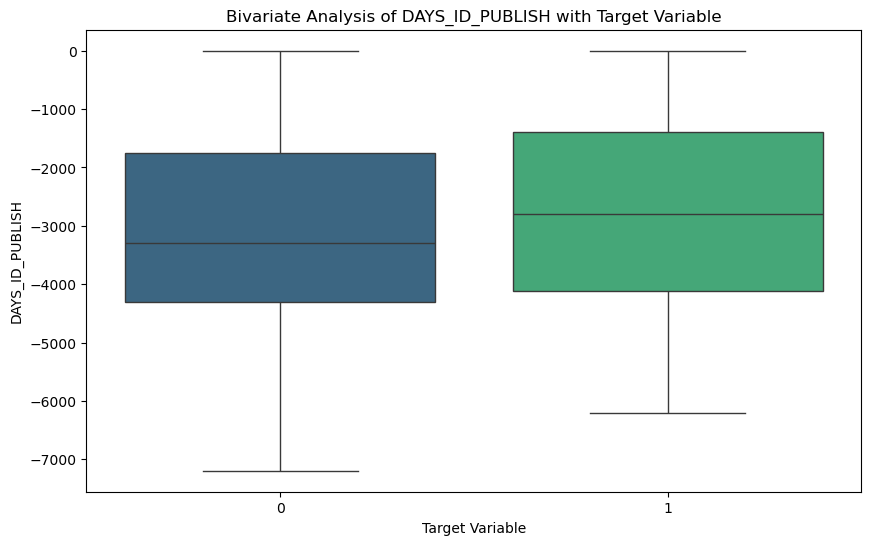

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


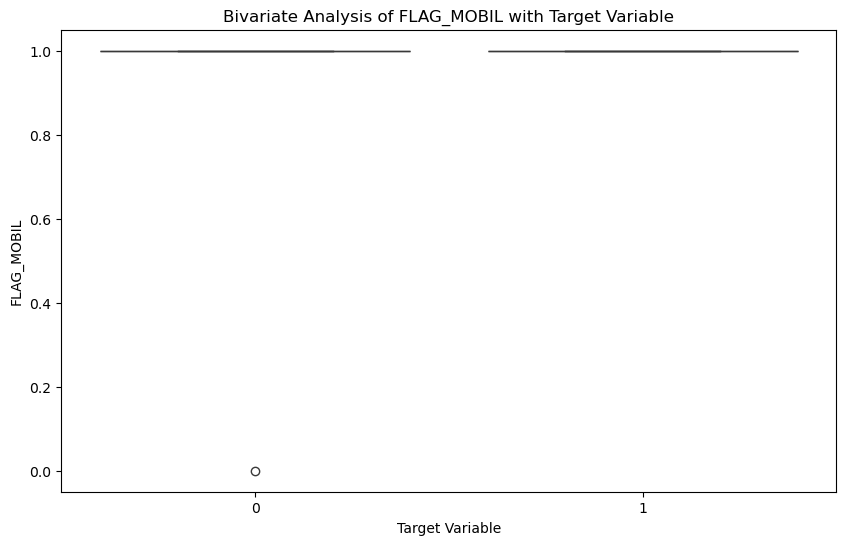

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


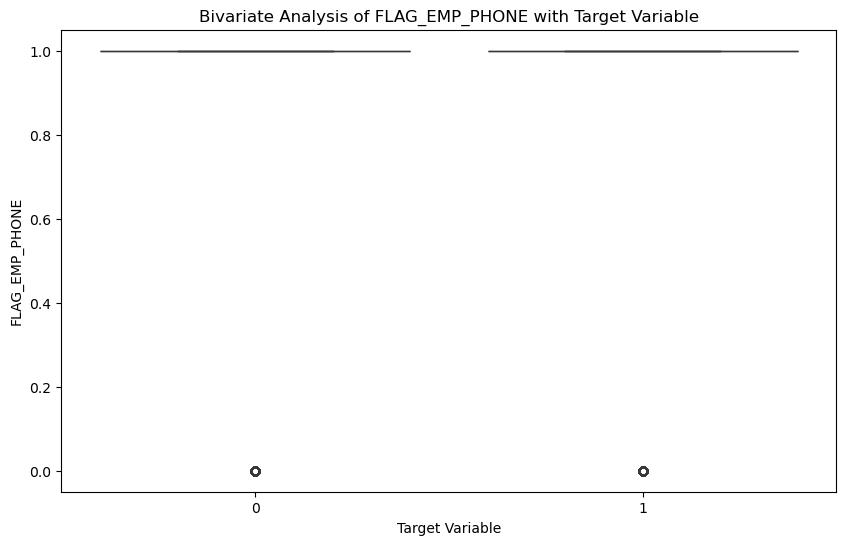

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


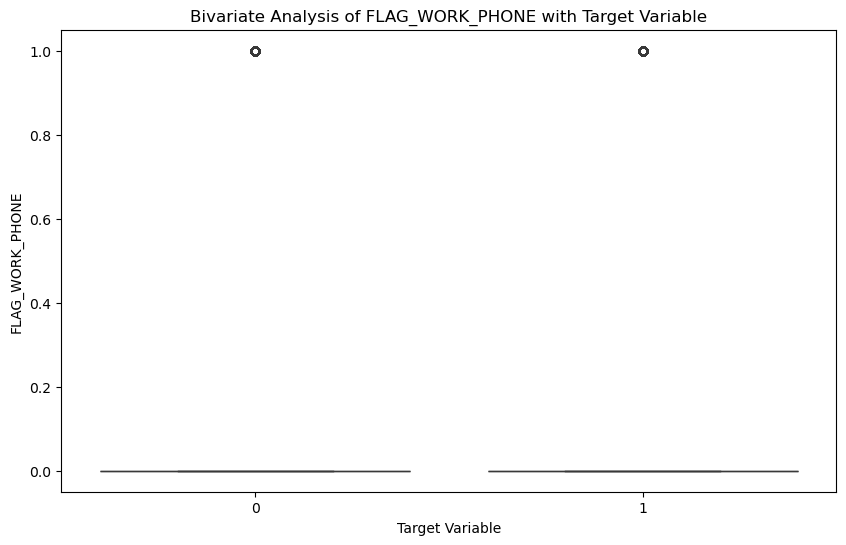

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


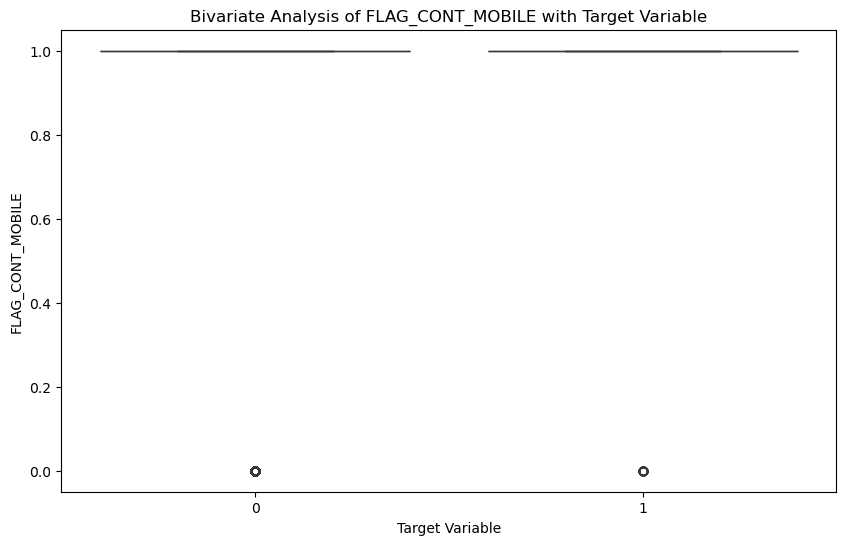

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


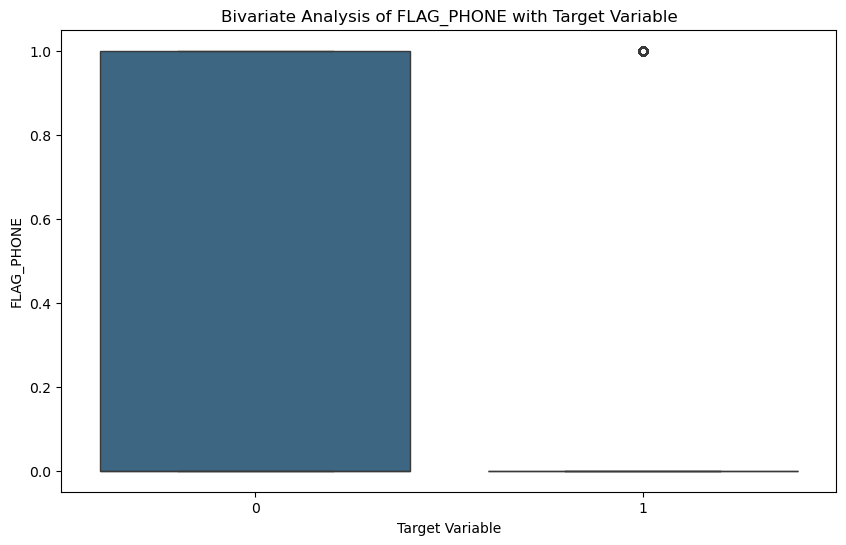

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


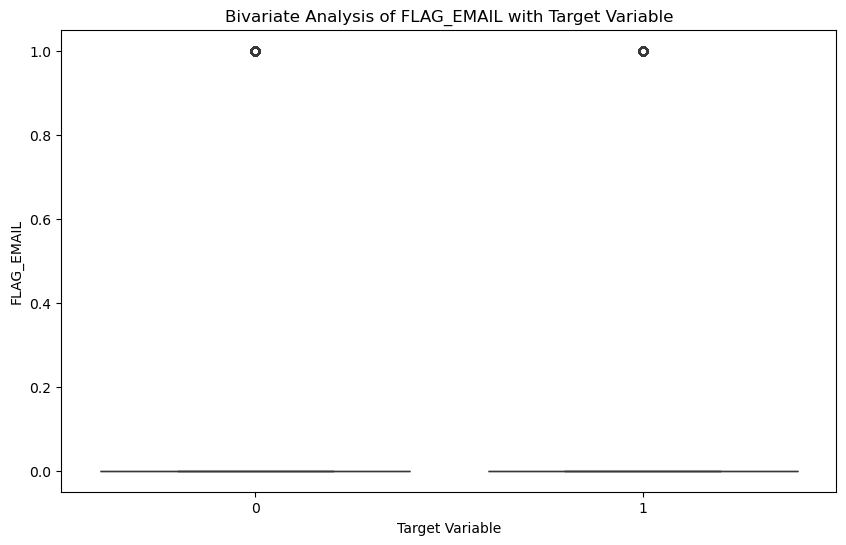

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


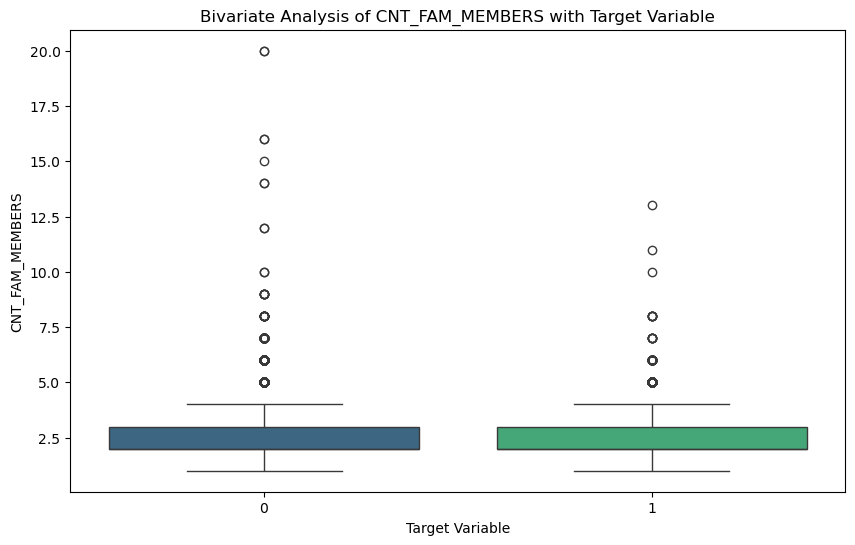

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


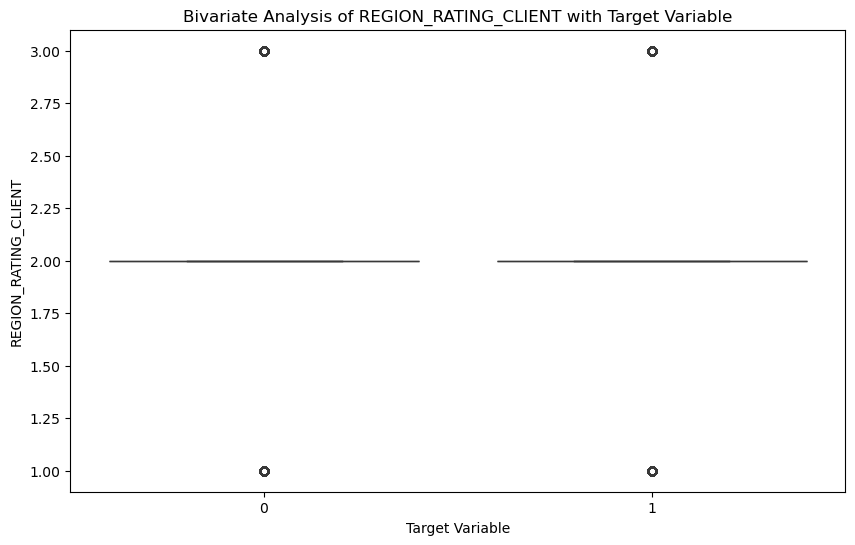

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


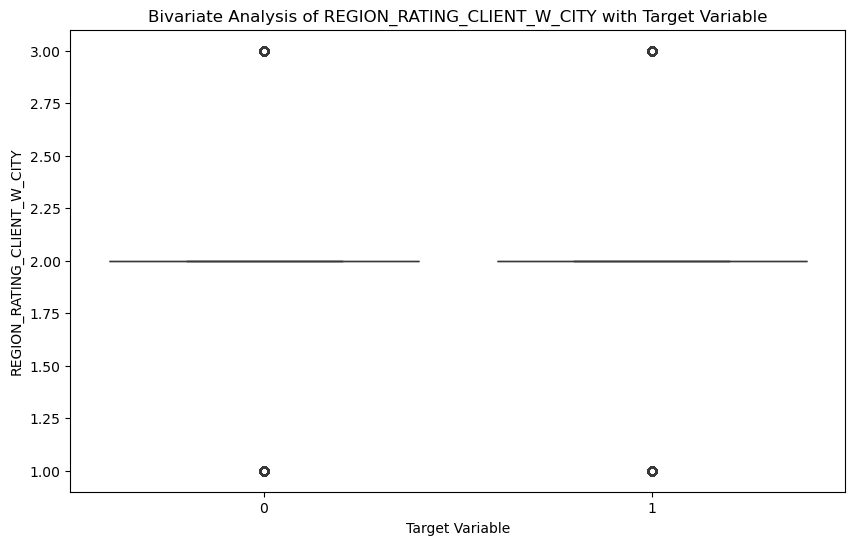

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


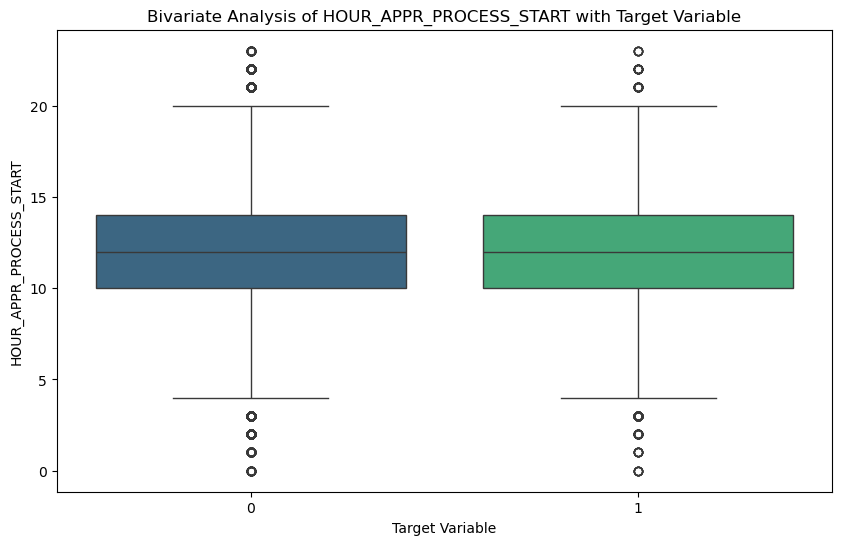

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


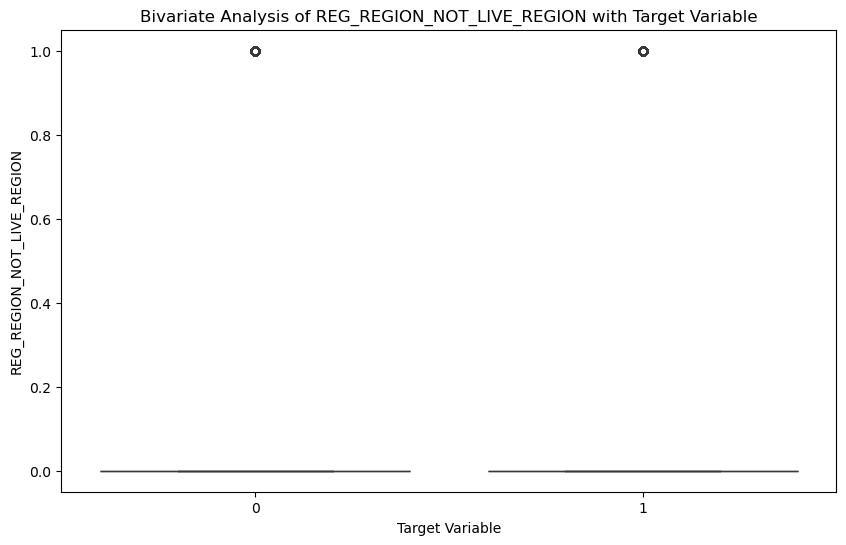

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


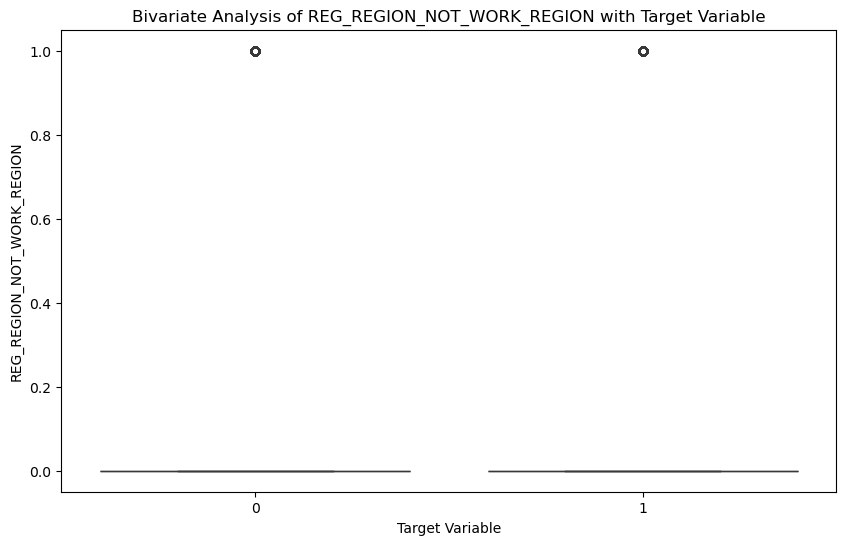

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


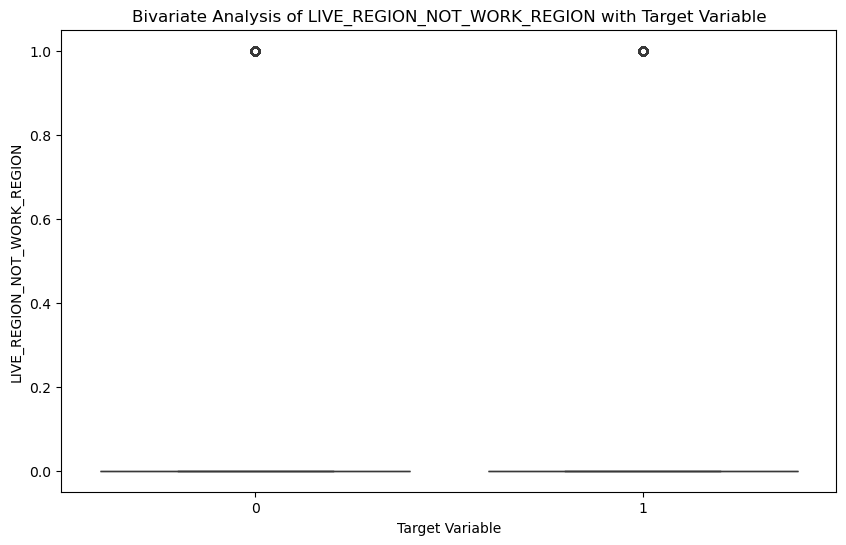

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


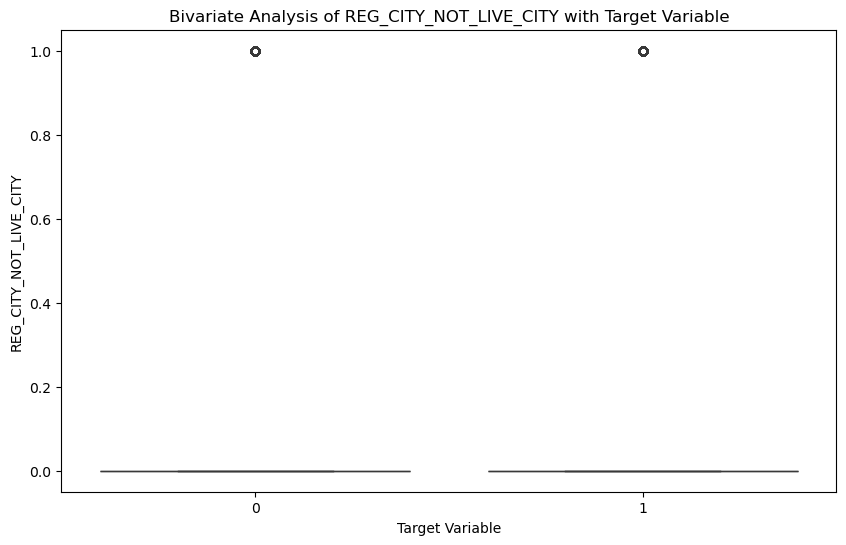

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


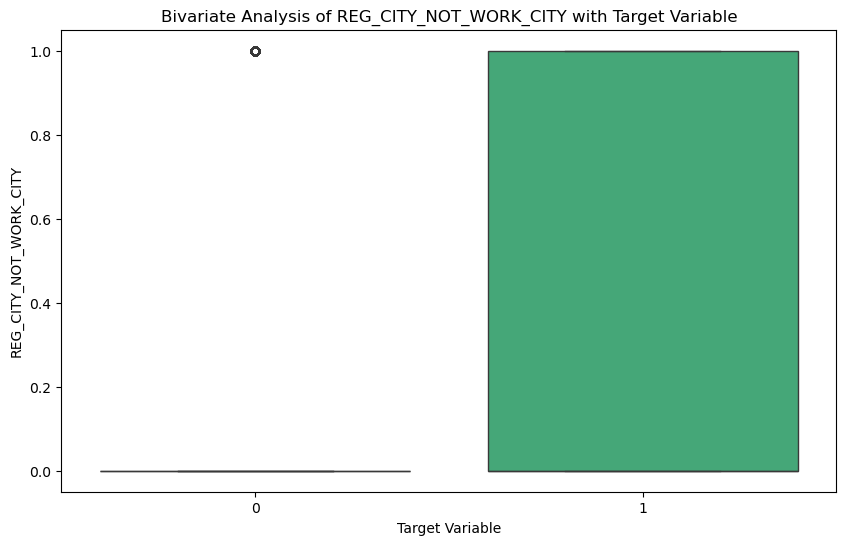

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


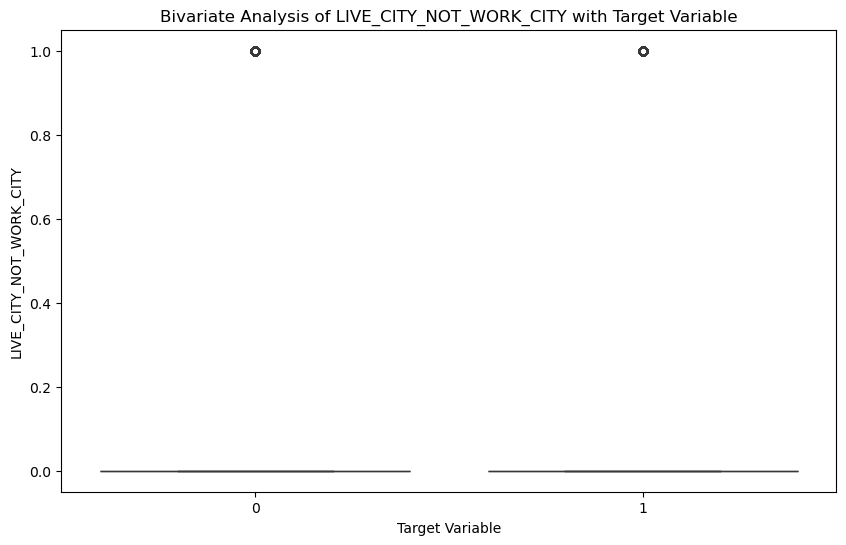

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


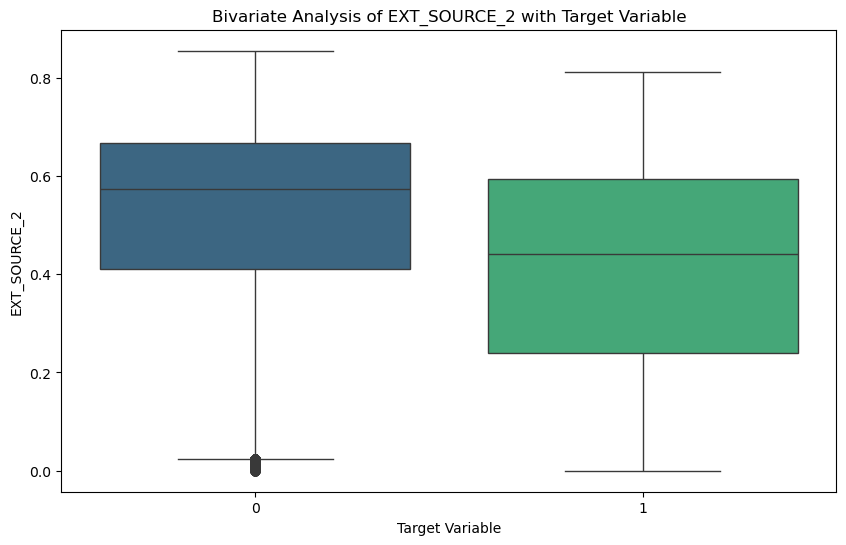

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


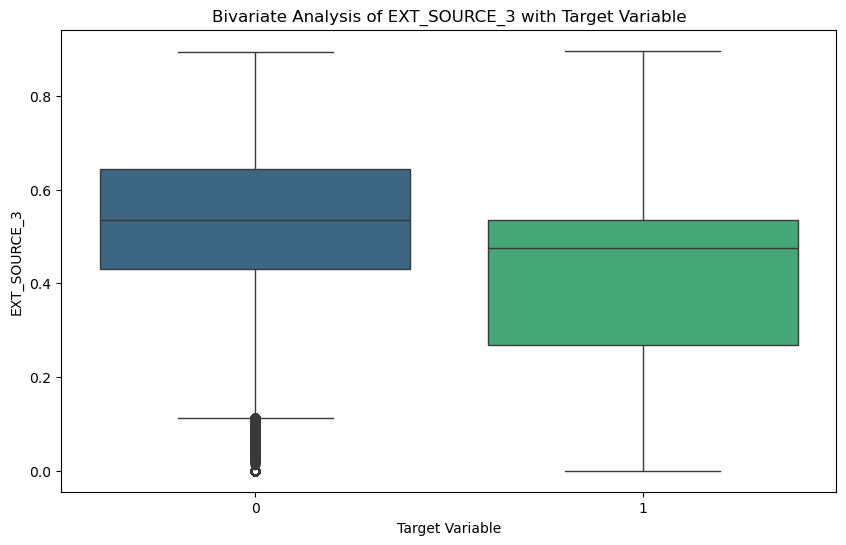

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


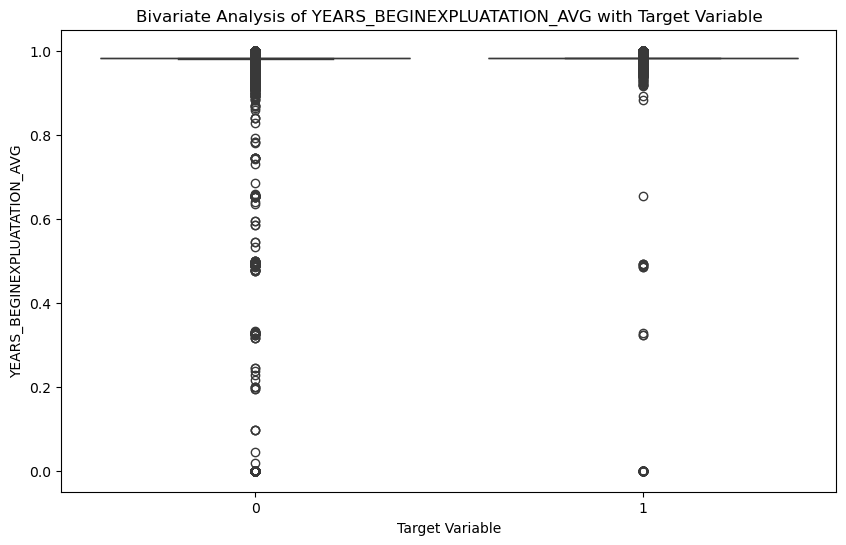

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


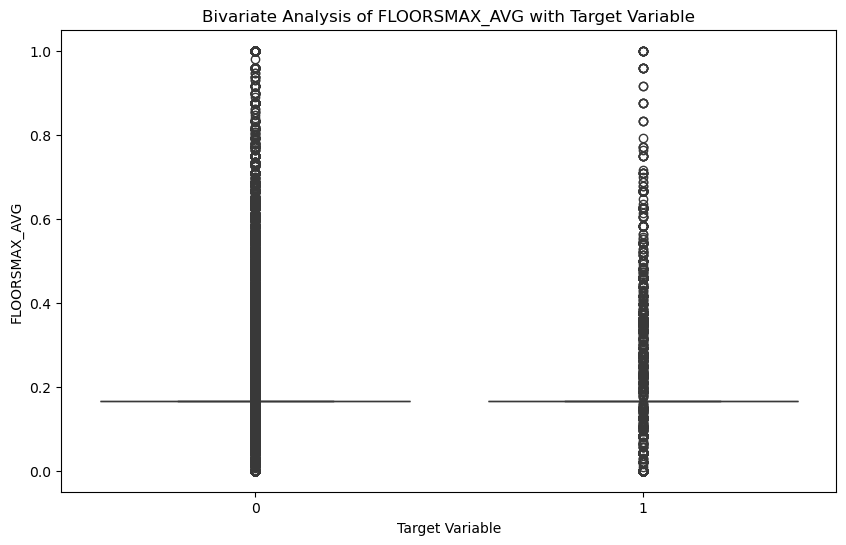

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


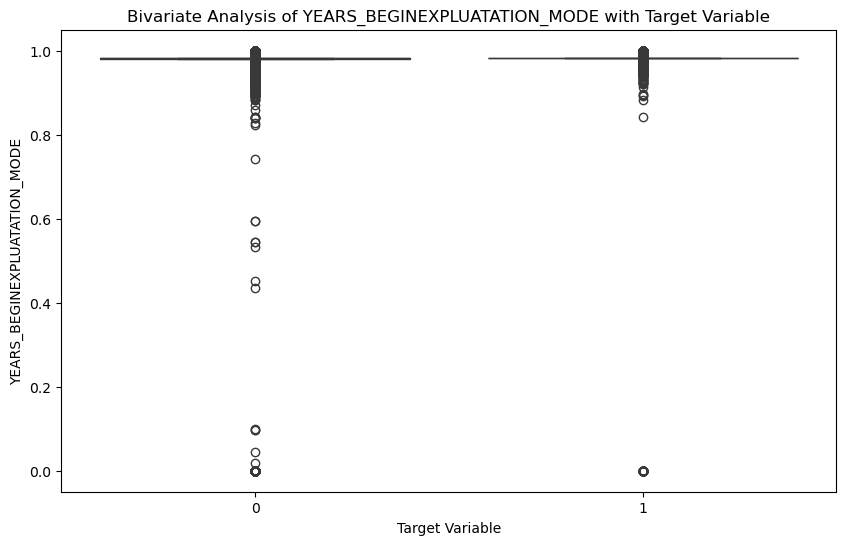

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


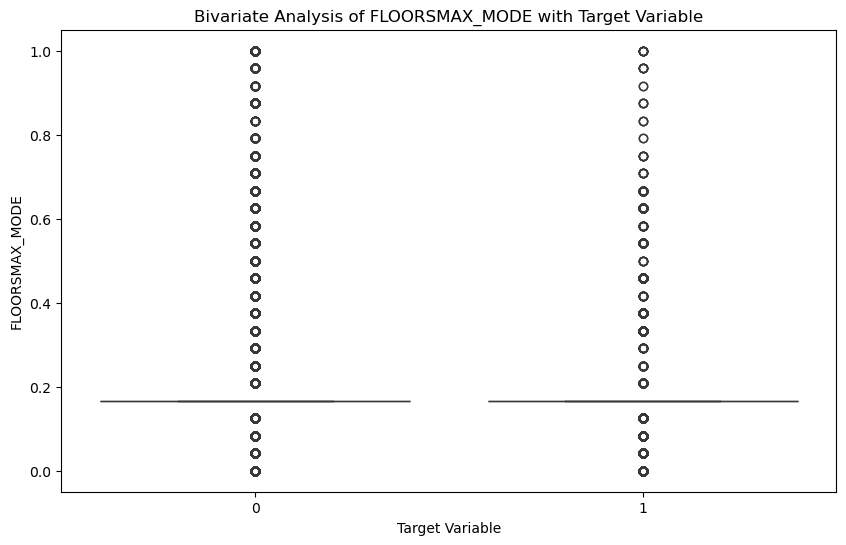

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


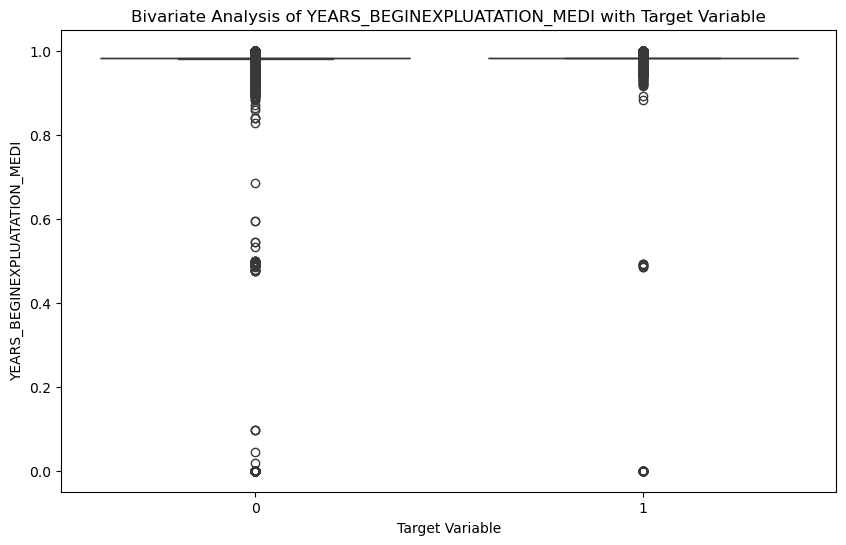

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


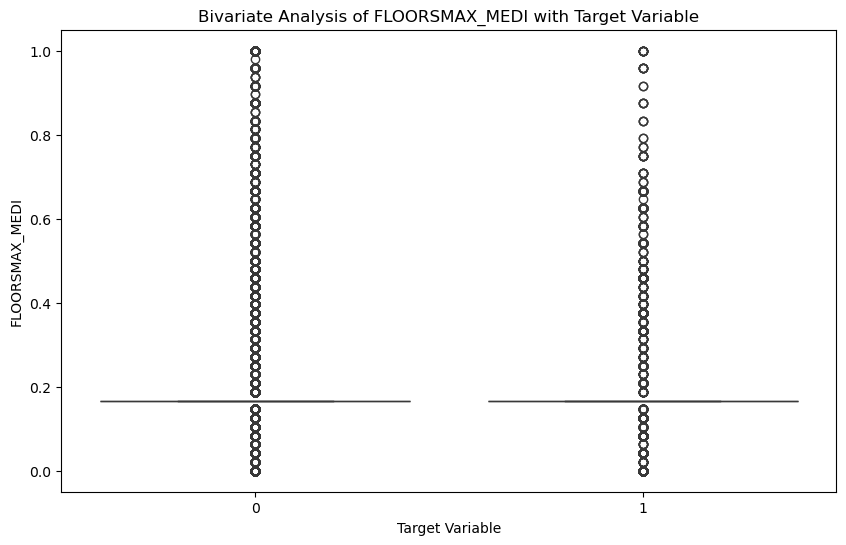

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


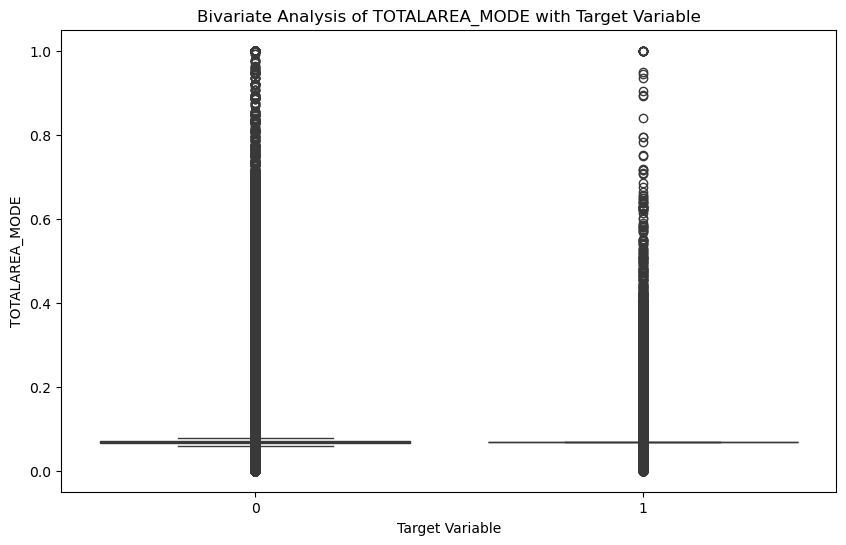

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


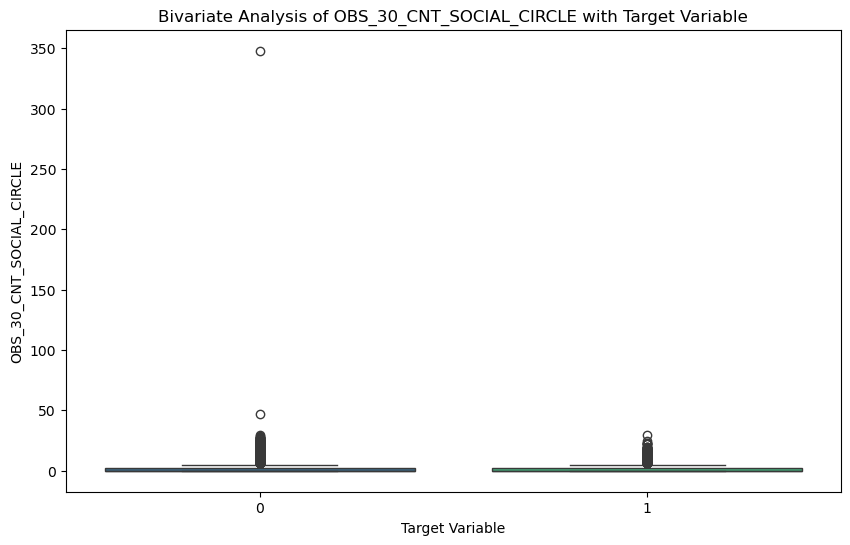

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


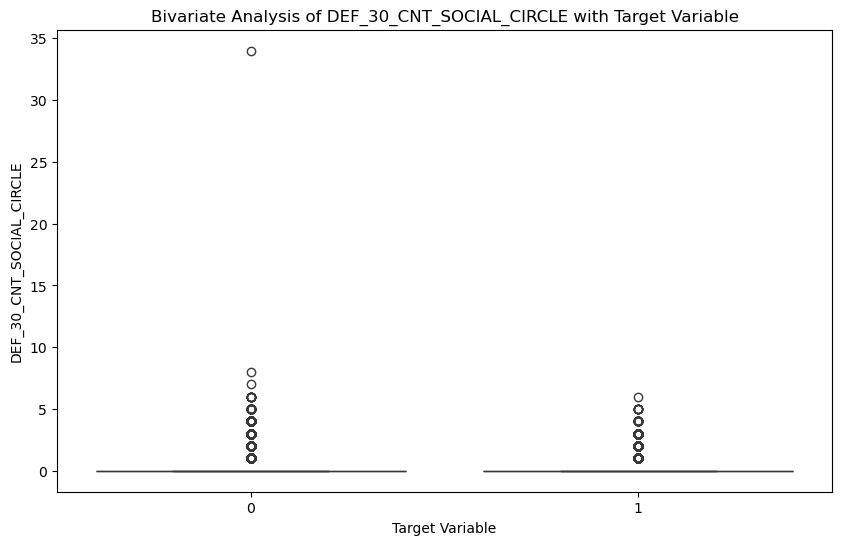

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


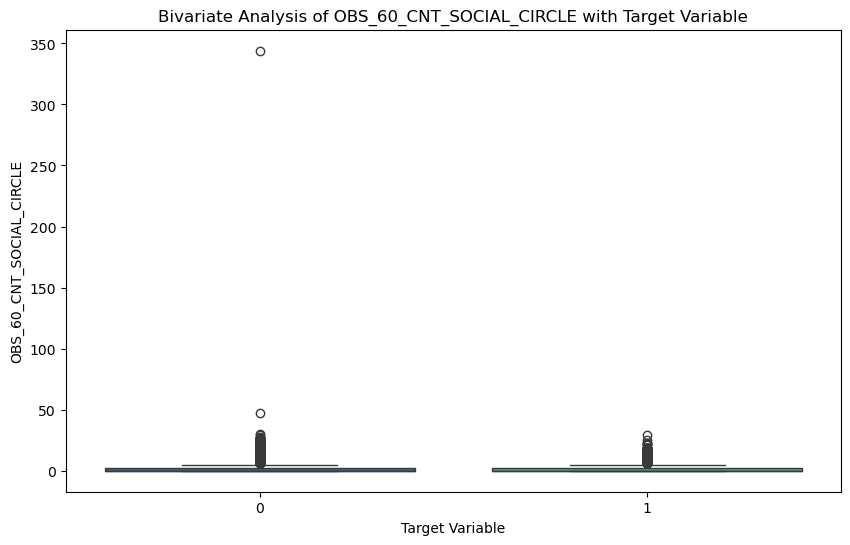

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


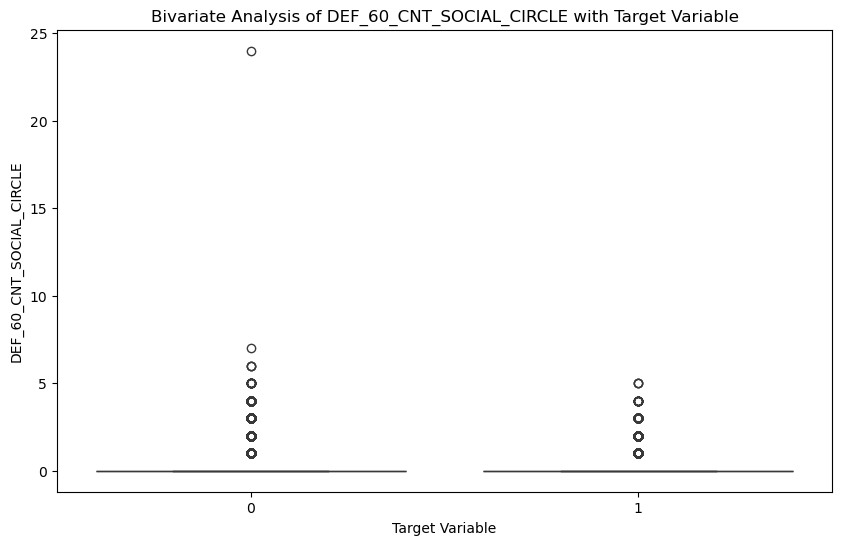

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


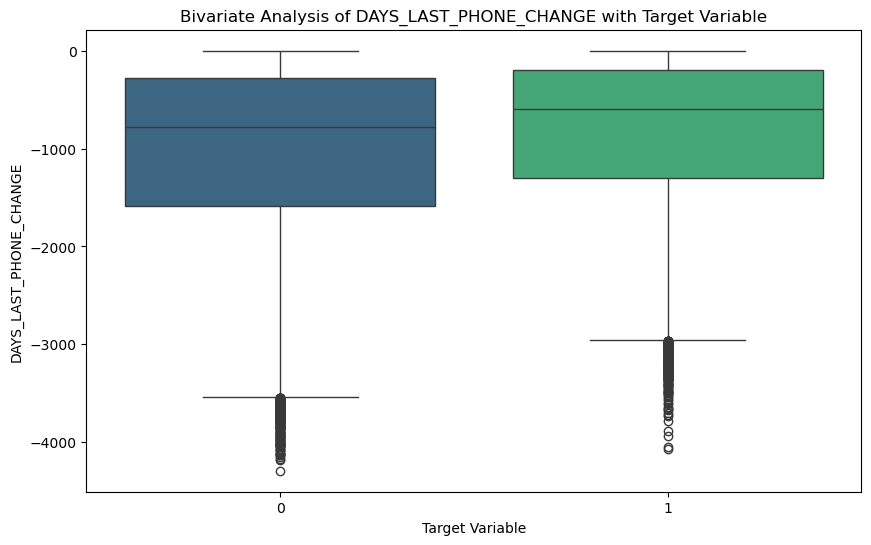

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


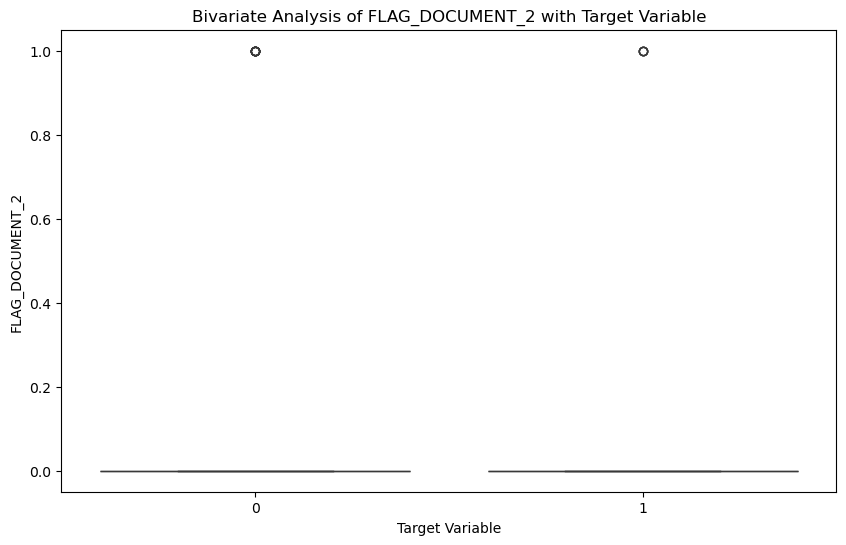

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


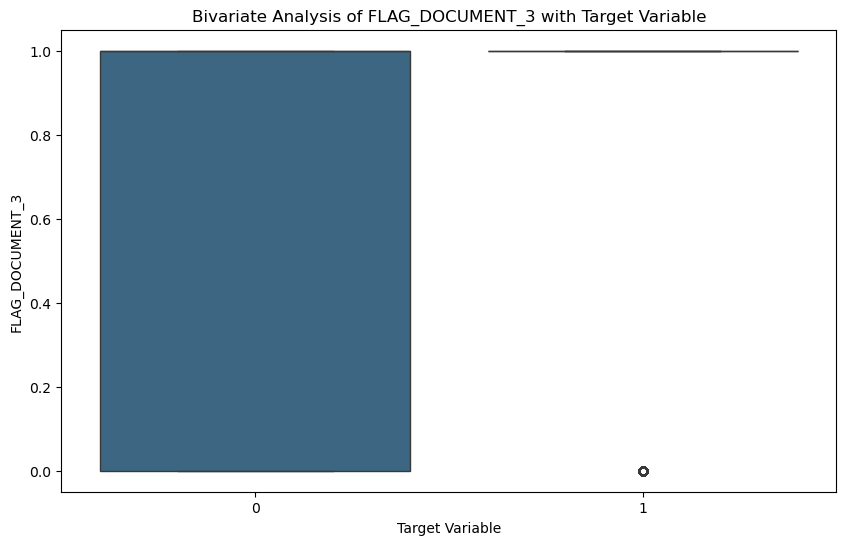

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


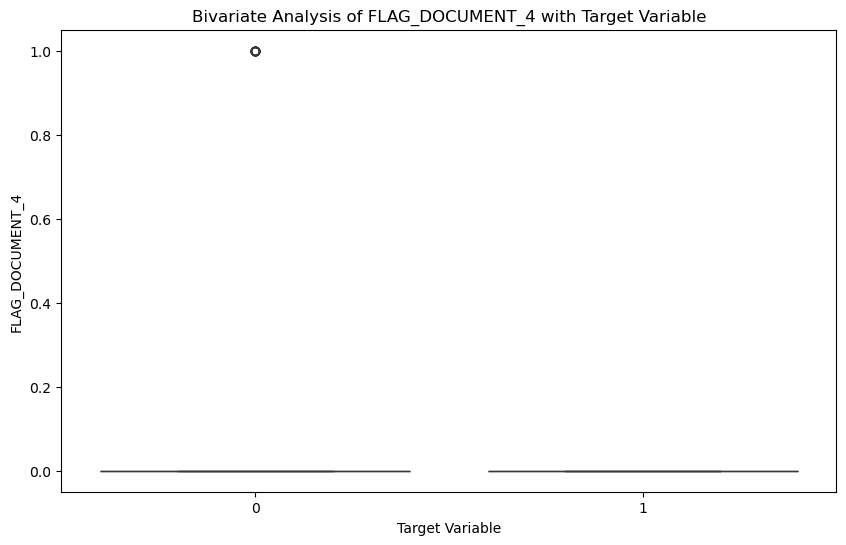

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


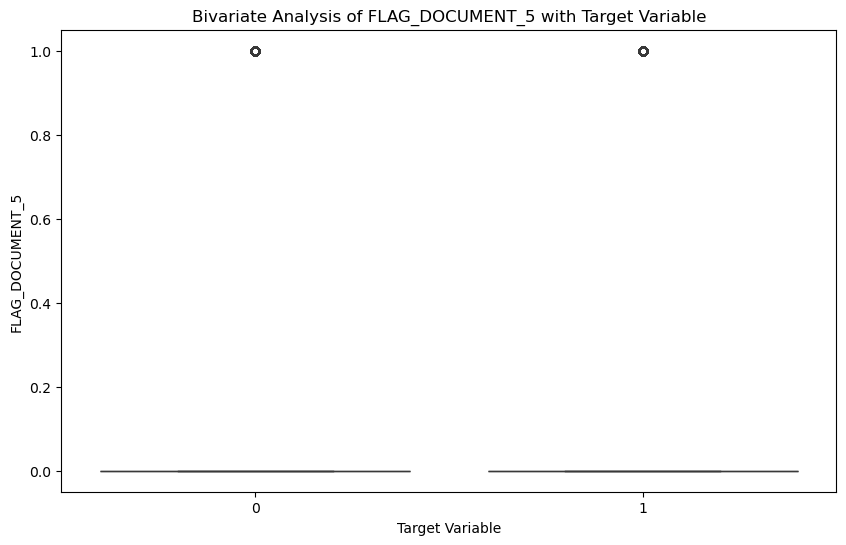

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


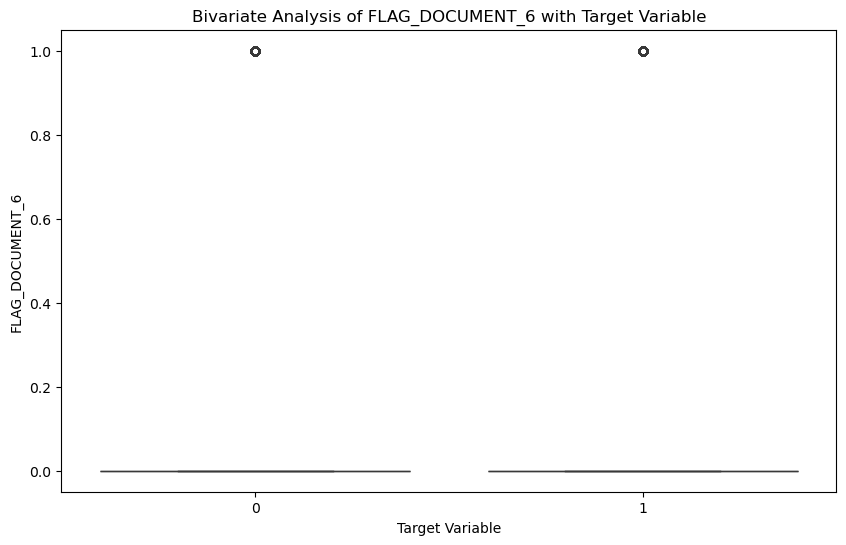

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


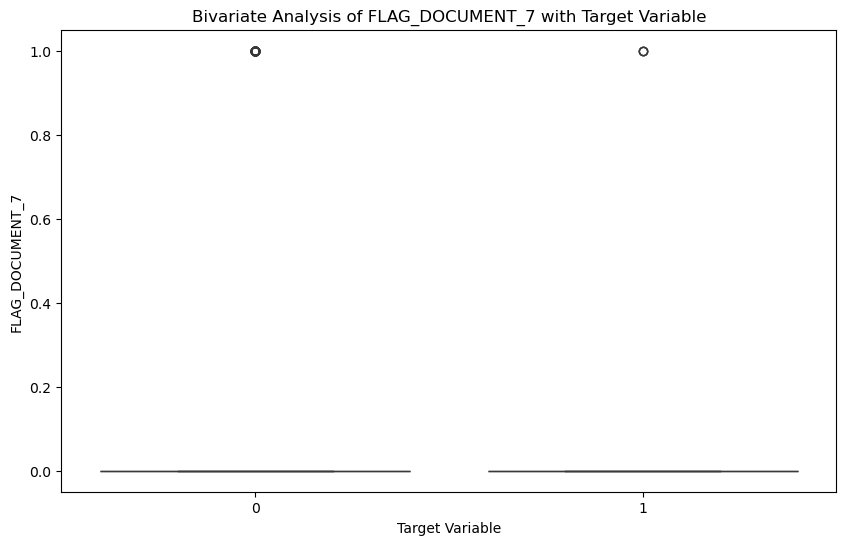

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


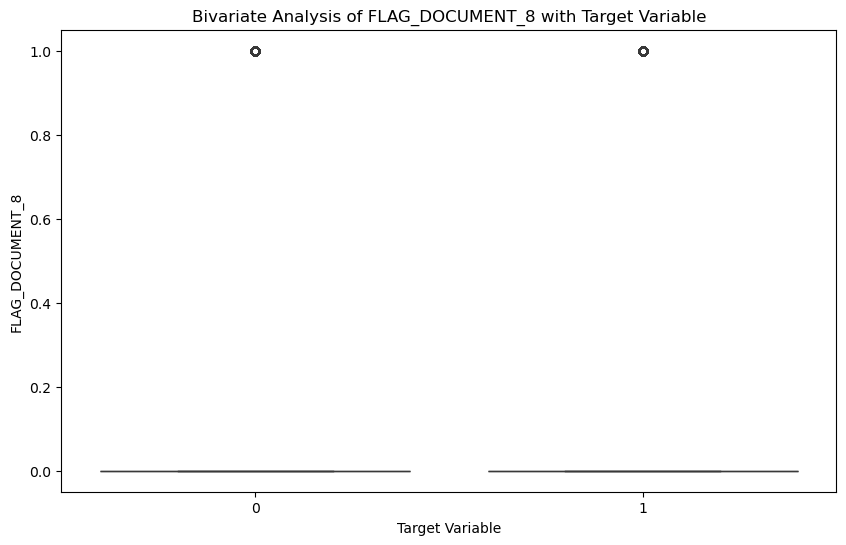

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


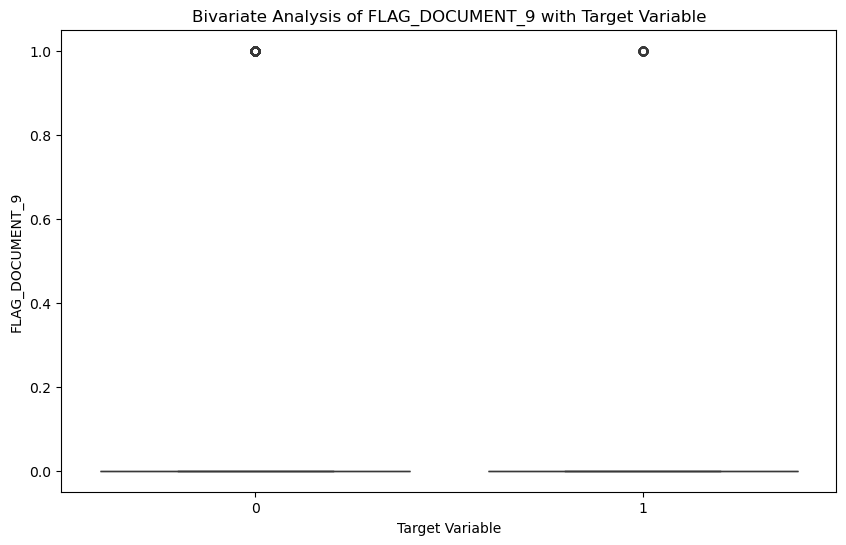

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


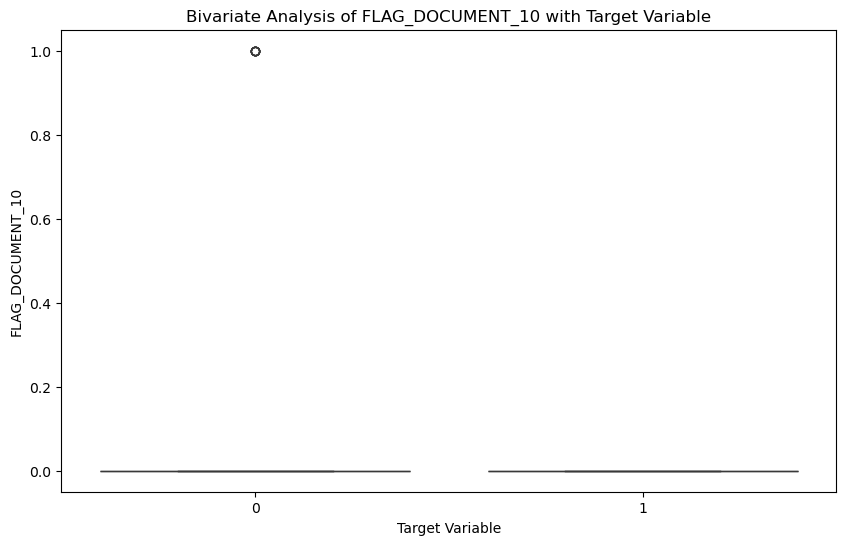

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


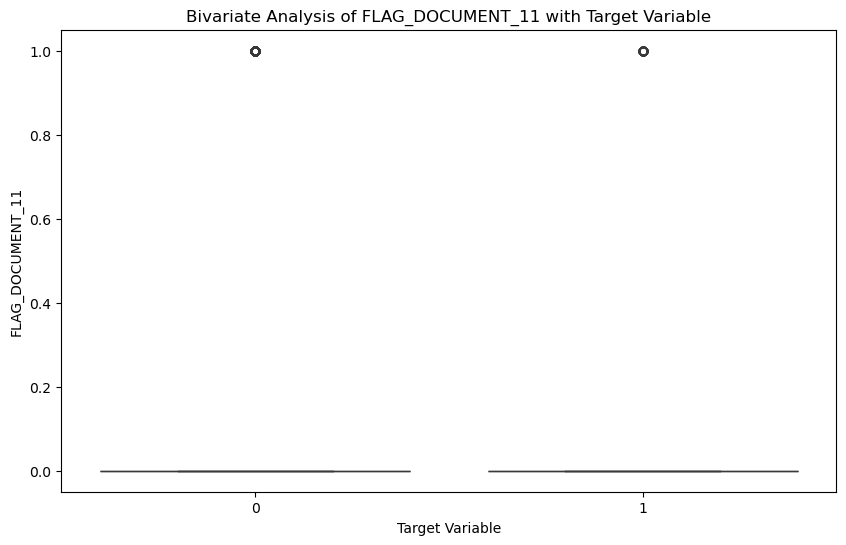

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


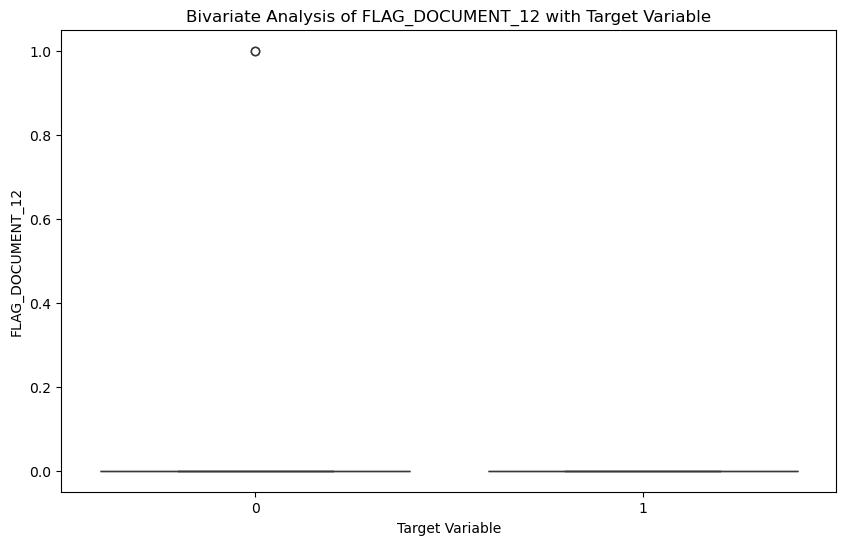

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


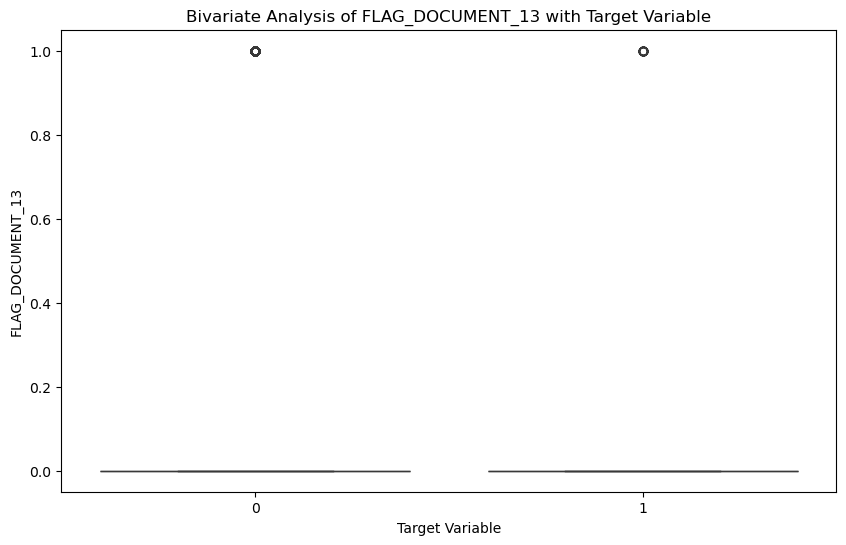

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


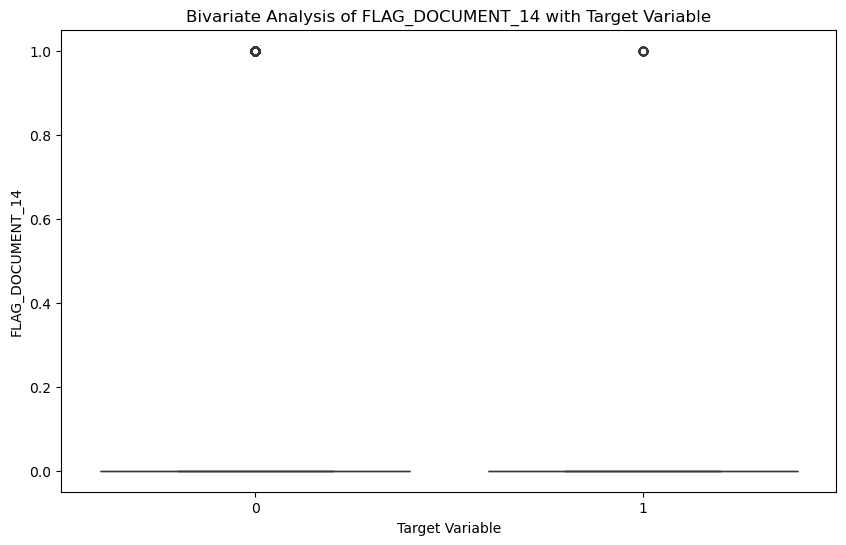

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


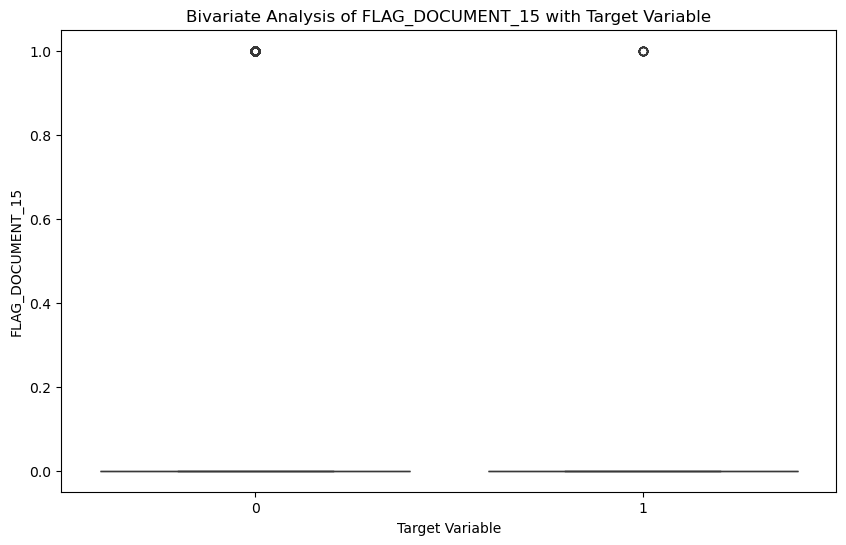

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


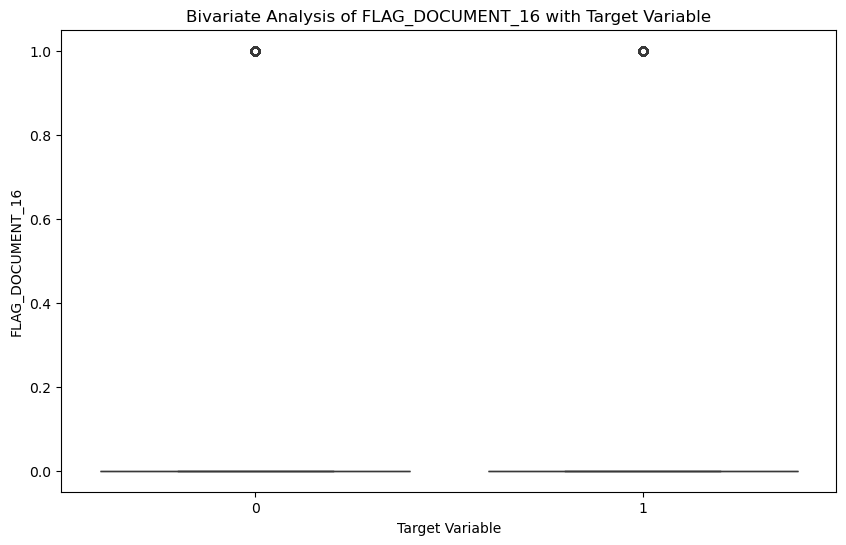

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


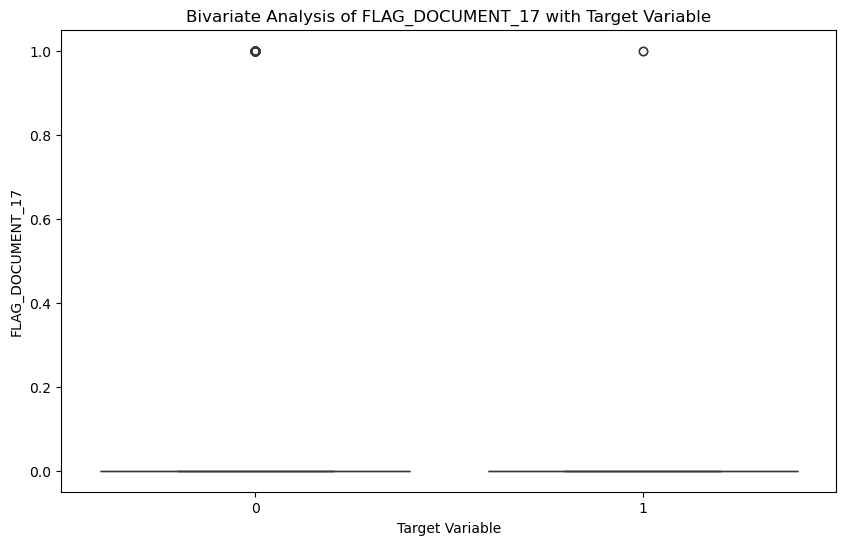

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


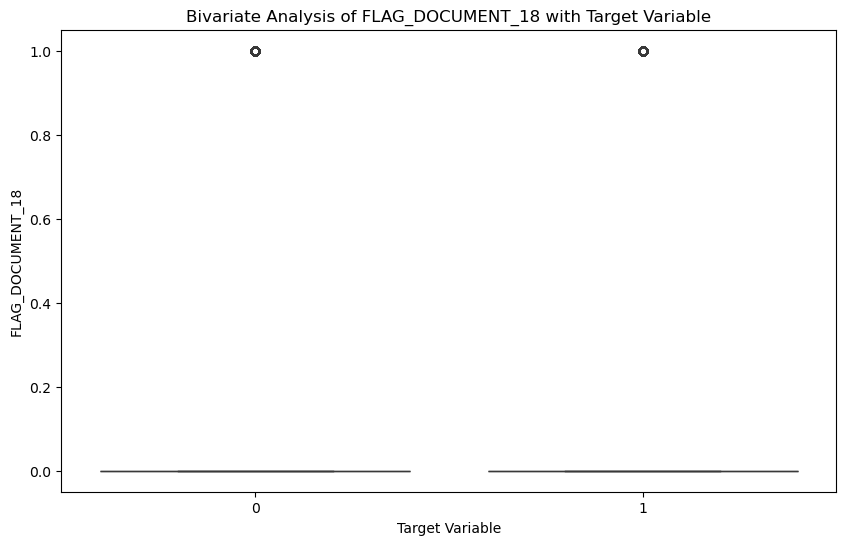

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


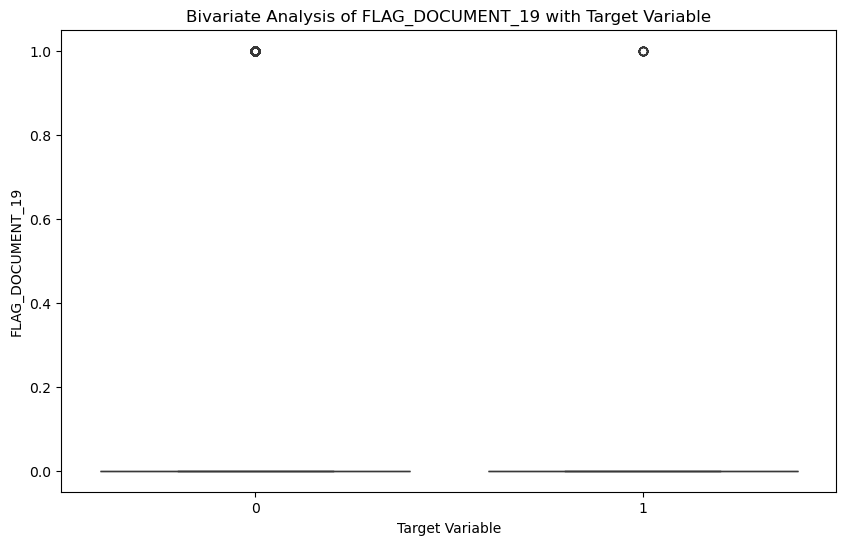

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


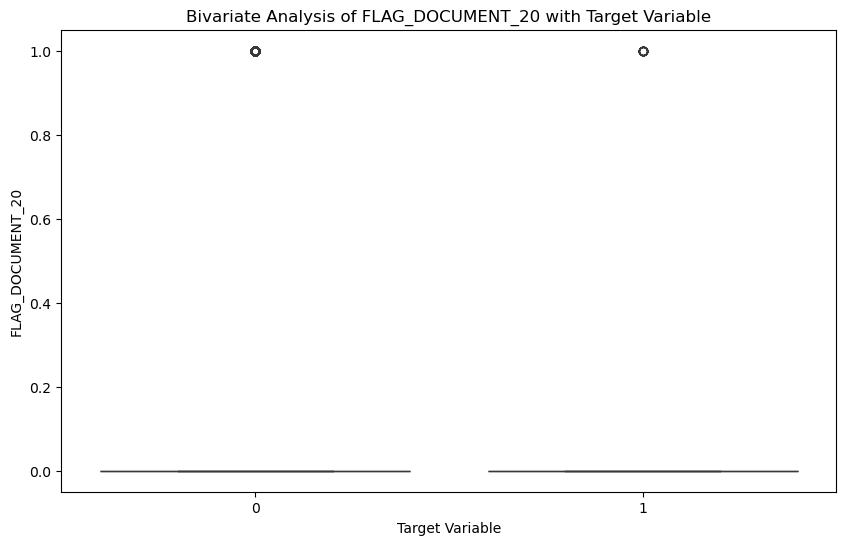

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


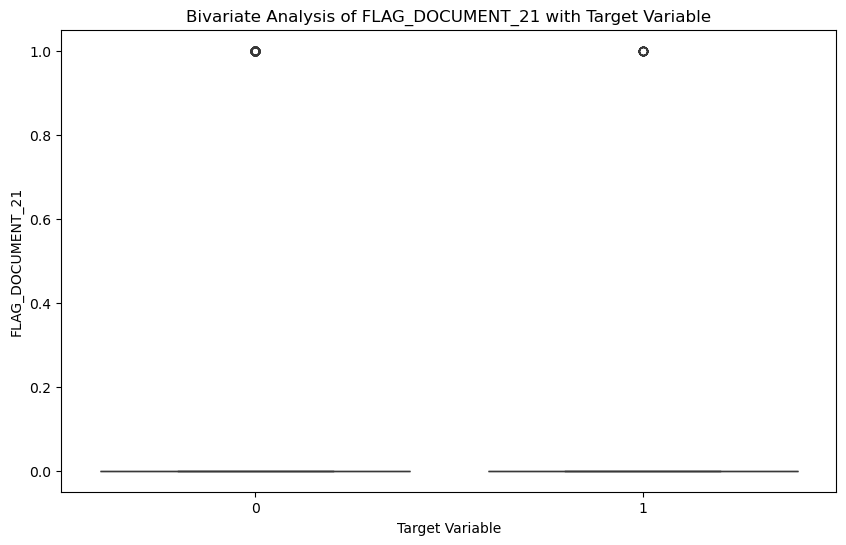

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


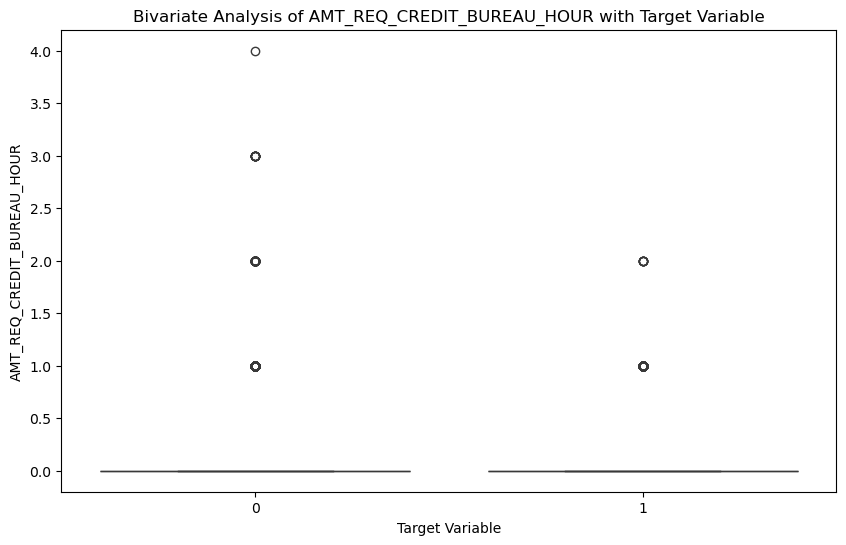

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


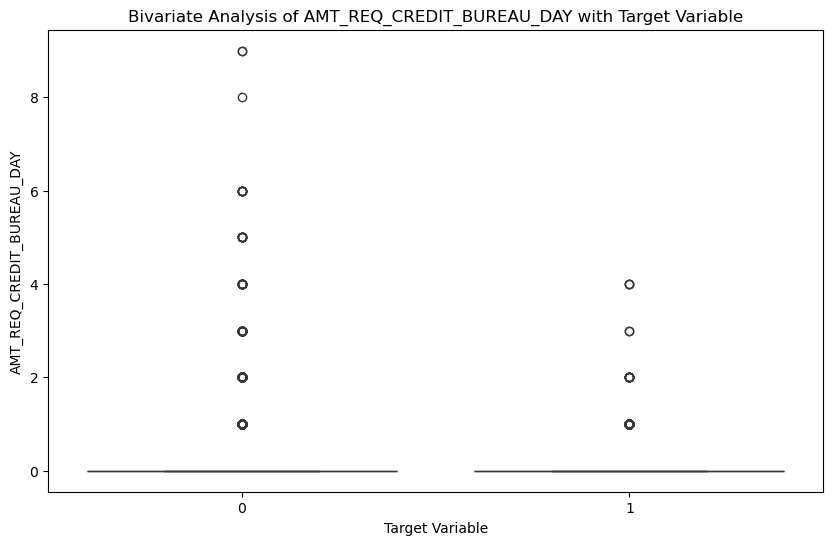

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


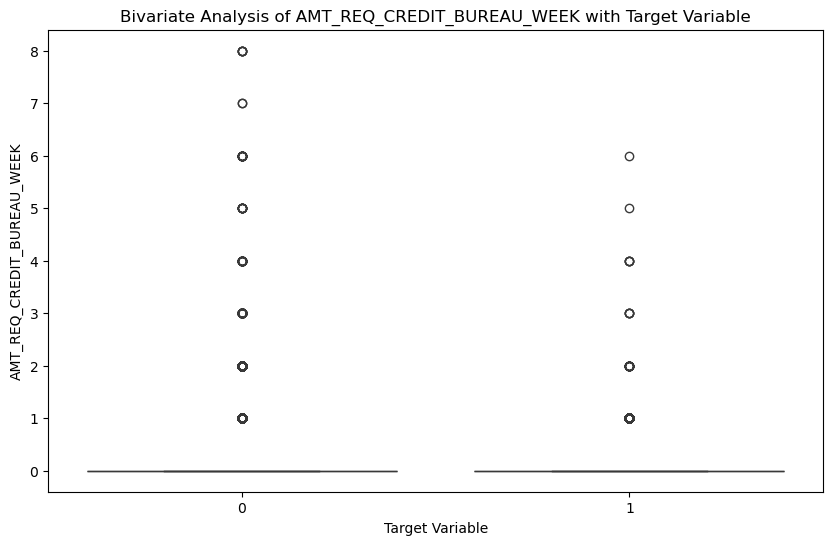

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


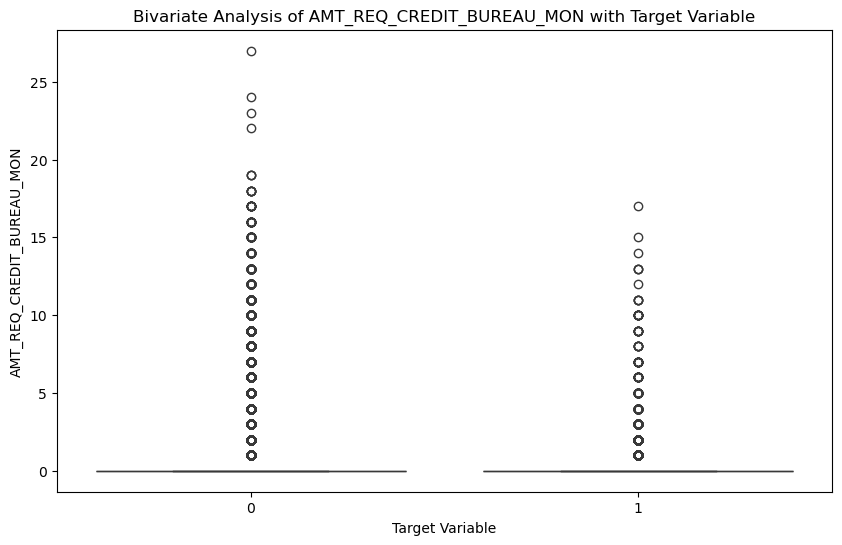

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


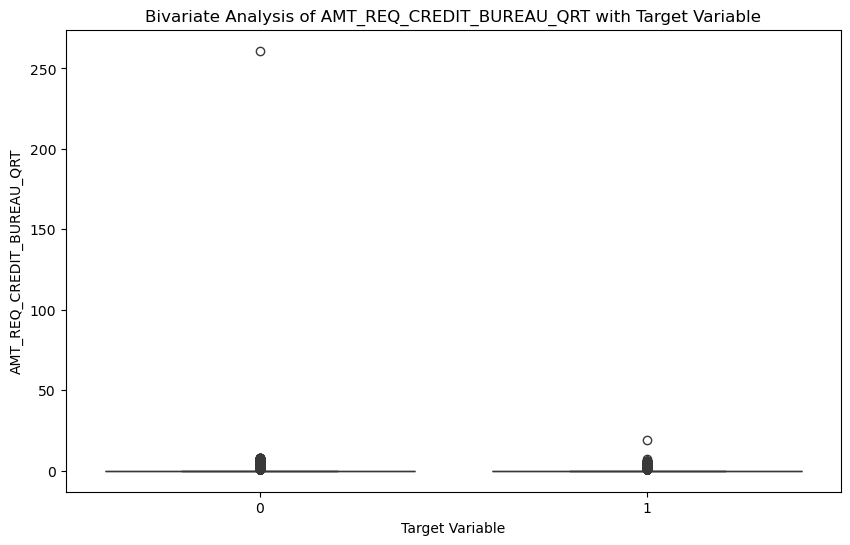

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1272262411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')


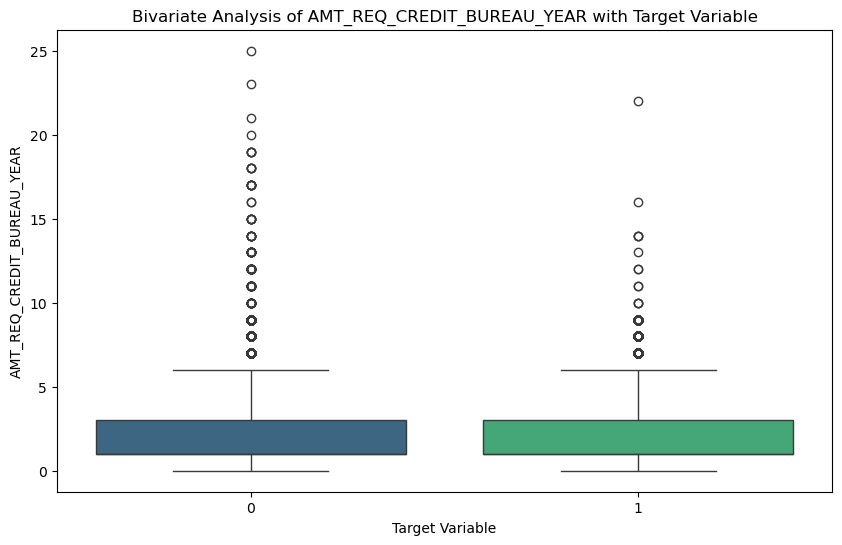

In [34]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='TARGET', y=column, data=df, palette='viridis')
    plt.title(f'Bivariate Analysis of {column} with Target Variable')
    plt.xlabel('Target Variable')
    plt.ylabel(column)
    plt.show()


In [46]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns


In [48]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [50]:
# Segment the encoded DataFrame
df_difficulties = df_encoded[df_encoded['TARGET'] == 1]
df_no_difficulties = df_encoded[df_encoded['TARGET'] == 0]

In [54]:
# Calculate the correlation matrix for both segments
corr_difficulties = df_difficulties.corr()
corr_no_difficulties = df_no_difficulties.corr()

# Extract the top 10 correlations for each segment
top_corr_difficulties = corr_difficulties.unstack().sort_values(ascending=False).drop_duplicates()
top_corr_no_difficulties = corr_no_difficulties.unstack().sort_values(ascending=False).drop_duplicates()

# Remove self-correlations (i.e., correlations of variables with themselves)
top_corr_difficulties = top_corr_difficulties[top_corr_difficulties != 1]
top_corr_no_difficulties = top_corr_no_difficulties[top_corr_no_difficulties != 1]

# Select the top 10 correlations
top_10_corr_difficulties = top_corr_difficulties.head(10)
top_10_corr_no_difficulties = top_corr_no_difficulties.head(10)

print("Top 10 Correlations for Clients with Payment Difficulties:")
print(top_10_corr_difficulties)
print("\nTop 10 Correlations for All Other Cases:")
print(top_10_corr_no_difficulties)


Top 10 Correlations for Clients with Payment Difficulties:
ORGANIZATION_TYPE_XNA         DAYS_EMPLOYED                   0.999895
                              NAME_INCOME_TYPE_Pensioner      0.998478
DAYS_EMPLOYED                 NAME_INCOME_TYPE_Pensioner      0.998373
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998270
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997295
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996139
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989472
                              FLOORSMAX_AVG                   0.986935
AMT_GOODS_PRICE               AMT_CREDIT                      0.982783
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.980546
dtype: float64

Top 10 Correlations for All Other Cases:
DAYS_EMPLOYED                 ORGANIZATION_TYPE_XNA           0.999888
NAME_INCOME_TYPE_Pensioner    ORGANIZATION_TYPE_XNA           0.999719
                              DA

In [56]:
# Heatmap for clients with payment difficulties
#plt.figure(figsize=(10, 8))
#sns.heatmap(df_difficulties[top_10_corr_difficulties.index.get_level_values(0)].corr(), annot=True, cmap='coolwarm')
#plt.title('Top 10 Correlations for Clients with Payment Difficulties')
#plt.show()

# Heatmap for all other cases
#plt.figure(figsize=(10, 8))
#sns.heatmap(df_no_difficulties[top_10_corr_no_difficulties.index.get_level_values(0)].corr(), annot=True, cmap='coolwarm')
#plt.title('Top 10 Correlations for All Other Cases')
#plt.show()

In [13]:
# Assuming 'target' is the name of the target variable column
target_counts = df['TARGET'].value_counts()
target_percentage = df['TARGET'].value_counts(normalize=True) * 100

In [15]:
print("Target Variable Counts:")
print(target_counts)
print("\nTarget Variable Percentage:")
print(target_percentage)

Target Variable Counts:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Target Variable Percentage:
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [17]:
# Plotting the distribution of the target variable
#plt.figure(figsize=(10, 6))
#sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
#plt.title('Distribution of Target Variable')
#plt.xlabel('Target Variable')
#plt.ylabel('Count')
#plt.show()

#plt.figure(figsize=(10, 6))
#sns.barplot(x=target_percentage.index, y=target_percentage.values, palette='viridis')
#plt.title('Distribution of Target Variable (Percentage)')
#plt.xlabel('Target Variable')
#plt.ylabel('Percentage')
#plt.show()